<h1 align="center">Comparison of Classification Algorithms</h1>

<h3 align="center">By</h3>
<h3 align="center">Rohan Bimal Jhaveri (CSUID: 830962238)</h3>
<h3 align="center">Ameya Sanjay Kirve (CSUID: 831692065)</h3>
<h3 align="center">Colorado State University</h3>

<a id='Top'></a>
## Table of Contents
   
* <a href='#Section1'>1.  Packages and Functions required</a>
* <a href='#Section2'>2. Burst Header Packet (BHP) flooding attack on Optical Burst Switching (OBS) Network </a>

    * <a href='#Section21'>2.1 Data</a>
    * <a href='#Section22'>2.2 Quadratic Discriminant Analysis</a>
    * <a href='#Section23'>2.3 Linear Discriminant Analysis</a>
    * <a href='#Section24'>2.4 Non-Linear Logistic Regression</a>
    * <a href='#Section25'>2.5 Linear Logistic Regression</a>
    * <a href='#Section26'>2.6 K-Nearest Neighbors Classification</a>
    * <a href='#Section27'>2.7. Results Summary</a>
    
* <a href='#Section3'>3. Letter Recognition </a>

    * <a href='#Section31'>3.1 Data</a>
    * <a href='#Section32'>3.2 Quadratic Discriminant Analysis</a>
    * <a href='#Section33'>3.3 Linear Discriminant Analysis</a>
    * <a href='#Section34'>3.4 Non-Linear Logistic Regression</a>
    * <a href='#Section35'>3.5 Linear Logistic Regression</a>
    * <a href='#Section36'>3.6 K-Nearest Neighbors Classification</a>
    * <a href='#Section37'>3.7. Results Summary</a>
    
* <a href='#Section4'>4. Amazon Commerce reviews </a>

    * <a href='#Section41'>4.1 Data</a>
    * <a href='#Section42'>4.2 Quadratic Discriminant Analysis</a>
    * <a href='#Section43'>4.3 Linear Discriminant Analysis</a>
    * <a href='#Section44'>4.4 Non-Linear Logistic Regression</a>
    * <a href='#Section45'>4.5 Linear Logistic Regression</a>
    * <a href='#Section46'>4.6 K-Nearest Neighbors Classification</a>
    * <a href='#Section47'>4.7. Results Summary</a>


<a id=Section1></a>
## 1. Packages and Functions required 

### Import Packages

In [168]:
import numpy as np
import pandas as pd
from numpy import *

import warnings
warnings.simplefilter('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing

from math import sqrt, ceil

import matplotlib.pyplot as plt
%matplotlib inline   

from copy import copy
import time
import sys
from scipy.io import arff
floatPrecision = sys.float_info.epsilon

### Functions

In [169]:
#Data Loading-- Burst Header Packet (BHP) flooding attack on Optical Burst Switching (OBS) Network Data Set
def LoadOBSData(fileName):   

    data = arff.loadarff('OBS-Network-DataSet_2_Aug27.arff')
    df = pd.DataFrame(data[0])
    classes = np.unique(df["Class"])
    status = np.unique(df["Node Status"])
    print ('{:s} {:}'.format('Unique Classes in the given data set:',classes))
    df["Class"].replace({classes[0] : 1, classes[1]: 2, classes[2]: 3, classes[3] : 4}, inplace=True)
    df["Node Status"].replace({status[0] : 1, status[1]: 2, status[2]: 3}, inplace=True)

    return df

In [170]:
#Data Loading-- Letter Recognition Data Set 
def LoadLetterData(fileName): 
    
    dataFrame = pd.read_csv(fileName, delimiter=',', header = None, names = ["Letter","xBox", "yBox", "Width", "Height", "OnPix", "xBar", 
                                                                             "yBar", "x2Bar", "y2Bar", "xyBar", "x2yBar", "xy2Bar", "xEdge",
                                                                             "xEdgeCORy", "yEdge", "yEdgeCORx"])            # Data Frame containing original values


    df = pd.read_csv(fileName, delimiter=',', header = None, names = ["Letter","xBox", "yBox", "Width", "Height", "OnPix", "xBar", 
                                                                             "yBar", "x2Bar", "y2Bar", "xyBar", "x2yBar", "xy2Bar", "xEdge",
                                                                             "xEdgeCORy", "yEdge", "yEdgeCORx"])    # Data Frame containing modified targets
    
    classes = np.unique(dataFrame["Letter"])         
    print ('{:s} {:}'.format('Unique Classes in the given data set:',classes))
    
    df["Letter"].replace({classes[0] : 1, classes[1]: 2, classes[2]: 3,
                                  classes[3] : 4, classes[4]: 5, classes[5]: 6,
                                  classes[6] : 7, classes[7]: 8, classes[8]: 9,
                                  classes[9] : 10, classes[10]: 11, classes[11]: 12,
                                  classes[12] :13, classes[13]: 14, classes[14]: 15,
                                  classes[15] :16, classes[16]: 17, classes[17]: 18,
                                  classes[18] :19, classes[19]: 20, classes[20]: 21,
                                  classes[21] :22, classes[22]: 23, classes[23]: 24,
                                  classes[24] :25, classes[25]: 26},inplace=True)
   
    return df  

In [171]:
#Data Loading-- Amazon Commerce reviews set Data Set
def LoadAmazonData(fileName): 
    data = np.genfromtxt("Amazon_initial_50_30_10000.arff", dtype=str, delimiter= "\n") 
    data[10001,] = '@attribute classification {Agresti,Ashbacher,Auken,Blankenship,Brody,Brown,Bukowsky,CFH,Calvinnme,Chachra,Chandler,Chell,Cholette,Comdet,Corn,Cutey,Davisson,Dent,Engineer,Goonan,Grove,Harp,Hayes,Janson,Johnson,Koenig,Kolln,Lawyeraau,Lee,Lovitt,Mahlers2nd,Mark,McKee,Merritt,Messick,Mitchell,Morrison,Neal,Nigam,Peterson,Power,Riley,Robert,Shea,Sherwin,Taylor,Vernon,Vision,Walters,Wilson}'
    np.savetxt("Amazon_initial_50_30_10000_2.arff", data, fmt = '%s') 

    data = arff.loadarff('Amazon_initial_50_30_10000_2.arff')
    df = pd.DataFrame(data[0])
    df['classification'] = df['classification'].str.decode('utf-8') 
    classes = np.unique(df["classification"])
    print ('{:s} {:}'.format('Unique Classes in the given data set:',classes))

    df["classification"].replace({classes[0] : 1, classes[1] : 2, classes[2] : 3, classes[3] : 4, 
                                classes[4] : 5, classes[5] : 6, classes[6] : 7, classes[7] : 8, 
                                classes[8] : 9, classes[9] : 10, classes[10] : 11, classes[11] : 12, 
                                classes[12] : 13, classes[13] : 14, classes[14] : 15, classes[15] : 16, 
                                classes[16] : 17, classes[17] : 18, classes[18] : 19, classes[19] : 20, 
                                classes[20] : 21, classes[21] : 22, classes[22] : 23, classes[23] : 24, 
                                classes[24] : 25, classes[25] : 26, classes[26] : 27, classes[27] : 28, 
                                classes[28] : 29, classes[29] : 30, classes[30] : 31, classes[31] : 32, 
                                classes[32] : 33, classes[33] : 34, classes[34] : 35, classes[35] : 36, 
                                classes[36] : 37, classes[37] : 38, classes[38] : 39, classes[39] : 40, 
                                classes[40] : 41, classes[41] : 42, classes[42] : 43, classes[43] : 44, 
                                classes[44] : 45, classes[45] : 46, classes[46] : 47, classes[47] : 48, 
                                classes[48] : 49, classes[49] : 50
                                }, inplace=True)
    return df

In [172]:
#Stratified Partition
def partition(X, T, ratio = 0.5, classification=False, shuffle=False):
    trainIndices = [] 
    testIndices = []
    uniqueClasses = np.unique(T)                 
    for classes in uniqueClasses:                
        classSpecificIndices = np.where(T == classes)[0]  
        if shuffle == True:
            classSpecificIndices = np.random.permutation(classSpecificIndices) 
        rowsInSpecificClass = len(classSpecificIndices)                        
        trainLength = round(ratio*rowsInSpecificClass)                
        testLength = rowsInSpecificClass - trainLength                
        trainIndices += classSpecificIndices[:trainLength].tolist()   
        testIndices += classSpecificIndices[trainLength:].tolist()    
    Xtrain = X[trainIndices,:]                    
    Ttrain = T[trainIndices,:]                    
    Xtest = X[testIndices,:]                      
    Ttest = T[testIndices,:]                      
    return Xtrain,Ttrain,Xtest,Ttest

In [173]:
#Make target two-dimensional
def makeIndicatorVars(T):
    if T.ndim == 1:
        T = T.reshape((-1,1))    
    return (T == np.unique(T)).astype(int)

In [174]:
#Calculate Accuracy
def accuracy(predictedTargets, actualTargets):
    return np.sum(predictedTargets.ravel()==actualTargets.ravel()) / float(len(actualTargets)) * 100

In [175]:
#Scaled Conjugate Gradient algorithm from "A Scaled Conjugate Gradient Algorithm for Fast Supervised Learning"
#by Martin F. Moller Neural Networks, vol. 6, pp. 525-533, 1993

def scg(x, f, gradf, *fargs, **params):

    evalFunction = params.pop("evalFunction",lambda x: "Eval "+str(x))
    Iterations = params.pop("Iterations",1000)
    xPrecision = params.pop("xPrecision",0) 
    fPrecision = params.pop("fPrecision",0)
    xtracep = params.pop("xtracep",False)
    ftracep = params.pop("ftracep",False)
    verbose = params.pop("verbose",False)
    iterationVariable = params.pop("iterationVariable",None)

#from Nabney's netlab matlab library
  
    nvars = len(x)
    sigma0 = 1.0e-6
    fold = f(x, *fargs)
    fnow = fold
    gradnew = gradf(x, *fargs)
    gradold = copy(gradnew)
    d = -gradnew      
    success = True    
    nsuccess = 0      
    beta = 1.0e-6     
    betamin = 1.0e-15 
    betamax = 1.0e20  
    j = 1             
    
    if xtracep:
        xtrace = np.zeros((Iterations+1,len(x)))
        xtrace[0,:] = x
    else:
        xtrace = None

    if ftracep:
        ftrace = np.zeros(Iterations+1)
        ftrace[0] = fold
    else:
        ftrace = None
        
    while j <= Iterations:

        if success:
            mu = np.dot(d, gradnew)
            if np.isnan(mu): print("mu is NaN")
            if mu >= 0:
                d = -gradnew
                mu = np.dot(d, gradnew)
            kappa = np.dot(d, d)
            if False and kappa < floatPrecision:
                print( kappa)
                return {'x':x, 'f':fnow, 'Iterations':j, 'xtrace':xtrace[:j,:] if xtracep else None, 
                        'ftrace':ftrace[:j] if ftracep else None,
                        'reason':"limit on machine precision"}
            sigma = sigma0/sqrt(kappa)
            xplus = x + sigma * d
            gplus = gradf(xplus, *fargs)
            theta = np.dot(d, gplus - gradnew)/sigma

        delta = theta + beta * kappa
        if np.isnan(delta): print("delta is NaN")
        if delta <= 0:
            delta = beta * kappa
            beta = beta - theta/kappa
        alpha = -mu/delta
        
        xnew = x + alpha * d
        fnew = f(xnew, *fargs)
        Delta = 2 * (fnew - fold) / (alpha*mu)

        if not np.isnan(Delta) and Delta  >= 0:
            success = True
            nsuccess += 1
            x = xnew
            fnow = fnew
        else:
            success = False
            fnow = fold

        if verbose and j % max(1,ceil(Iterations/10)) == 0:
            print("scg: Iteration",j,"fValue",evalFunction(fnow),"Scale",beta)
            
        if xtracep:
            xtrace[j,:] = x
        if ftracep:
            ftrace[j] = fnow
            
        if success:

            if max(abs(alpha*d)) < xPrecision:
                return {'x':x, 'f':fnow, 'Iterations':j, 'xtrace':xtrace[:j,:] if xtracep else None, 
                        'ftrace':ftrace[:j] if ftracep else None,
                        'reason':"limit on x Precision"}
            elif abs(fnew-fold) < fPrecision:
                return {'x':x, 'f':fnow, 'Iterations':j, 'xtrace':xtrace[:j,:] if xtracep else None, 
                        'ftrace':ftrace[:j] if ftracep else None,
                        'reason':"limit on f Precision"}
            else:
                fold = fnew
                gradold = gradnew
                gradnew = gradf(x, *fargs)
                if np.dot(gradnew, gradnew) == 0:
                    return {'x':x, 'f':fnow, 'Iterations':j, 'xtrace':xtrace[:j,:] if xtracep else None, 'ftrace':ftrace[:j],
                            'reason':"zero gradient"}

        if np.isnan(Delta) or Delta < 0.25:
            beta = min(4.0*beta, betamax)
        elif Delta > 0.75:
            beta = max(0.5*beta, betamin)

        if nsuccess == nvars:
            d = -gradnew
            nsuccess = 0
        elif success:
            gamma = np.dot(gradold - gradnew, gradnew/mu)
            d = gamma * d - gradnew
        j += 1
        if iterationVariable is not None:
            iterationVariable.value = j


    return {'x':x, 'f':fnow, 'Iterations':j, 'xtrace':xtrace[:j,:] if xtracep else None, 'ftrace':ftrace[:j],
            'reason':"did not converge"}


In [176]:
#QDA and LDA Algorithms

class QDA(object):
    
    def __init__(self):
        self.means = None
        self.stds = None
        self.mu = None
        self.sigma = None
        self.sigmaInv = None
        self.prior = None
        self.determinant = None
        self.discriminantConstant = None

    def fit(self, X, T):
        self.classes = np.unique(T)
        self.means, self.stds = np.mean(X,0), np.std(X,0)
        Xs = (X - self.means) / self.stds
        a = isnan(Xs)
        Xs[a] = 0.000000001
        self.mu = []
        self.sigma = []
        self.sigmaInv = []
        self.determinant = []
        self.prior = []
        samples = X.shape[0]
        for k in self.classes:
            rowsThisClass = (T == k).reshape((-1))
            self.mu.append( np.mean(Xs[rowsThisClass, :], 0).reshape((-1,1)) )
            self.sigma.append( np.cov(Xs[rowsThisClass, :], rowvar=0) )
            if self.sigma[-1].size == 1:
                self.sigma[-1] = self.sigma[-1].reshape((1,1))
            det = np.linalg.det(self.sigma[-1])
            if det == 0:
                det = sys.float_info.epsilon
            self.determinant.append( det )
            self.sigmaInv.append( np.linalg.pinv(self.sigma[-1]) ) 
            self.prior.append( np.sum(rowsThisClass) / float(samples) )
        self.finishfit()

    def finishfit(self):
        self.discriminantConstant = []
        for ki in range(len(self.classes)):
            self.discriminantConstant.append( np.log(self.catchNegative(self.prior[ki])) - 0.5*np.log(self.catchNegative(self.determinant[ki])) )

    def predict(self, X, allOutputs=False):
        samples = X.shape[0]
        Xs = (X - self.means) / self.stds
        a = isnan(Xs)
        Xs[a] = 0.000000001
        discriminants,probabilities = self.discriminantFunction(Xs)
        predictedClass = self.classes[np.argmax( discriminants, axis=1 )]
        predictedClass = predictedClass.reshape((-1, 1))
        return (predictedClass, probabilities, discriminants) if allOutputs else predictedClass

    def discriminantFunction(self, Xs):
        samples = Xs.shape[0]
        discriminants = np.zeros((samples, len(self.classes)))
        for ki in range(len(self.classes)):
            Xc = Xs - self.mu[ki].T
            discriminants[:,ki:ki+1] = self.discriminantConstant[ki] - 0.5 * \
                                       np.sum(np.dot(Xc, self.sigmaInv[ki]) * Xc, axis=1).reshape((-1,1))
        D = Xs.shape[1]
        probabilities = np.exp( discriminants - 0.5*D*np.log(2*np.pi) )
        return discriminants, probabilities

    def catchNegative(self, x):
        return x if x > 0 else sys.float_info.epsilon
        
    def __repr__(self):
        if self.mu is None:
            return 'QDA not trained.'
        else:
            return 'QDA trained for classes {}'.format(self.classes)


class LDA(QDA):

    def finishfit(self):
        self.sigmaMean = np.sum(np.stack(self.sigma) * np.array(self.prior)[:,np.newaxis,np.newaxis], axis=0)
        self.sigmaMeanInv = np.linalg.pinv(self.sigmaMean)
        # print(self.sigma)
        # print(self.sigmaMean)
        self.discriminantConstant = []
        self.discriminantCoefficient = []
        for ki in range(len(self.classes)):
            sigmaMu = np.dot(self.sigmaMeanInv, self.mu[ki])
            self.discriminantConstant.append( -0.5 * np.dot(self.mu[ki].T, sigmaMu) )
            self.discriminantCoefficient.append( sigmaMu )
    
    def discriminantFunction(self,Xs):
        samples = Xs.shape[0]
        discriminants = np.zeros((samples, len(self.classes)))
        for ki in range(len(self.classes)):
            discriminants[:,ki:ki+1] = self.discriminantConstant[ki] + \
                                       np.dot(Xs, self.discriminantCoefficient[ki])
        D = Xs.shape[1]
        probabilities = np.exp( discriminants - 0.5*D*np.log(2*np.pi) - 0.5*np.log(self.catchNegative(self.determinant[ki])) \
                               - 0.5*np.sum(np.dot(Xs,self.sigmaMeanInv) * Xs, axis=1).reshape((-1,1)))
        return discriminants, probabilities


In [177]:
#Neural Network

class NeuralNetwork:

    def __init__(self, ni, nhs, no): # ni: number of input neurons, nhs: number of hidden neurons, no: number of output neurons
        if not isinstance(nhs, list) and not isinstance(nhs, tuple):
            nhs = [nhs]
        if nhs[0] == 0: 
            nihs = [ni]
            nhs = []
        else:
            nihs = [ni] + nhs
    
        if len(nihs) > 1:
            self.Vs = [1/np.sqrt(nihs[i]) *
                       np.random.uniform(-1, 1, size=(1+nihs[i], nihs[i+1])) for i in range(len(nihs)-1)]
            self.W = 1/np.sqrt(nhs[-1]) * np.random.uniform(-1, 1, size=(1+nhs[-1], no))
        else:
            self.Vs = []
            self.W = 1/np.sqrt(ni) * np.random.uniform(-1, 1, size=(1+ni, no))
        self.ni, self.nhs, self.no = ni, nhs, no
        self.Xmeans = None
        self.Xstds = None
        self.Tmeans = None
        self.Tstds = None
        self.trained = False
        self.reason = None
        self.errorTrace = None
        self.numberOfIterations = None
        self.trainingTime = None

    def __repr__(self):
        str = 'NeuralNetwork({}, {}, {})'.format(self.ni, self.nhs, self.no)
        if self.trained:
            str += '\n   Network was trained for {} iterations that took {:.5f} seconds. Final error is {}.'.format(self.numberOfIterations, self.getTrainingTime(), self.errorTrace[-1])
        else:
            str += '  Network is not trained.'
        return str

    def standardizeX(self, X):
        result = (X - self.Xmeans) / self.XstdsFixed
        result[:, self.Xconstant] = 0.0
        return result

    def unstandardizeX(self, Xs):
        return self.Xstds * Xs + self.Xmeans

    def standardizeT(self, T):
        result = (T - self.Tmeans) / self.TstdsFixed
        result[:, self.Tconstant] = 0.0
        return result

    def unstandardizeT(self, Ts):
        return self.Tstds * Ts + self.Tmeans

    def pack(self, Vs, W):
        return np.hstack([V.flat for V in Vs] + [W.flat])

    def unpack(self, w):
        first = 0
        numInThisLayer = self.ni
        for i in range(len(self.Vs)):
            self.Vs[i][:] = w[first:first+(numInThisLayer+1)*self.nhs[i]].reshape((numInThisLayer+1, self.nhs[i]))
            first += (numInThisLayer+1) * self.nhs[i]
            numInThisLayer = self.nhs[i]
        self.W[:] = w[first:].reshape((numInThisLayer+1, self.no))

    def objective(self, w, X, T):
        self.unpack(w)
        
        Zprev = X
        for i in range(len(self.nhs)):
            V = self.Vs[i]
            Zprev = self.activation(Zprev @ V[1:, :] + V[0:1, :])
        Y = Zprev @ self.W[1:, :] + self.W[0:1, :]
        return 0.5 * np.mean((T-Y)**2)

    def gradient(self, w, X, T):
        self.unpack(w)
        
        Zprev = X
        Z = [Zprev]
        for i in range(len(self.nhs)):
            V = self.Vs[i]
            Zprev = self.activation(Zprev @ V[1:, :] + V[0:1, :])
            Z.append(Zprev)
        Y = Zprev @ self.W[1:, :] + self.W[0:1, :]
        
        delta = -(T - Y) / (X.shape[0] * T.shape[1])
        dW = np.vstack((np.ones((1, delta.shape[0])) @ delta, 
                        Z[-1].T @ delta))
        dVs = []
        delta = self.activationDerivative(Z[-1]) * (delta @ self.W[1:, :].T)
        for Zi in range(len(self.nhs), 0, -1):
            Vi = Zi - 1  # because X is first element of Z
            dV = np.vstack((np.ones((1, delta.shape[0])) @ delta,
                            Z[Zi-1].T @ delta))
            dVs.insert(0, dV)
            delta = (delta @ self.Vs[Vi][1:, :].T) * self.activationDerivative(Z[Zi-1])
        return self.pack(dVs, dW)

    def fit(self, X, T, Iterations=100, verbose=False,
              weightPrecision=0, errorPrecision=0, saveWeightsHistory=False):
        
        if self.Xmeans is None:
            self.Xmeans = X.mean(axis=0)
            self.Xstds = X.std(axis=0)
            self.Xconstant = self.Xstds == 0
            self.XstdsFixed = copy(self.Xstds)
            self.XstdsFixed[self.Xconstant] = 1
        X = self.standardizeX(X)

        if T.ndim == 1:
            T = T.reshape((-1, 1))

        if self.Tmeans is None:
            self.Tmeans = T.mean(axis=0)
            self.Tstds = T.std(axis=0)
            self.Tconstant = self.Tstds == 0
            self.TstdsFixed = copy(self.Tstds)
            self.TstdsFixed[self.Tconstant] = 1
        T = self.standardizeT(T)

        startTime = time.time()

        scgresult = scg(self.pack(self.Vs, self.W),
                            self.objective, self.gradient,
                            X, T,
                            xPrecision=weightPrecision,
                            fPrecision=errorPrecision,
                            Iterations=Iterations,
                            verbose=verbose,
                            ftracep=True,
                            xtracep=saveWeightsHistory)

        self.unpack(scgresult['x'])
        self.reason = scgresult['reason']
        self.errorTrace = np.sqrt(scgresult['ftrace'])
        self.numberOfIterations = len(self.errorTrace)
        self.trained = True
        self.weightsHistory = scgresult['xtrace'] if saveWeightsHistory else None
        self.trainingTime = time.time() - startTime
        return self

    def predict(self, X, allOutputs=False):
        Zprev = self.standardizeX(X)
        Z = [Zprev]
        for i in range(len(self.nhs)):
            V = self.Vs[i]
            Zprev = self.activation(Zprev @ V[1:, :] + V[0:1, :])
            Z.append(Zprev)
        Y = Zprev @ self.W[1:, :] + self.W[0:1, :]
        Y = self.unstandardizeT(Y)
        return (Y, Z[1:]) if allOutputs else Y

    def getNumberOfIterations(self):
        return self.numberOfIterations

    def getErrors(self):
        return self.errorTrace

    def getTrainingTime(self):
        return self.trainingTime

    def getWeightsHistory(self):
        return self.weightsHistory

    def activation(self, weighted_sum):
        return np.tanh(weighted_sum)

    def activationDerivative(self, activation_value):
        return 1 - activation_value * activation_value
    
    def draw(self, inputNames=None, outputNames=None, gray=False):
        draw(self.Vs, self.W, inputNames, outputNames, gray)

class NeuralNetworkClassifier(NeuralNetwork):

    def multinomialize(self, Y):
        mx = max(0, np.max(Y))
        expY = np.exp(Y - mx)
        denom = np.sum(expY, axis=1).reshape((-1, 1)) + sys.float_info.epsilon
        return expY / denom

    def objective(self, w, X, Tindicators):
        self.unpack(w)
        
        Zprev = X
        for i in range(len(self.nhs)):
            V = self.Vs[i]
            Zprev = self.activation(Zprev @ V[1:, :] + V[0:1, :]) 
        Y = Zprev @ self.W[1:, :] + self.W[0:1, :]
        G = self.multinomialize(Y)
        return -np.mean(Tindicators * np.log(G + sys.float_info.epsilon))

    def gradient(self, w, X, Tindicators):
        self.unpack(w)
        Zprev = X
        Z = [Zprev]
        for i in range(len(self.nhs)):
            V = self.Vs[i]
            Zprev = self.activation(Zprev @ V[1:, :] + V[0:1, :])
            Z.append(Zprev)
        Y = Zprev @ self.W[1:, :] + self.W[0:1, :]
        G = self.multinomialize(Y)

        delta = -(Tindicators - G) / (X.shape[0] * Tindicators.shape[1])
        dW = np.vstack((np.ones((1, delta.shape[0])) @ delta, 
                        Z[-1].T @ delta))
        dVs = []
        delta = self.activationDerivative(Z[-1]) * (delta @ self.W[1:, :].T)
        for Zi in range(len(self.nhs), 0, -1):
            Vi = Zi - 1  
            dV = np.vstack((np.ones((1, delta.shape[0])) @ delta,
                            Z[Zi-1].T @ delta))
            dVs.insert(0, dV)
            delta = (delta @ self.Vs[Vi][1:, :].T) * self.activationDerivative(Z[Zi-1])
        return self.pack(dVs, dW)
    
    def fit(self, X, T, Iterations=100, verbose=False,
              weightPrecision=0, errorPrecision=0, saveWeightsHistory=False):
        
        if self.Xmeans is None:
            self.Xmeans = X.mean(axis=0)
            self.Xstds = X.std(axis=0)
            self.Xconstant = self.Xstds == 0
            self.XstdsFixed = copy(self.Xstds)
            self.XstdsFixed[self.Xconstant] = 1
        X = self.standardizeX(X)
        a = isnan(X)
        X[a] = 0.000000001

        startTime = time.time()
        Tindicators = makeIndicatorVars(T)
        self.classes = np.unique(T)
        scgresult = scg(self.pack(self.Vs, self.W),
                            self.objective, self.gradient,
                            X, Tindicators, 
                            xPrecision=weightPrecision,
                            fPrecision=errorPrecision,
                            Iterations=Iterations,
                            verbose=verbose,
                            ftracep=True,
                            xtracep=saveWeightsHistory)

        self.unpack(scgresult['x'])
        self.reason = scgresult['reason']
        self.errorTrace = np.sqrt(scgresult['ftrace'])
        self.numberOfIterations = len(self.errorTrace)
        self.trained = True
        self.weightsHistory = scgresult['xtrace'] if saveWeightsHistory else None
        self.trainingTime = time.time() - startTime
        return self


    def predict(self, X, allOutputs=False):
        Zprev = self.standardizeX(X)
        a = isnan(Zprev)
        Zprev[a] = 0.000000001
        Z = [Zprev]
        for i in range(len(self.nhs)):
            V = self.Vs[i]
            Zprev = self.activation(Zprev @ V[1:, :] + V[0:1, :])
            Z.append(Zprev)
        Y = Zprev @ self.W[1:, :] + self.W[0:1, :]
        G = self.multinomialize(Y)
        
        classes = self.classes[np.argmax(G,axis=1)].reshape((-1,1))
        return (classes, G, Z[1:]) if allOutputs else classes

In [178]:
#Confusion Matrix
def confusionMatrix(actual, predicted, classes):
    nc = len(classes)
    confmat = np.zeros((nc, nc)) 
    for ri in range(nc):
        trues = (actual==classes[ri]).squeeze()
        predictedThisClass = predicted[trues]
        keep = trues
        predictedThisClassAboveThreshold = predictedThisClass
        for ci in range(nc):
            confmat[ri,ci] = np.sum(predictedThisClassAboveThreshold == classes[ci]) / float(np.sum(keep))
    printConfusionMatrix(confmat,classes)
    return confmat

def printConfusionMatrix(confmat,classes):
    print('   ',end='')
    for i in classes:
        print('%5d' % (i), end='')
    print('\n    ',end='')
    print('{:s}'.format('------'*len(classes)))
    for i,t in enumerate(classes):
        print('{:2d} |'.format(t), end='')
        for i1,t1 in enumerate(classes):
            if confmat[i,i1] == 0:
                print('  0  ',end='')
            else:
                print('{:5.1f}'.format(100*confmat[i,i1]), end='')
        print()

<a id=Section2></a>
## 2. Burst Header Packet (BHP) flooding attack on Optical Burst Switching (OBS) Network

<a id='Section21'></a>
### 2.1. Data

The [Burst Header Packet (BHP) flooding attack on Optical Burst Switching (OBS) Network](https://archive.ics.uci.edu/ml/datasets/Burst+Header+Packet+%28BHP%29+flooding+attack+on+Optical+Burst+Switching+%28OBS%29+Network) data is available in UCI Machine Learning Repository.

#### 2.1.1. Data Loading

In [179]:
df = LoadOBSData('OBS-Network-DataSet_2_Aug27.arff')

Unique Classes in the given data set: [b"'NB-No Block'" b"'No Block'" b'Block' b'NB-Wait']


In [180]:
df.head()

Node  Utilised Bandwith Rate  Packet Drop Rate  Full_Bandwidth  \
0   3.0                0.822038          0.190381          1000.0   
1   9.0                0.275513          0.729111           100.0   
2   3.0                0.923707          0.090383           900.0   
3   9.0                0.368775          0.637710           100.0   
4   3.0                0.905217          0.108670           800.0   

   Average_Delay_Time_Per_Sec  Percentage_Of_Lost_Pcaket_Rate  \
0                    0.004815                       19.031487   
1                    0.004815                       72.889036   
2                    0.000633                        9.035834   
3                    0.000552                       63.737843   
4                    0.000497                       10.864208   

   Percentage_Of_Lost_Byte_Rate  Packet Received  Rate  of Used_Bandwidth  \
0                     19.038129               0.809619          822.03750   
1                     72.911141               0.270889           27.55125   
2                      9.038339               0.909617          831.33600   
3                     63.770999               0.362290           36.87750   
4                     10.866977               0.891330          724.17375   

   Lost_Bandwidth  ...    Packet_Received  Packet_lost  Transmitted_Byte  \
0       177.96250  ...            73128.0      17196.0       130066560.0   
1        72.44875  ...             2451.0       6598.0        13029120.0   
2        68.66400  ...            73930.0       7346.0       117037440.0   
3        63.12250  ...             3278.0       5770.0        13029120.0   
4        75.82625  ...            64379.0       7849.0       104008320.0   

   Received_Byte  10-Run-AVG-Drop-Rate  10-Run-AVG-Bandwith-Use  10-Run-Delay  \
0    105304320.0              0.146594                 0.780936      0.001838   
1      3529440.0              0.517669                 0.242451      0.002236   
2    106459200.0              0.058749                 0.886758      0.001751   
3      4720320.0              0.522922                 0.324522      0.001776   
4     92705760.0              0.076069                 0.869009      0.001767   

   Node Status  Flood Status  Class  
0            2      0.023455      1  
1            3      0.460725      3  
2            2      0.000000      2  
3            3      0.439255      3  
4            2      0.000000      2  

[5 rows x 22 columns]

#### 2.1.2 Data Distribution Plot

Text(0.5,1,'Data Distribution')

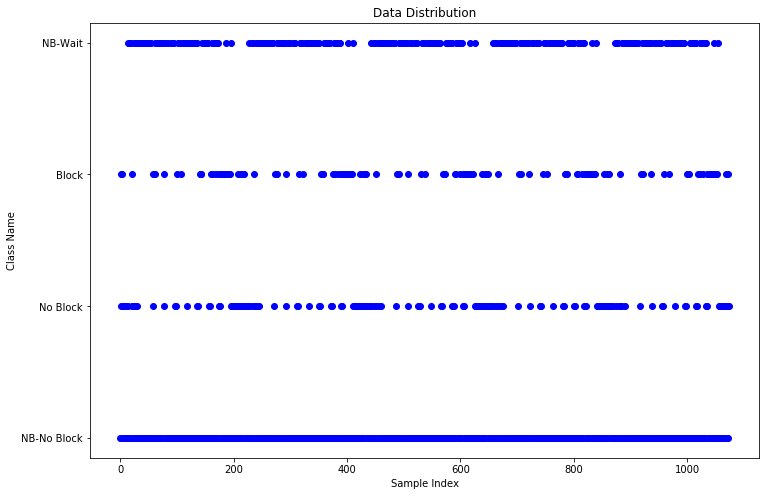

In [181]:
plt.figure(figsize=(12,8))
plt.plot(df.values[:,21], 'bo')
plt.yticks(np.arange(1, 5, step=1) , ['NB-No Block', 'No Block', 'Block', 'NB-Wait'])
plt.ylabel("Class Name")
plt.xlabel("Sample Index")
plt.title('Data Distribution')

#### 2.1.3 Dividing data into Input and Target

In [182]:
data= np.array(df.values)
X = data[:,0:21]                
T = data[:,-1].reshape(-1,1)    

#### 2.1.4 Data Partitioning

In [183]:
np.random.seed(28031994)
Xtrain, Ttrain, Xtest, Ttest = partition(X, T, 0.8, classification=True, shuffle=True)

<a id='Section22'> </a>
### 2.2. Quadratic Discriminant Analysis (QDA)

#### 2.2.1. Train QDA model

In [184]:
qda = QDA()      
qda.fit(Xtrain, Ttrain)

#### 2.2.2. Predict QDA

In [185]:
Ytrain_QDA, TrainProbability, _ = qda.predict(Xtrain, allOutputs=True)
Ytest_QDA, TestProbability,_= qda.predict(Xtest, allOutputs=True)

#### 2.2.3. Plot results of Training data

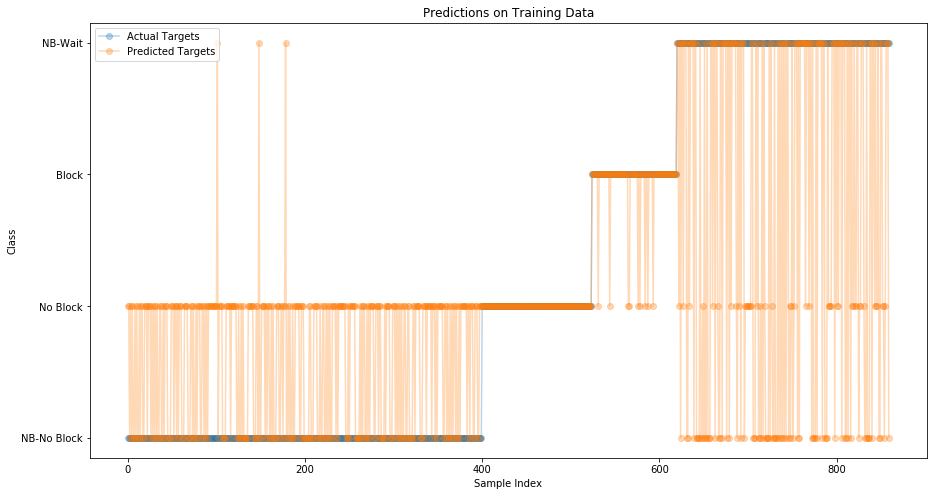

In [186]:
plt.figure(figsize=(15, 8))
plt.plot(np.hstack((Ttrain, Ytrain_QDA)), 'o-', alpha=0.3)
plt.yticks(np.arange(1, 5, step=1) , ['NB-No Block', 'No Block', 'Block', 'NB-Wait'])
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='upper left')

#### 2.2.4 Plot results of Testing data

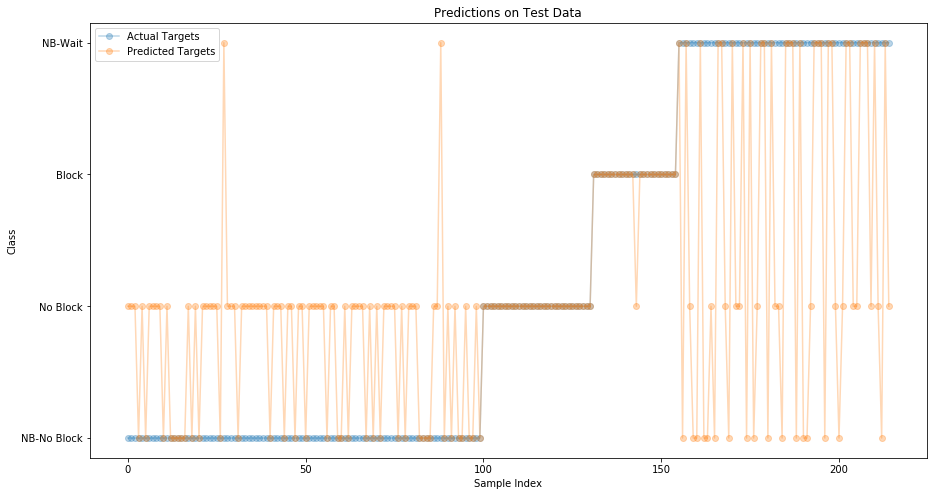

In [187]:
plt.figure(figsize=(15, 8))
plt.plot(np.hstack((Ttest, Ytest_QDA)), 'o-', alpha=0.3)
plt.yticks(np.arange(1, 5, step=1) , ['NB-No Block', 'No Block', 'Block', 'NB-Wait'])
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Predictions on Test Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='upper left')

#### 2.2.5. Confusion Matrix for Training Set

In [188]:
cm = confusionMatrix(Ttrain, Ytrain_QDA, np.unique(Ttrain).astype(int))

       1    2    3    4
    ------------------------
 1 | 42.2 57.0  0    0.8
 2 |  0  100.0  0    0  
 3 |  0    9.4 90.6  0  
 4 | 32.5 18.3  0   49.2


#### 2.2.6. Confusion Matrix for Test Set

In [189]:
cm = confusionMatrix(Ttest, Ytest_QDA, np.unique(Ttest).astype(int))

       1    2    3    4
    ------------------------
 1 | 36.0 62.0  0    2.0
 2 |  0  100.0  0    0  
 3 |  0    4.2 95.8  0  
 4 | 28.3 26.7  0   45.0


#### 2.2.7 Percentage Accuracy On Training and Testing Data

In [190]:
print('{:s} {:}'.format('Accuracy of QDA on Training Data', accuracy(Ytrain_QDA, Ttrain)))
print('{:s} {:}'.format('Accuracy of QDA on Test Data', accuracy(Ytest_QDA, Ttest)))

Accuracy of QDA on Training Data 57.906976744186046
Accuracy of QDA on Test Data 54.418604651162795


<a id='Section23'> </a>
### 2.3. Linear Discriminant Analysis (LDA)

#### 2.3.1. Train LDA model

In [191]:
lda = LDA()           
lda.fit(Xtrain, Ttrain)

#### 2.3.2. Predict LDA model

In [192]:
Ytrain_LDA, TrainProbability, _ = lda.predict(Xtrain, allOutputs=True)
Ytest_LDA, TestProbability,_= lda.predict(Xtest, allOutputs=True)     

#### 2.3.3. Plot results of Training data

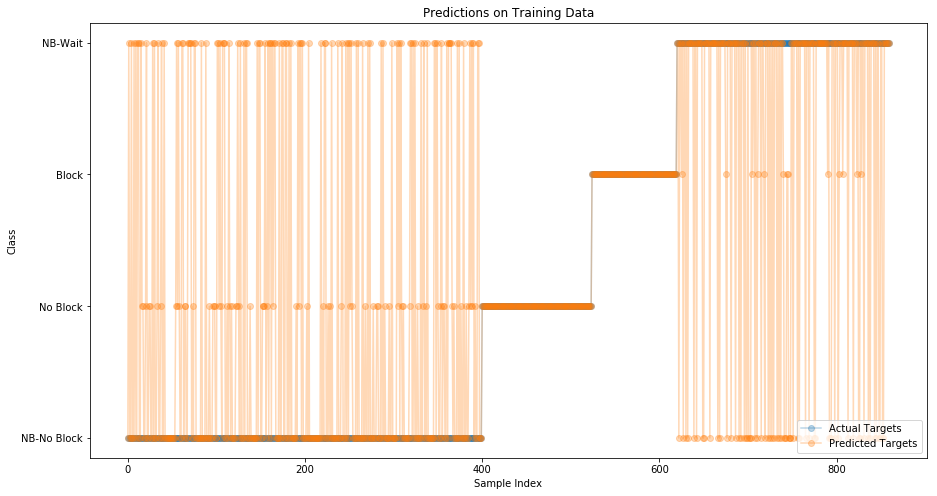

In [193]:
plt.figure(figsize=(15, 8))
plt.plot(np.hstack((Ttrain, Ytrain_LDA)), 'o-', alpha=0.3)
plt.yticks(np.arange(1, 5, step=1) , ['NB-No Block', 'No Block', 'Block', 'NB-Wait'])
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

#### 2.3.4. Plot results of Testing data

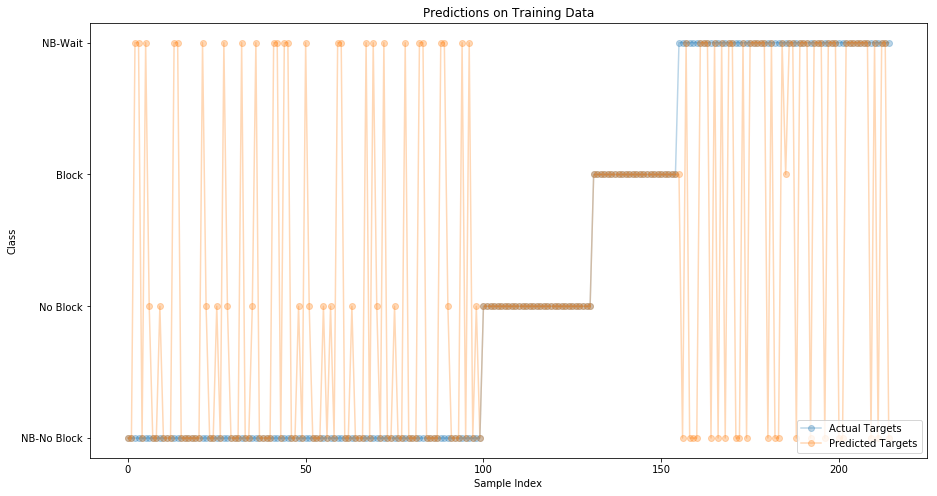

In [194]:
plt.figure(figsize=(15, 8))
plt.plot(np.hstack((Ttest, Ytest_LDA)), 'o-', alpha=0.3)
plt.yticks(np.arange(1, 5, step=1) , ['NB-No Block', 'No Block', 'Block', 'NB-Wait'])
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

#### 2.3.5. Confusion Matrix on Training Set

In [195]:
cm = confusionMatrix(Ttrain, Ytrain_LDA, np.unique(Ttrain).astype(int))

       1    2    3    4
    ------------------------
 1 | 57.8 16.2  0   26.0
 2 |  0  100.0  0    0  
 3 |  0    0  100.0  0  
 4 | 26.7  0    5.4 67.9


#### 2.3.6. Confusion Matrix on Test Set

In [196]:
cm = confusionMatrix(Ttest, Ytest_LDA, np.unique(Ttest).astype(int))

       1    2    3    4
    ------------------------
 1 | 59.0 15.0  0   26.0
 2 |  0  100.0  0    0  
 3 |  0    0  100.0  0  
 4 | 35.0  0    3.3 61.7


#### 2.3.7. Percentage Accuracy on Training and Testing set

In [197]:
print('{:s} {:}'.format('Accuracy of LDA on Training Data :', accuracy(Ytrain_LDA, Ttrain)))
print('{:s} {:}'.format('Accuracy of LDA on Test Data     :', accuracy(Ytest_LDA, Ttest)))

Accuracy of LDA on Training Data : 71.3953488372093
Accuracy of LDA on Test Data     : 70.23255813953489


<a id='Section24'> </a>
### 2.4. Non-Linear Logistic Regression

### 2.4.1. Neural Network - [10] 

#### 2.4.1.1. Train Neural Network

In [198]:
np.random.seed(28031994)
nn = NeuralNetworkClassifier(X.shape[1], [10], len(np.unique(T)))
nn.fit(Xtrain, Ttrain, 100, verbose=True)
print(nn)

scg: Iteration 10 fValue Eval 0.18036629539194657 Scale 0.000128
scg: Iteration 20 fValue Eval 0.13388616344689816 Scale 0.000512
scg: Iteration 30 fValue Eval 0.1039838027819954 Scale 5e-07
scg: Iteration 40 fValue Eval 0.08195072712905452 Scale 4.8828125e-10
scg: Iteration 50 fValue Eval 0.06555871189309678 Scale 4.76837158203125e-13
scg: Iteration 60 fValue Eval 0.05724615787341188 Scale 1e-15
scg: Iteration 70 fValue Eval 0.04298777042757962 Scale 1e-15
scg: Iteration 80 fValue Eval 0.03508847498993351 Scale 1e-15
scg: Iteration 90 fValue Eval 0.027593348260293096 Scale 1e-15
scg: Iteration 100 fValue Eval 0.02249611711415903 Scale 1e-15
NeuralNetwork(21, [10], 4)
   Network was trained for 101 iterations that took 0.22460 seconds. Final error is 0.1499870564887485.


#### 2.4.1.2. Likelihood Plot

Text(0.5,1,'Likelihood Plot')

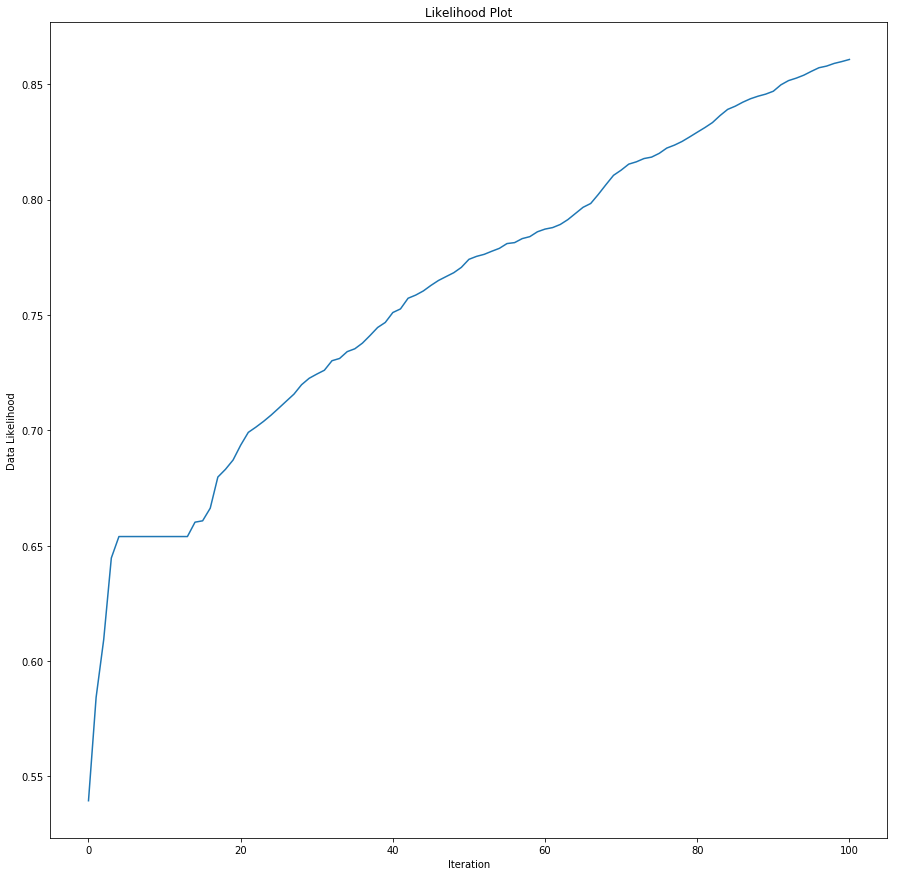

In [199]:
plt.figure(figsize=(15,15))
plt.plot(np.exp(-nn.getErrors()))  
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood')
plt.title('Likelihood Plot')

#### 2.4.1.3. Predictions on Training and Testing Data

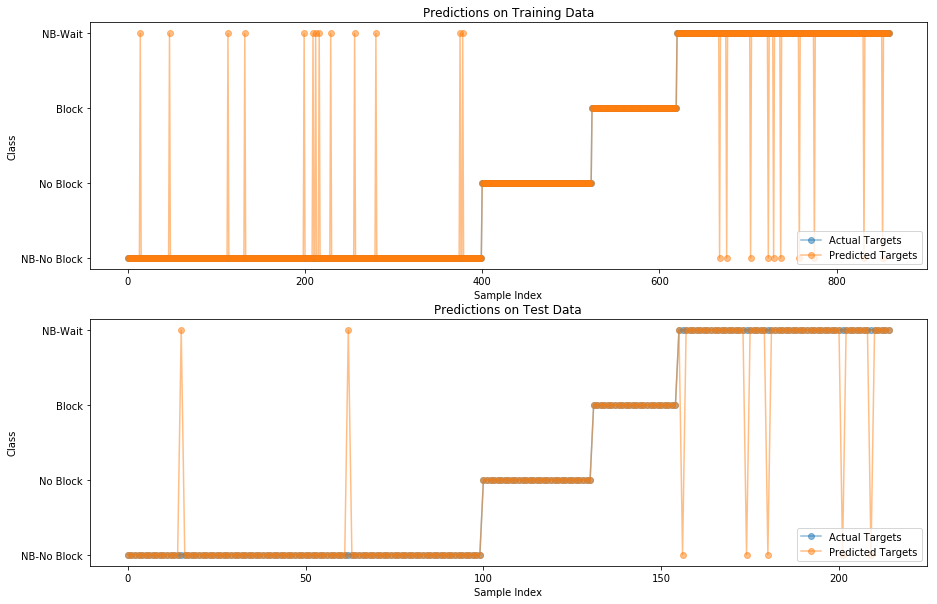

In [200]:
Ytrain_NL_10 = nn.predict(Xtrain) 
Ytest_NL_10 = nn.predict(Xtest)   

plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
plt.plot(np.hstack((Ttrain, Ytrain_NL_10)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.yticks(np.arange(1, 5, step=1) , ['NB-No Block', 'No Block', 'Block', 'NB-Wait'])
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

plt.subplot(2,1,2)
plt.plot(np.hstack((Ttest, Ytest_NL_10)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.yticks(np.arange(1, 5, step=1) , ['NB-No Block', 'No Block', 'Block', 'NB-Wait'])
plt.title('Predictions on Test Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

#### 2.4.1.4. Confusion Matrix

In [201]:
print ("Confusion Matrix for Training Samples")
cm = confusionMatrix(Ttrain, Ytrain_NL_10, np.unique(Ttrain).astype(int))

print ("\nConfusion Matrix for Testing Samples")
cm = confusionMatrix(Ttest, Ytest_NL_10, np.unique(Ttest).astype(int))

Confusion Matrix for Training Samples
       1    2    3    4
    ------------------------
 1 | 96.8  0    0    3.2
 2 |  0  100.0  0    0  
 3 |  0    0  100.0  0  
 4 |  4.2  0    0   95.8

Confusion Matrix for Testing Samples
       1    2    3    4
    ------------------------
 1 | 98.0  0    0    2.0
 2 |  0  100.0  0    0  
 3 |  0    0  100.0  0  
 4 |  8.3  0    0   91.7


#### 2.4.1.5. Overall Percentage Accuracy

In [202]:
print('{:s} {:}'.format('Accuracy of NLR NN-[10] on Training Data :', accuracy(Ytrain_NL_10, Ttrain)))
print('{:s} {:}'.format('Accuracy of NLR NN-[10] on Test Data     :', accuracy(Ytest_NL_10, Ttest)))

Accuracy of NLR NN-[10] on Training Data : 97.32558139534883
Accuracy of NLR NN-[10] on Test Data     : 96.74418604651163


### 2.4.2. NeuralNetwork - [10, 10]

#### 2.4.2.1. Train Neural Network

In [203]:
np.random.seed(28031994)
nn = NeuralNetworkClassifier(X.shape[1], [10, 10], len(np.unique(T)))
nn.fit(Xtrain, Ttrain, 100, verbose=True)
print(nn)

scg: Iteration 10 fValue Eval 0.16328141344661637 Scale 0.000529409948605153
scg: Iteration 20 fValue Eval 0.12650136826459302 Scale 0.002117639794420612
scg: Iteration 30 fValue Eval 0.10186300412582543 Scale 2.068007611738879e-06
scg: Iteration 40 fValue Eval 0.08890570235583191 Scale 2.019538683338749e-09
scg: Iteration 50 fValue Eval 0.08046996159241984 Scale 1.972205745447997e-12
scg: Iteration 60 fValue Eval 0.07228668014550199 Scale 1.9259821732890595e-15
scg: Iteration 70 fValue Eval 0.0635711806088119 Scale 1e-15
scg: Iteration 80 fValue Eval 0.05272970378017897 Scale 1e-15
scg: Iteration 90 fValue Eval 0.042879871716111066 Scale 1e-15
scg: Iteration 100 fValue Eval 0.03644085835950427 Scale 1e-15
NeuralNetwork(21, [10, 10], 4)
   Network was trained for 101 iterations that took 0.29779 seconds. Final error is 0.19089488824875397.


#### 2.4.2.2. Likelihood Plot

Text(0.5,1,'Likelihood Plot')

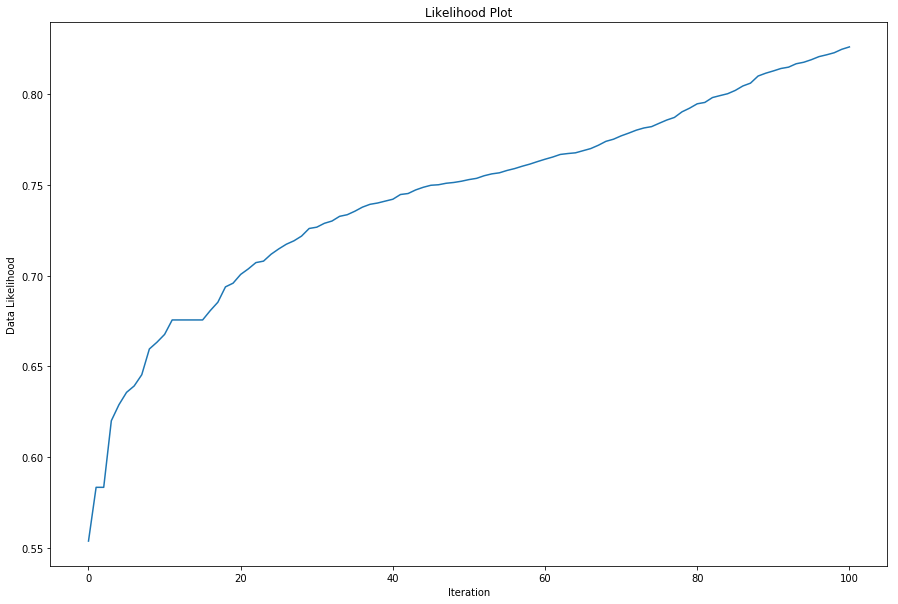

In [204]:
plt.figure(figsize=(15,10))
plt.plot(np.exp(-nn.getErrors())) 
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood')
plt.title('Likelihood Plot')

#### 2.4.2.3. Predictions on Training and Testing Sets

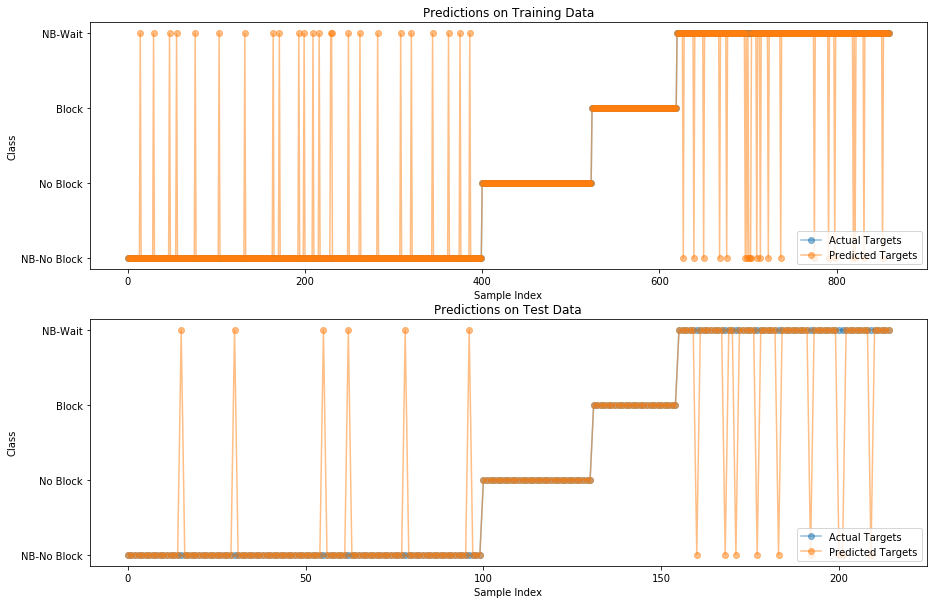

In [205]:
Ytrain_NL_10_10 = nn.predict(Xtrain) 
Ytest_NL_10_10 = nn.predict(Xtest)   

plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
plt.plot(np.hstack((Ttrain, Ytrain_NL_10_10)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.yticks(np.arange(1, 5, step=1) , ['NB-No Block', 'No Block', 'Block', 'NB-Wait'])
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

plt.subplot(2,1,2)
plt.plot(np.hstack((Ttest, Ytest_NL_10_10)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.yticks(np.arange(1, 5, step=1) , ['NB-No Block', 'No Block', 'Block', 'NB-Wait'])
plt.title('Predictions on Test Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

#### 2.4.2.4. Confusion Matrix

In [206]:
print ("Confusion Matrix for Training Samples")
cm = confusionMatrix(Ttrain, Ytrain_NL_10_10, np.unique(Ttrain).astype(int))

print ("\nConfusion Matrix for Testing Samples")
cm = confusionMatrix(Ttest, Ytest_NL_10_10, np.unique(Ttest).astype(int))

Confusion Matrix for Training Samples
       1    2    3    4
    ------------------------
 1 | 94.0  0    0    6.0
 2 |  0  100.0  0    0  
 3 |  0    0  100.0  0  
 4 |  8.8  0    0   91.2

Confusion Matrix for Testing Samples
       1    2    3    4
    ------------------------
 1 | 94.0  0    0    6.0
 2 |  0  100.0  0    0  
 3 |  0    0  100.0  0  
 4 | 15.0  0    0   85.0


#### 2.4.2.5. Overall Percentage Accuracy

In [207]:
print('{:s} {:}'.format('Accuracy of NLR NN-[10, 10] on Training Data :',accuracy(Ytrain_NL_10_10, Ttrain)))
print('{:s} {:}'.format('Accuracy of NLR NN-[10, 10] on Test Data     :',accuracy(Ytest_NL_10_10, Ttest)))

Accuracy of NLR NN-[10, 10] on Training Data : 94.76744186046511
Accuracy of NLR NN-[10, 10] on Test Data     : 93.02325581395348


### 2.4.3. Multiple Network Structure

#### 2.4.3.1. Train & Evaluate Multiple Neural Network Structures

                   0          1          2
0                [2]  81.046512  80.465116
1                [5]  90.581395  86.511628
2               [10]  95.465116  92.558140
3               [20]  98.953488  99.534884
4               [25]  98.953488  99.534884
5               [50]  98.953488  99.534884
6             [2, 2]  67.441860  65.116279
7             [5, 5]  88.255814  86.511628
8           [10, 10]  92.325581  91.162791
9           [20, 20]  94.883721  94.883721
10          [25, 25]  93.604651  93.023256
11          [50, 50]  98.372093  97.209302
12         [2, 2, 2]  75.813953  73.488372
13         [5, 5, 5]  81.627907  78.139535
14      [10, 10, 10]  88.255814  86.511628
15      [20, 20, 20]  90.581395  86.511628
16      [25, 25, 25]  96.744186  94.418605
17      [50, 50, 50]  91.976744  92.558140
18      [2, 2, 2, 2]  68.720930  66.976744
19      [5, 5, 5, 5]  86.627907  83.720930
20  [10, 10, 10, 10]  87.441860  82.790698
21  [20, 20, 20, 20]  92.558140  90.232558
22  [25, 25

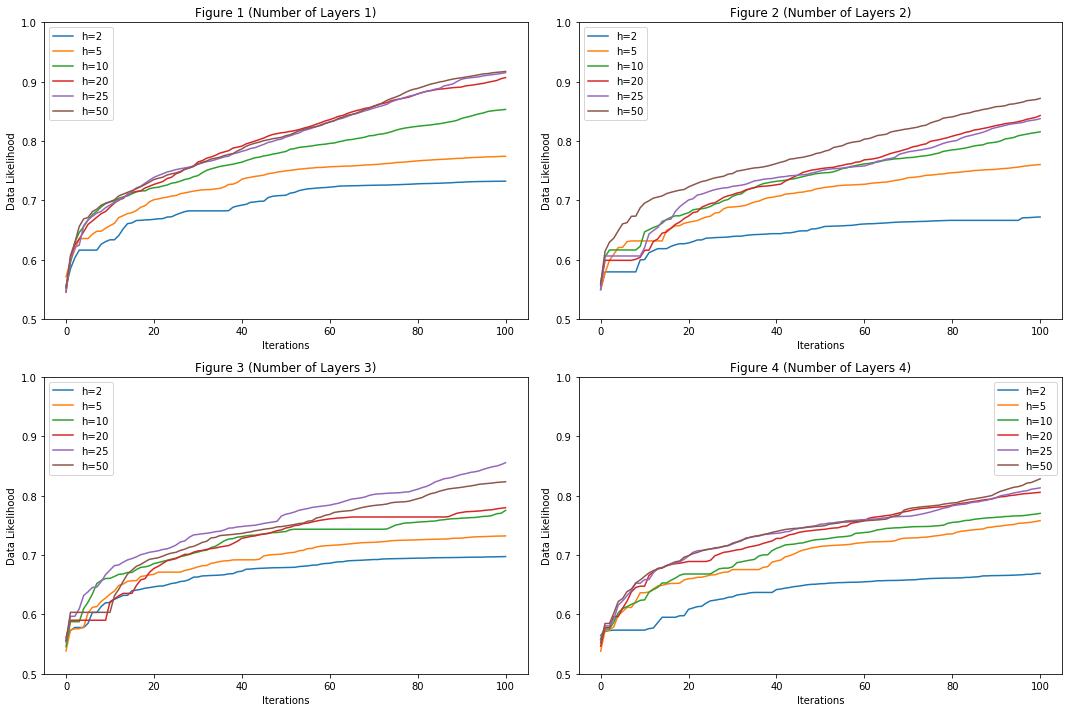

In [208]:
likelihoodList = []
accuracyList = []
dataF = []

plt.figure(figsize=(15,10))
np.random.seed(28031994)
for nHiddenLayers in [1,2,3,4]:
    plt.subplot(2,2,nHiddenLayers)
    for nHiddenUnits in [2, 5, 10, 20, 25, 50]:
        hiddenLayerStructure = [nHiddenUnits]*nHiddenLayers
        nn = NeuralNetworkClassifier(X.shape[1], hiddenLayerStructure, len(np.unique(T)))
        nn.fit(Xtrain, Ttrain, Iterations=100, verbose=False)
        Ytrain = nn.predict(Xtrain)
        Ytest = nn.predict(Xtest)
        plt.plot(np.exp(-nn.getErrors()), label='h='+str(nHiddenUnits))
        plt.ylim(0.5, 1.0) 
        plt.ylabel('Data Likelihood')
        plt.xlabel('Iterations')
        plt.legend(loc='best')
        
        accuracyTrain= np.sum(Ytrain == Ttrain)/ len(Ttrain) * 100
        accuracyTest= np.sum(Ytest == Ttest)/ len(Ttest) * 100
        accuracyList.append([hiddenLayerStructure,accuracyTrain,accuracyTest])
        
        likelihoodList.append(np.exp(-nn.getErrors()))
        
    plt.title('Figure {} (Number of Layers {})'.format(nHiddenLayers, nHiddenLayers))
    
plt.tight_layout()
dataF = pd.DataFrame(accuracyList)
print(dataF)

#### 2.4.3.2. Extracting Best Hidden Layer Structure for Train & Test Sets

In [209]:
bestStructureTrain = []
bestStructureTest = []

npArr = dataF.values                                               
maxIndicesTrain = np.where(npArr[:,1] == max(dataF[1]))[0].tolist()
bestStructureTrain = dataF[0][maxIndicesTrain[:]].values.tolist()  

maxIndicesTest = np.where(npArr[:,2] == max(dataF[2]))[0].tolist() 
bestStructureTest = dataF[0][maxIndicesTest[:]].values.tolist()    

likelihoodArray = np.asarray(likelihoodList)        
maxLikelihood = (max(np.ravel(likelihoodArray)))
print('Best Hidden Layer Structure for Training Data: {}'.format(bestStructureTrain))
print('Best Percentage Accuracy for Training Data   : {}'.format(max(dataF[1])))
print(" ")
print('Best Hidden Layer Structure for Testing Data : {}'.format(bestStructureTest))
print('Best Percentage Accuracy for Testing Data    : {}'.format(max(dataF[2])))
print(" ")
print('Maximum Likelihood: {:f}'.format(maxLikelihood))


Best Hidden Layer Structure for Training Data: [[20], [25], [50]]
Best Percentage Accuracy for Training Data   : 98.95348837209302
 
Best Hidden Layer Structure for Testing Data : [[20], [25], [50]]
Best Percentage Accuracy for Testing Data    : 99.53488372093024
 
Maximum Likelihood: 0.917344


#### 2.4.3.3. Confusion Matrix for Best Hidden Layer Structture Identified on Training Samples

In [210]:
np.random.seed(28031994)
for hidden in bestStructureTrain:
    nn = NeuralNetworkClassifier(X.shape[1], hidden, len(np.unique(T)))
    nn.fit(Xtrain, Ttrain, 100)
    print(nn)
    Ytrain = nn.predict(Xtrain)
    print ("\nConfusion Matrix with Best NN Structure identified on training samples")
    cm = confusionMatrix(Ttrain, Ytrain, np.unique(Ttrain).astype(int))
    print(" ")

NeuralNetwork(21, [20], 4)
   Network was trained for 101 iterations that took 0.14940 seconds. Final error is 0.10218835893728376.

Confusion Matrix with Best NN Structure identified on training samples
       1    2    3    4
    ------------------------
 1 | 99.0  0    0    1.0
 2 |  0  100.0  0    0  
 3 |  0    0  100.0  0  
 4 |  1.2  0    0   98.8
 
NeuralNetwork(21, [25], 4)
   Network was trained for 101 iterations that took 0.18564 seconds. Final error is 0.09572844544578522.

Confusion Matrix with Best NN Structure identified on training samples
       1    2    3    4
    ------------------------
 1 | 99.0  0    0    1.0
 2 |  0  100.0  0    0  
 3 |  0    0  100.0  0  
 4 |  2.1  0    0   97.9
 
NeuralNetwork(21, [50], 4)
   Network was trained for 101 iterations that took 0.30180 seconds. Final error is 0.06796225468627563.

Confusion Matrix with Best NN Structure identified on training samples
       1    2    3    4
    ------------------------
 1 | 99.0  0    0    1.0


#### 2.4.3.4. Confusion Matrix for Best Hidden Layer Structure Identified on Test Set

In [211]:
np.random.seed(28031994)
for hidden in bestStructureTest:
    nn = NeuralNetworkClassifier(X.shape[1], hidden, len(np.unique(T)))
    nn.fit(Xtrain, Ttrain, 100)
    print(nn)
    Ytest = nn.predict(Xtest)    
    print ("\nConfusion Matrix with Best NN Structure identified on test samples")
    cm = confusionMatrix(Ttest, Ytest, np.unique(Ttest).astype(int))
    print(" ")

NeuralNetwork(21, [20], 4)
   Network was trained for 101 iterations that took 0.22661 seconds. Final error is 0.10218835893728376.

Confusion Matrix with Best NN Structure identified on test samples
       1    2    3    4
    ------------------------
 1 | 99.0  0    0    1.0
 2 |  0  100.0  0    0  
 3 |  0    0  100.0  0  
 4 |  3.3  0    0   96.7
 
NeuralNetwork(21, [25], 4)
   Network was trained for 101 iterations that took 0.22460 seconds. Final error is 0.09572844544578522.

Confusion Matrix with Best NN Structure identified on test samples
       1    2    3    4
    ------------------------
 1 | 99.0  0    0    1.0
 2 |  0  100.0  0    0  
 3 |  0    0  100.0  0  
 4 |  0    0    0  100.0
 
NeuralNetwork(21, [50], 4)
   Network was trained for 101 iterations that took 0.29462 seconds. Final error is 0.06796225468627563.

Confusion Matrix with Best NN Structure identified on test samples
       1    2    3    4
    ------------------------
 1 | 99.0  0    0    1.0
 2 |  0  100

<a id='Section25'> </a>
### 2.5. Linear Logistic Regression

#### 2.5.1 Train Neural Network (NN-[0])

In [212]:
np.random.seed(28031994)
nn = NeuralNetworkClassifier(X.shape[1], 0, len(np.unique(T))) 

#### 2.5.2. Likelihood Plot

scg: Iteration 10 fValue Eval 0.13537053272347585 Scale 1.953125e-09
scg: Iteration 20 fValue Eval 0.11365241145715269 Scale 1.9073486328125e-12
scg: Iteration 30 fValue Eval 0.10512919187688521 Scale 1.862645149230957e-15
scg: Iteration 40 fValue Eval 0.101950617469085 Scale 1e-15
scg: Iteration 50 fValue Eval 0.09864005843273921 Scale 1e-15
scg: Iteration 60 fValue Eval 0.097179208318165 Scale 1e-15
scg: Iteration 70 fValue Eval 0.09581199061265018 Scale 1e-15
scg: Iteration 80 fValue Eval 0.09440602475616311 Scale 1e-15
scg: Iteration 90 fValue Eval 0.09390554161003101 Scale 1.024e-12
scg: Iteration 100 fValue Eval 0.09390554161003101 Scale 1.073741824e-06


Text(0.5,1,'Likelihood Plot for 100 Iterations')

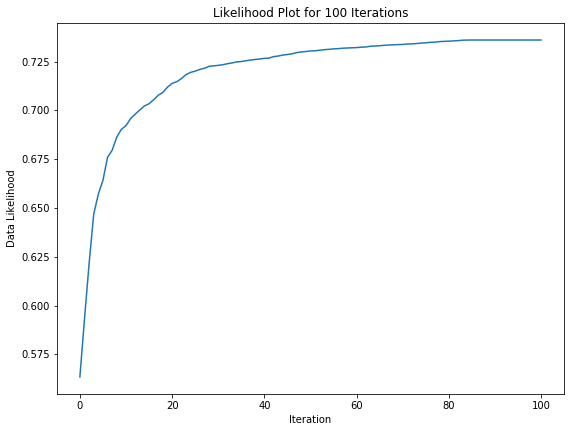

In [213]:
plt.figure(figsize=(20,15))

nn.fit(Xtrain, Ttrain, 100, verbose=True)
plt.subplot(2, 2, 1)
plt.plot(np.exp(-nn.getErrors()))  
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood')
plt.title('Likelihood Plot for 100 Iterations')

#### 2.5.3 Predictions on Train & Test Samples

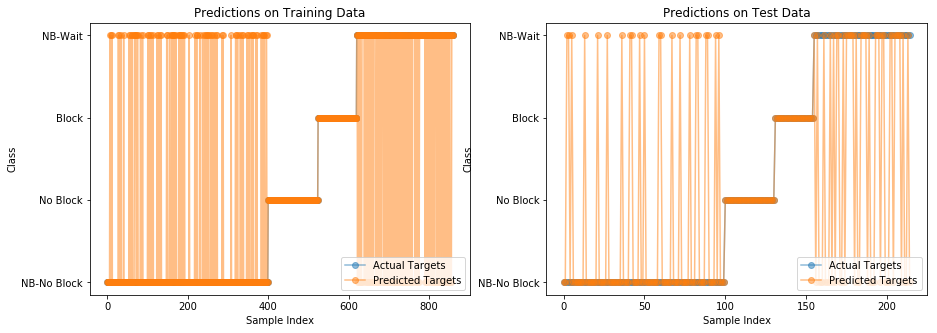

In [214]:
Ytrain_LR = nn.predict(Xtrain)     
Ytest_LR = nn.predict(Xtest)       

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(np.hstack((Ttrain, Ytrain_LR)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.yticks(np.arange(1, 5, step=1) , ['NB-No Block', 'No Block', 'Block', 'NB-Wait'])
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

plt.subplot(1, 2 ,2)
plt.plot(np.hstack((Ttest, Ytest_LR)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.yticks(np.arange(1, 5, step=1) , ['NB-No Block', 'No Block', 'Block', 'NB-Wait'])
plt.title('Predictions on Test Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

#### 2.5.4. Confusion Matrix for Linear Logistic Regression Models

In [215]:
print ("Confusion Matrix for Training Samples")
cm = confusionMatrix(Ttrain, Ytrain_LR, np.unique(Ttrain).astype(int))

print ("\nConfusion Matrix for Testing Samples")
cm = confusionMatrix(Ttest, Ytest_LR, np.unique(Ttest).astype(int))

Confusion Matrix for Training Samples
       1    2    3    4
    ------------------------
 1 | 79.2  0    0   20.8
 2 |  0  100.0  0    0  
 3 |  0    0  100.0  0  
 4 | 38.3  0    0   61.7

Confusion Matrix for Testing Samples
       1    2    3    4
    ------------------------
 1 | 78.0  0    0   22.0
 2 |  0  100.0  0    0  
 3 |  0    0  100.0  0  
 4 | 46.7  0    0   53.3


#### 2.5.5 Overall Percentage Accuracy

In [216]:
print('{:s} {:}'.format('Accuracy of Linear LR on Training Data :', accuracy(Ytrain_LR, Ttrain)))
print('{:s} {:}'.format('Accuracy of Linear LR on Test Data     :', accuracy(Ytest_LR, Ttest)))

Accuracy of Linear LR on Training Data : 79.65116279069767
Accuracy of Linear LR on Test Data     : 76.74418604651163


<a id='Section26'> </a>
### 2.6. K-Nearest Neighbors Classification

### 2.6.1 K = 1

#### 2.6.1.1. Instantiate and Train KNN Model with K = 1

In [217]:
np.random.seed(28031994)
knn = KNeighborsClassifier(n_neighbors=1)
print (knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [218]:
#standardizing
Xtrain_mean = Xtrain.mean(axis=0)
Xtrain_std = Xtrain.std(axis=0)
Xtrain_standardized = (Xtrain - Xtrain_mean)/Xtrain_std
a = isnan(Xtrain_standardized)
Xtrain_standardized[a] = 0.000000001

Xtest_standardized = (Xtest - Xtrain_mean)/Xtrain_std
a = isnan(Xtest_standardized)
Xtest_standardized[a] = 0.000000001

knn.fit(Xtrain_standardized, Ttrain.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### 2.6.1.2. Use KNN-1 Model

In [219]:
Ytrain_KNN = knn.predict(Xtrain_standardized)
Ytest_KNN = knn.predict(Xtest_standardized)

#### 2.6.1.3 Plot Predictions on Training and Testing Samples

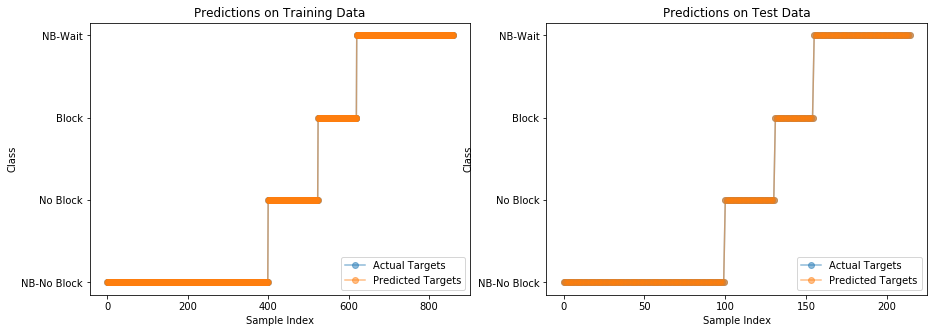

In [220]:
Ytrain_KNN = Ytrain_KNN.reshape(-1,1)
Ytest_KNN = Ytest_KNN.reshape(-1,1)

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(np.hstack((Ttrain, Ytrain_KNN)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.yticks(np.arange(1, 5, step=1) , ['NB-No Block', 'No Block', 'Block', 'NB-Wait'])
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

plt.subplot(1, 2 ,2)
plt.plot(np.hstack((Ttest, Ytest_KNN)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.yticks(np.arange(1, 5, step=1) , ['NB-No Block', 'No Block', 'Block', 'NB-Wait'])
plt.title('Predictions on Test Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

#### 2.6.1.4. Confusion Matrix

In [221]:
print ("Confusion Matrix for Training Samples")
cm = confusionMatrix(Ttrain, Ytrain_KNN, np.unique(Ttrain).astype(int))

print ("\nConfusion Matrix for Testing Samples")
cm = confusionMatrix(Ttest, Ytest_KNN, np.unique(Ttest).astype(int))

Confusion Matrix for Training Samples
       1    2    3    4
    ------------------------
 1 |100.0  0    0    0  
 2 |  0  100.0  0    0  
 3 |  0    0  100.0  0  
 4 |  0    0    0  100.0

Confusion Matrix for Testing Samples
       1    2    3    4
    ------------------------
 1 |100.0  0    0    0  
 2 |  0  100.0  0    0  
 3 |  0    0  100.0  0  
 4 |  0    0    0  100.0


#### 2.6.1.5. Percentage Accuracy for KNN (K = 1)

In [222]:
print('{:s} {:}'.format('Accuracy of KNN-1 on Training Data :', accuracy(Ytrain_KNN, Ttrain)))
print('{:s} {:}'.format('Accuracy of KNN-1 on Test Data     :', accuracy(Ytest_KNN, Ttest)))

Accuracy of KNN-1 on Training Data : 100.0
Accuracy of KNN-1 on Test Data     : 100.0


### 2.6.2. KNN = 5

#### 2.6.2.1. Instantiate & Train KNN model with K = 5

In [223]:
np.random.seed(28031994)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain_standardized,Ttrain.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### 2.6.2.2. Use KNN-5 Model

In [224]:
Ytrain_KNN5 = knn.predict(Xtrain_standardized)
Ytest_KNN5 = knn.predict(Xtest_standardized)

#### 2.6.2.3. Plot Predictions on Training and Test Data

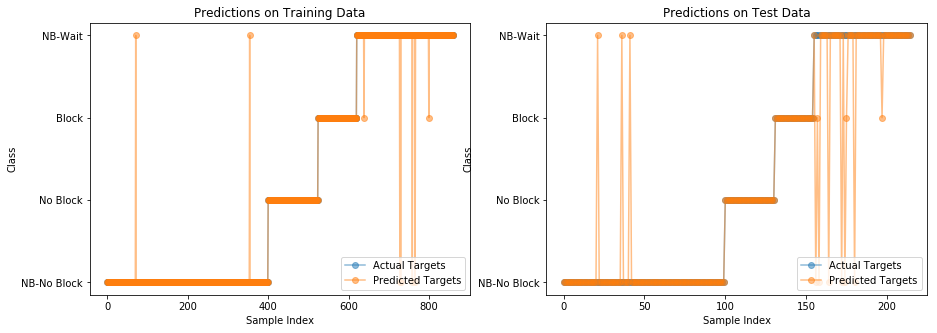

In [225]:
Ytrain_KNN5 = Ytrain_KNN5.reshape(-1,1)
Ytest_KNN5 = Ytest_KNN5.reshape(-1,1)

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(np.hstack((Ttrain, Ytrain_KNN5)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.yticks(np.arange(1, 5, step=1) , ['NB-No Block', 'No Block', 'Block', 'NB-Wait'])
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

plt.subplot(1, 2 ,2)
plt.plot(np.hstack((Ttest, Ytest_KNN5)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.yticks(np.arange(1, 5, step=1) , ['NB-No Block', 'No Block', 'Block', 'NB-Wait'])
plt.title('Predictions on Test Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

#### 2.6.2.4. Overall Percentage Accuracy

In [226]:
print('{:s} {:}'.format('Accuracy of KNN-5 on Training Data :',accuracy(Ytrain_KNN5, Ttrain)))
print('{:s} {:}'.format('Accuracy of KNN-5 on Test Data     :',accuracy(Ytest_KNN5, Ttest)))

Accuracy of KNN-5 on Training Data : 99.06976744186046
Accuracy of KNN-5 on Test Data     : 94.41860465116278


### 2.6.3. Multiple Values of K

#### 2.6.3.1. Train & Evalue KNN with Multiple values of K

In [227]:
testAccuracy = []
trainAccuracy = []
np.random.seed(28031994)
for k in range (1,21):
    print('{:s} {:d}'.format("KNN with K = ", k))
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain_standardized,Ttrain.ravel())
    
    Ytrain_KNNK = knn.predict(Xtrain_standardized)
    Ytest_KNNK = knn.predict(Xtest_standardized)
    print('{:s} {:}'.format('Accuracy of Training Data :',accuracy(Ytrain_KNNK, Ttrain)))
    print('{:s} {:}'.format('Accuracy of Test Data     :',accuracy(Ytest_KNNK, Ttest)))
    print(" ")
    testAccuracy.append(accuracy(Ytest_KNNK, Ttest))
    trainAccuracy.append(accuracy(Ytrain_KNNK, Ttrain))

KNN with K =  1
Accuracy of Training Data : 100.0
Accuracy of Test Data     : 100.0
 
KNN with K =  2
Accuracy of Training Data : 100.0
Accuracy of Test Data     : 100.0
 
KNN with K =  3
Accuracy of Training Data : 100.0
Accuracy of Test Data     : 100.0
 
KNN with K =  4
Accuracy of Training Data : 99.30232558139535
Accuracy of Test Data     : 95.81395348837209
 
KNN with K =  5
Accuracy of Training Data : 99.06976744186046
Accuracy of Test Data     : 94.41860465116278
 
KNN with K =  6
Accuracy of Training Data : 97.32558139534883
Accuracy of Test Data     : 89.76744186046511
 
KNN with K =  7
Accuracy of Training Data : 95.93023255813954
Accuracy of Test Data     : 86.04651162790698
 
KNN with K =  8
Accuracy of Training Data : 88.48837209302326
Accuracy of Test Data     : 78.6046511627907
 
KNN with K =  9
Accuracy of Training Data : 86.16279069767442
Accuracy of Test Data     : 78.6046511627907
 
KNN with K =  10
Accuracy of Training Data : 82.09302325581396
Accuracy of Test Data

#### 2.6.3.2. Plot Prediction accuracy on training and testing data

Text(0.5,1,'Train Accuracy Vs K values')

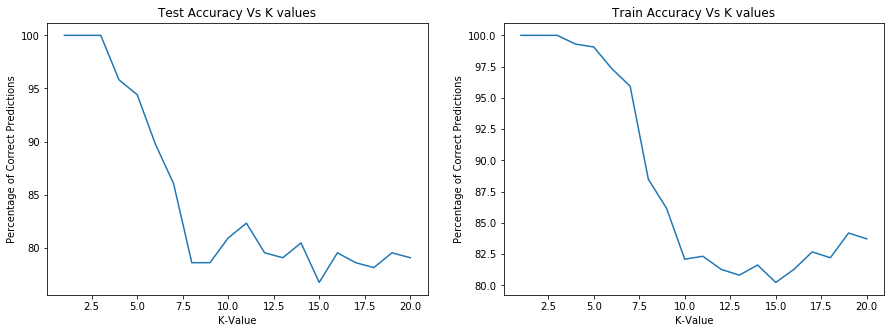

In [228]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(range(1,21), testAccuracy)
plt.xlabel('K-Value')
plt.ylabel('Percentage of Correct Predictions')
plt.title('Test Accuracy Vs K values')

plt.subplot(1,2,2)
plt.plot(range(1,21), trainAccuracy)
plt.xlabel('K-Value')
plt.ylabel('Percentage of Correct Predictions')
plt.title('Train Accuracy Vs K values')

<a id='Section27'></a>
### 2.7. Results Summary

|Algorithms|% Accuracy on Training Data|% Accuracy on Test Data|
|---------|-----|-----|
|QDA|57.91|54.42|
|LDA|74.40|70.23|
|NLLR - [10]|97.33|96.74|
|NLLR - [10, 10]|94.77|93.02|
|NLLR - [20]|98.95|99.53|
|NLLR - [25]|98.95|99.53|
|NLLR - [50]|98.95|99.53|
|LLR|79.65|76.74|
|KNN (K=1)|100.00|100.00|
|KNN (K=5)|99.07|94.42|
|KNN (K=10)|82.09|80.93|
|KNN (K=15)|80.23|76.74|
|KNN (K = 20)|83.72|79.07|

<a id='Section3'></a>
## 3. Letter Recognition

<a id='Section31'></a>
### 3.1. Data

The [Letter Recognition Data](https://archive.ics.uci.edu/ml/datasets/Letter+Recognition) data is available in UCI Machine Learning Repository.

#### 3.1.1. Data Loading

In [229]:
df = LoadLetterData('letter-recognition.data') 

Unique Classes in the given data set: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


In [230]:
df.head()

Letter  xBox  yBox  Width  Height  OnPix  xBar  yBar  x2Bar  y2Bar  xyBar  \
0      20     2     8      3       5      1     8    13      0      6      6   
1       9     5    12      3       7      2    10     5      5      4     13   
2       4     4    11      6       8      6    10     6      2      6     10   
3      14     7    11      6       6      3     5     9      4      6      4   
4       7     2     1      3       1      1     8     6      6      6      6   

   x2yBar  xy2Bar  xEdge  xEdgeCORy  yEdge  yEdgeCORx  
0      10       8      0          8      0          8  
1       3       9      2          8      4         10  
2       3       7      3          7      3          9  
3       4      10      6         10      2          8  
4       5       9      1          7      5         10

#### 3.1.2. Data Distribution Plot

Text(0.5,1,'Data Distribution')

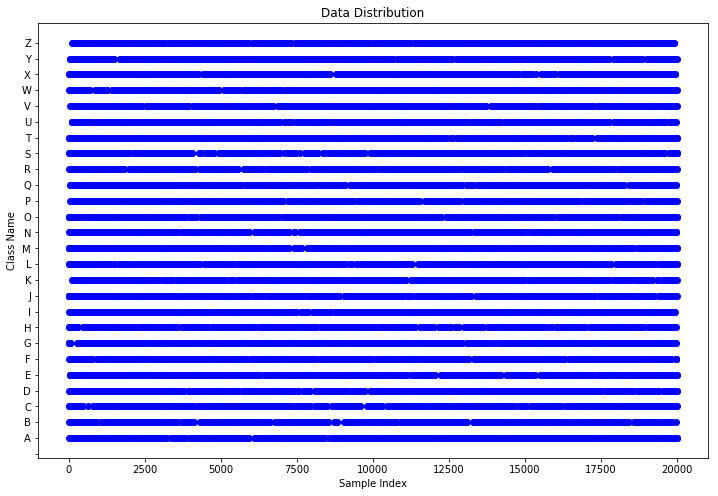

In [231]:
plt.figure(figsize=(12,8))
plt.plot(df.values[0:20000,0], 'bo')
plt.ylabel("Class Name")
plt.yticks(np.arange(0, 27, step=1), [' ', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                      'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
                                      'U', 'V', 'W', 'X', 'Y', 'Z'])
plt.ylabel("Class Name")
plt.xlabel("Sample Index")
plt.title('Data Distribution')

#### 3.1.3 Dividing data into Input and Target

In [232]:
data= np.array(df.values)
X = data[:,1:]            
T = data[:,0].reshape(-1,1)

#### 3.1.4 Data Partitioning

In [233]:
np.random.seed(28031994)
Xtrain, Ttrain, Xtest, Ttest = partition(X, T, 0.8, classification=True, shuffle=True)

<a id='Section32'> </a>
### 3.2. Quadratic Discriminant Analysis (QDA)

#### 3.2.1. Train QDA model

In [234]:
qda = QDA()       
qda.fit(Xtrain, Ttrain)

#### 3.2.2. Predict QDA model

In [235]:
Ytrain_QDA, TrainProbability, _ = qda.predict(Xtrain, allOutputs=True)
Ytest_QDA, TestProbability,_= qda.predict(Xtest, allOutputs=True)   

#### 3.2.3. Plot results of Training data

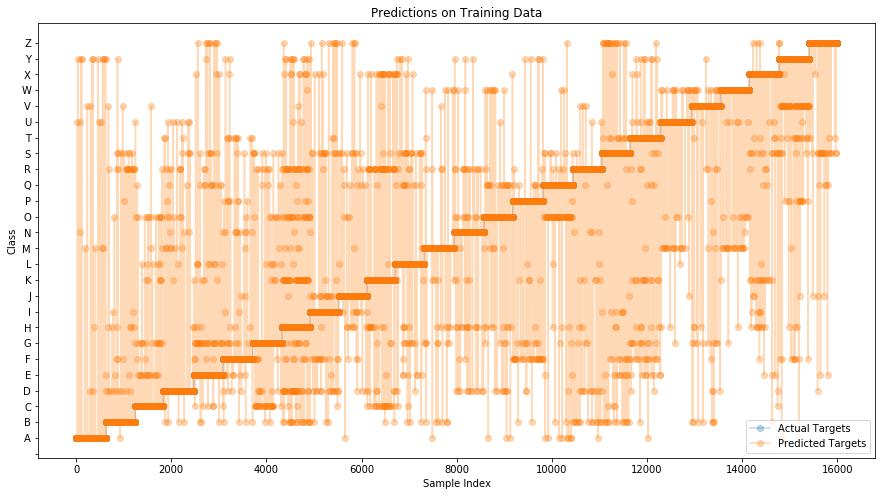

In [236]:
plt.figure(figsize=(15, 8))
plt.plot(np.hstack((Ttrain, Ytrain_QDA)), 'o-', alpha=0.3)
plt.yticks(np.arange(0, 27, step=1), [' ', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                      'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
                                      'U', 'V', 'W', 'X', 'Y', 'Z'])
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

#### 3.2.4 Plot results of Testing data

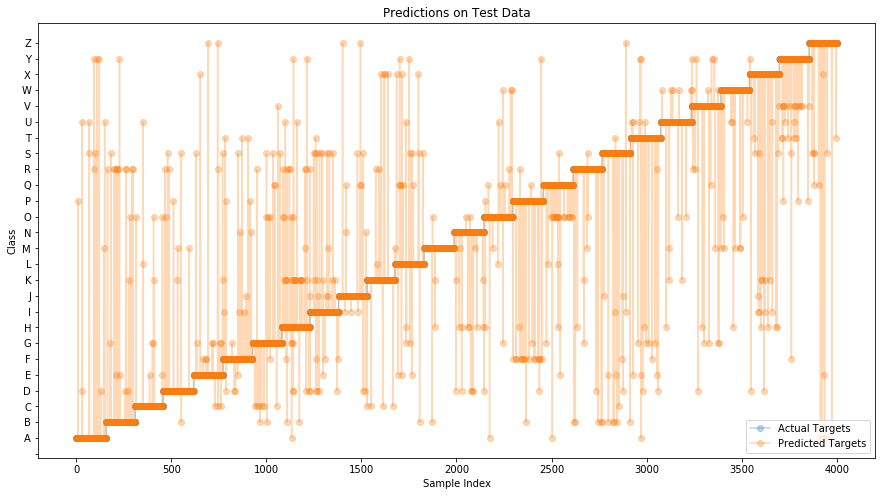

In [237]:
plt.figure(figsize=(15, 8))
plt.plot(np.hstack((Ttest, Ytest_QDA)), 'o-', alpha=0.3)
plt.yticks(np.arange(0, 27, step=1), [' ', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                      'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
                                      'U', 'V', 'W', 'X', 'Y', 'Z'])
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Predictions on Test Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

#### 3.2.5. Confusion Matrix for Training Set

In [238]:
cm = confusionMatrix(Ttrain, Ytrain_QDA, np.unique(Ttrain).astype(int))

       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26
    ------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 | 96.2  0    0    0.3  0    0    0    0.2  0    0    0    0    0.6  0.2  0    0    0    0    0    0    0.6  0.3  0    0    1.6  0  
 2 |  0.2 91.8  0    1.5  0.5  0.5  0    1.0  0.3  0    0    0    0    0    0.2  0.2  0    2.3  1.1  0    0    0.3  0    0    0.2  0  
 3 |  0    0   90.7  0    2.2  0.3  2.2  0    0    0    0.8  0.8  0.3  0    1.9  0    0.2  0.2  0    0    0.2  0.2  0    0    0    0  
 4 |  0    0.6  0   93.3  0    0    0    0.2  0    0    0.2  0.2  0.9  0.5  0.8  0.2  0.3  0.9  0.6  0.5  0.9  0    0    0    0    0  
 5 |  0    0.5  1.0  0   87.0  0.7  3.7  0.5  0    0    0.7  1.3  0    0    0    0    1.5  0.3  1.0  0    0    0    0    0.5  0.2  1.3
 6 |  0    0.6  0    0.6  1.0 

#### 3.2.6. Confusion Matrix for Test Set

In [239]:
cm = confusionMatrix(Ttest, Ytest_QDA, np.unique(Ttest).astype(int))

       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26
    ------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 | 91.8  0    0    1.3  0    0    0    0    0    0    0    0    0.6  0    0    0.6  0    0.6  1.3  0    1.9  0    0    0    1.9  0  
 2 |  0   87.6  0    1.3  1.3  0    0.7  0    0    0    0.7  0    0    0    0.7  0    0    6.5  0.7  0    0    0    0    0    0.7  0  
 3 |  0    0   93.2  0    1.4  0    1.4  0    0    0    0.7  0.7  0    0    2.0  0    0    0    0    0    0.7  0    0    0    0    0  
 4 |  0    0.6  0   93.8  0    0    0    0    0    0    0.6  0    1.2  0    0.6  0.6  0    1.2  1.2  0    0    0    0    0    0    0  
 5 |  0    0    1.9  0   88.3  1.9  3.2  0    0    0    0.6  0    0    0    0    0    0    0.6  1.3  0    0    0    0    0.6  0    1.3
 6 |  0    0    0    1.9  0.6 

#### 3.2.7. Percentage Accuracy On Training and Testing Data

In [240]:
print('{:s} {:}'.format('Accuracy of QDA on Training Data :',accuracy(Ytrain_QDA, Ttrain)))
print('{:s} {:}'.format('Accuracy of QDA on Test Data :',accuracy(Ytest_QDA, Ttest)))

Accuracy of QDA on Training Data : 89.9737467183398
Accuracy of QDA on Test Data : 88.7056471764118


<a id='Section33'> </a>
### 3.3. Linear Discriminant Analysis (LDA)

#### 3.3.1. Train LDA model

In [241]:
lda = LDA()
lda.fit(Xtrain, Ttrain)

#### 3.3.2. Predict LDA model

In [242]:
Ytrain_LDA, TrainProbability, _ = lda.predict(Xtrain, allOutputs=True)   
Ytest_LDA, TestProbability,_= lda.predict(Xtest, allOutputs=True)       

#### 3.3.3. Plot results of Training data

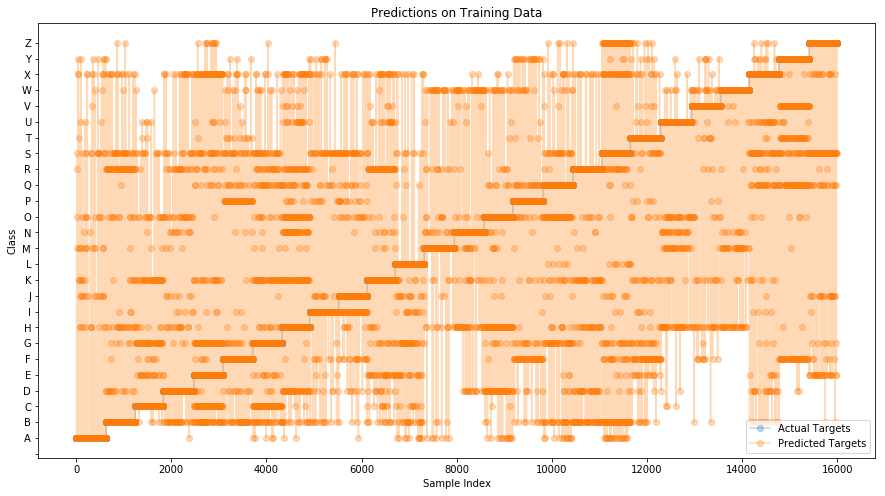

In [243]:
plt.figure(figsize=(15, 8))
plt.plot(np.hstack((Ttrain, Ytrain_LDA)), 'o-', alpha=0.3)
plt.yticks(np.arange(0, 27, step=1), [' ', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                      'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
                                      'U', 'V', 'W', 'X', 'Y', 'Z'])
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

#### 3.3.4. Plot results of Testing data

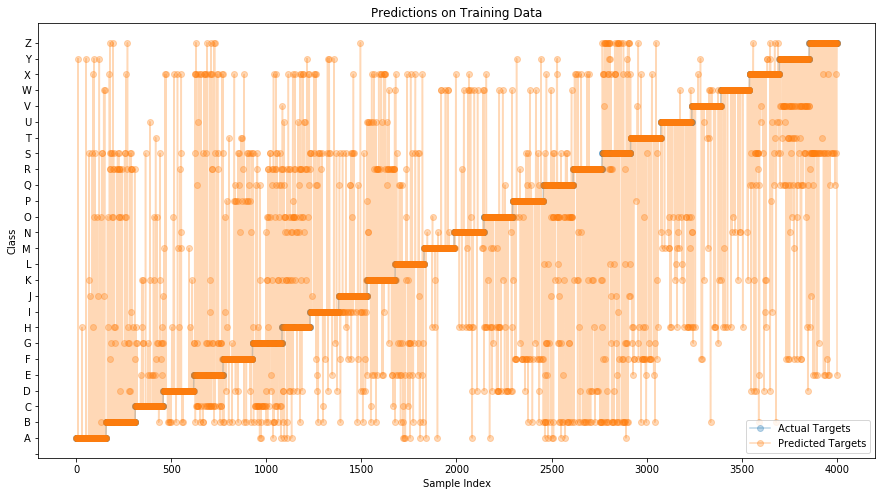

In [244]:
plt.figure(figsize=(15, 8))
plt.plot(np.hstack((Ttest, Ytest_LDA)), 'o-', alpha=0.3)
plt.yticks(np.arange(0, 27, step=1), [' ', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                      'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
                                      'U', 'V', 'W', 'X', 'Y', 'Z'])
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

#### 3.3.5. Confusion Matrix on Training Set

In [245]:
cm = confusionMatrix(Ttrain, Ytrain_LDA, np.unique(Ttrain).astype(int))

       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26
    ------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 | 85.7  0    0    0    0    0    0    1.6  0    2.1  1.0  0    1.9  0.3  1.4  0    0    0.2  2.2  0.2  0.5  0.2  0.3  1.4  1.1  0  
 2 |  0   73.9  0    2.4  0    0.2  0.8  2.9  0.5  0    0.8  0    0.2  0    1.8  0    0.2  9.3  4.2  0    0    0    0.2  2.3  0    0.3
 3 |  0    0.8 74.2  0    3.4  1.0  7.5  1.0  0    0    6.1  0    0.3  0.2  2.0  0    0    0.2  1.9  0.3  0.7  0    0.3  0    0    0  
 4 |  0.2  4.0  0   77.6  0    0    0.5  2.2  0.8  1.1  0    0    0.5  1.6  3.4  0    0    3.0  2.2  0    0    0    0    3.1  0    0  
 5 |  0    6.7 13.0  0.5 42.8  0.8 11.1  0.2  0.5  0    3.3  0    0    0    0.2  0    1.5  1.8  3.9  0.2  0.8  0    0   11.2  0    1.6
 6 |  0    5.5  0    1.8  0   

#### 3.3.6. Confusion Matrix on Test Set

In [246]:
cm = confusionMatrix(Ttest, Ytest_LDA, np.unique(Ttest).astype(int))

       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26
    ------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 | 86.1  0.6  0    0    0    0    0    1.3  0    1.9  0.6  0    0    0    1.9  0    0    0    3.2  0    0    0    1.3  0.6  2.5  0  
 2 |  0   65.4  0    2.0  0    0.7  3.3  3.3  0.7  0    0    0    0    0    5.2  0    0    9.8  6.5  0    0    0    0    1.3  0    2.0
 3 |  0    0.7 76.2  0    4.8  2.0  6.8  2.0  0    0    3.4  0    0    0    1.4  0    0    0    1.4  0.7  0.7  0    0    0    0    0  
 4 |  0    4.3  0   84.5  0    0    0    1.9  0    0.6  0.6  0    2.5  0.6  0.6  0    0    0.6  0.6  0    0    0    0    3.1  0    0  
 5 |  0    4.5 13.0  0   51.3  0.6  8.4  0    0.6  0    0.6  0    0    0    0    0    0.6  1.9  3.2  0    0.6  0    0   11.0  0    3.2
 6 |  0    4.5  0    2.6  0   

#### 3.3.7. Percentage Accuracy on Training and Testing set

In [247]:
print('{:s} {:}'.format('Accuracy of LDA on Training Data :',accuracy(Ytrain_LDA, Ttrain)))
print('{:s} {:}'.format('Accuracy of LDA on Test Data     :',accuracy(Ytest_LDA, Ttest)))

Accuracy of LDA on Training Data : 70.61507688461057
Accuracy of LDA on Test Data     : 70.31484257871064


<a id='Section34'> </a>
### 3.4. Non-Linear Logistic Regression

### 3.4.1. Neural Network - [10] 

#### 3.4.1.1. Train Neural Network

In [248]:
np.random.seed(28031994)
nn = NeuralNetworkClassifier(X.shape[1], [10], len(np.unique(T)))
nn.fit(Xtrain, Ttrain, 100, verbose=True)
print(nn)

scg: Iteration 10 fValue Eval 0.06308569593759616 Scale 3.2e-05
scg: Iteration 20 fValue Eval 0.043438123558490596 Scale 3.125e-08
scg: Iteration 30 fValue Eval 0.03775036172118496 Scale 3.0517578125e-11
scg: Iteration 40 fValue Eval 0.03536795353690979 Scale 2.980232238769531e-14
scg: Iteration 50 fValue Eval 0.034123880816330956 Scale 1e-15
scg: Iteration 60 fValue Eval 0.033068760742905226 Scale 1e-15
scg: Iteration 70 fValue Eval 0.03221321259618706 Scale 1e-15
scg: Iteration 80 fValue Eval 0.031404304583560506 Scale 1e-15
scg: Iteration 90 fValue Eval 0.030848374407094422 Scale 1e-15
scg: Iteration 100 fValue Eval 0.030342478944645073 Scale 1e-15
NeuralNetwork(16, [10], 26)
   Network was trained for 101 iterations that took 11.24990 seconds. Final error is 0.17419092670011568.


#### 3.4.1.2. Likelihood Plot

Text(0.5,1,'Likelihood Plot')

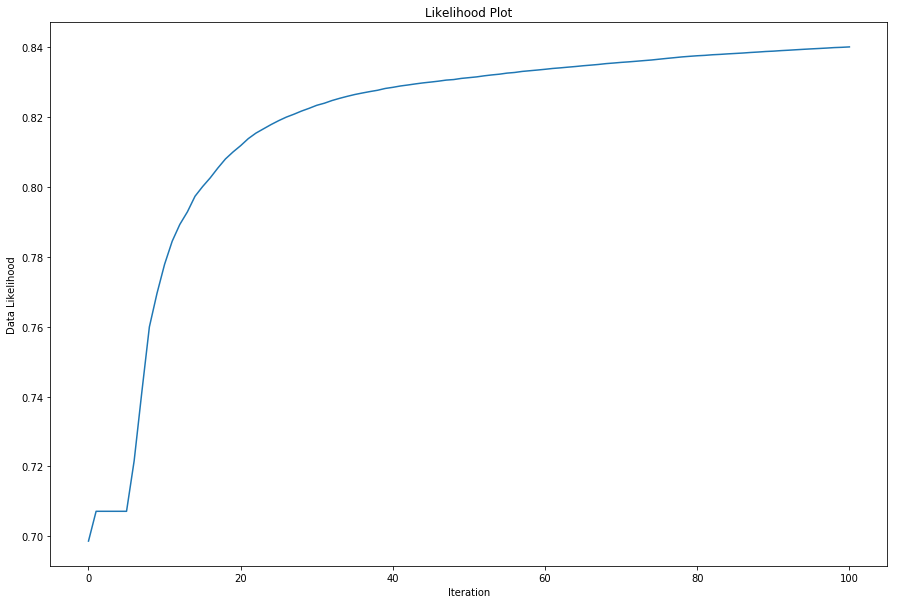

In [249]:
plt.figure(figsize=(15,10))
plt.plot(np.exp(-nn.getErrors()))    
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood')
plt.title('Likelihood Plot')

#### 3.4.1.3. Predictions on Training and Testing Data

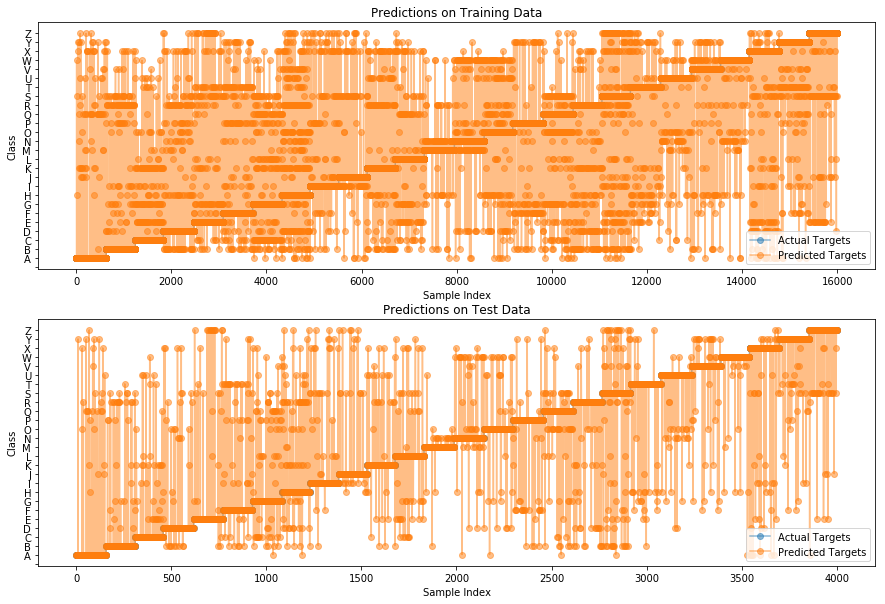

In [250]:
Ytrain_NL_10 = nn.predict(Xtrain) 
Ytest_NL_10 = nn.predict(Xtest)  

plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
plt.plot(np.hstack((Ttrain, Ytrain_NL_10)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.yticks(np.arange(0, 27, step=1), [' ', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                      'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
                                      'U', 'V', 'W', 'X', 'Y', 'Z'])
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

plt.subplot(2,1,2)
plt.plot(np.hstack((Ttest, Ytest_NL_10)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.yticks(np.arange(0, 27, step=1), [' ', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                      'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
                                      'U', 'V', 'W', 'X', 'Y', 'Z'])
plt.title('Predictions on Test Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

#### 3.4.1.4. Confusion Matrix

In [251]:
print ("Confusion Matrix for Training Samples")
cm = confusionMatrix(Ttrain, Ytrain_NL_10, np.unique(Ttrain).astype(int))

print ("\nConfusion Matrix for Testing Samples")
cm = confusionMatrix(Ttest, Ytest_NL_10, np.unique(Ttest).astype(int))

Confusion Matrix for Training Samples
       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26
    ------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 | 86.7  0.2  0    0    0    0    0    0.3  0    0.8  1.4  0    0.8  0.3  0.2  0    3.5  0.5  0.6  0    0.8  0.5  0.2  1.6  1.3  0.5
 2 |  0   80.1  0    1.1  0.7  0.7  1.6  0.5  1.5  0    0.2  0    0    0    0.3  2.0  0.3  6.5  2.9  0    0    0.5  0    1.1  0    0  
 3 |  0    0   73.9  0.3  5.9  0.2  5.4  0.8  1.5  0    6.3  0.7  0.5  0    1.5  0    0.2  0    0.2  0.8  1.0  0.2  0.5  0    0    0  
 4 |  0    4.8  0   77.0  0    0.2  0    2.8  0.3  0.3  0.2  0.2  0.9  1.4  1.2  2.0  0    4.0  1.4  0.2  0.5  0    0    2.0  0    0.6
 5 |  0    1.0  1.1  0   74.6  1.0  5.2  0.2  0.2  0    1.8  0.8  0    0    0    0    0.5  1.1  4.6  2.9  0    0    0    1.1  0

#### 3.4.1.5. Overall Percentage Accuracy

In [252]:
print('{:s} {:}'.format('Accuracy of NLR NN-[10] on Training Data :',accuracy(Ytrain_NL_10, Ttrain)))
print('{:s} {:}'.format('Accuracy of NLR NN-[10] on Test Data     :',accuracy(Ytest_NL_10, Ttest)))

Accuracy of NLR NN-[10] on Training Data : 77.67845980747593
Accuracy of NLR NN-[10] on Test Data     : 76.11194402798601


### 3.4.2. NeuralNetwork - [10, 10]

#### 3.4.2.1. Train Neural Network

In [253]:
np.random.seed(28031994)
nn = NeuralNetworkClassifier(X.shape[1], [10, 10], len(np.unique(T)))
nn.fit(Xtrain, Ttrain, 100, verbose=True)
print(nn)

scg: Iteration 10 fValue Eval 0.06351636260428324 Scale 2.6576430850676602e-05
scg: Iteration 20 fValue Eval 0.04743586404733631 Scale 2.595354575261387e-08
scg: Iteration 30 fValue Eval 0.040335678506946866 Scale 2.5345259524036982e-11
scg: Iteration 40 fValue Eval 0.03765823941567674 Scale 2.4751230003942365e-14
scg: Iteration 50 fValue Eval 0.03504320157893999 Scale 1e-15
scg: Iteration 60 fValue Eval 0.03355810794176556 Scale 1e-15
scg: Iteration 70 fValue Eval 0.03257993188288267 Scale 1e-15
scg: Iteration 80 fValue Eval 0.03194902296477914 Scale 1e-15
scg: Iteration 90 fValue Eval 0.03140198394886371 Scale 1e-15
scg: Iteration 100 fValue Eval 0.030884568246178058 Scale 1e-15
NeuralNetwork(16, [10, 10], 26)
   Network was trained for 101 iterations that took 13.98817 seconds. Final error is 0.17574005874068113.


#### 3.4.2.2. Likelihood Plot

Text(0.5,1,'Likelihood Plot')

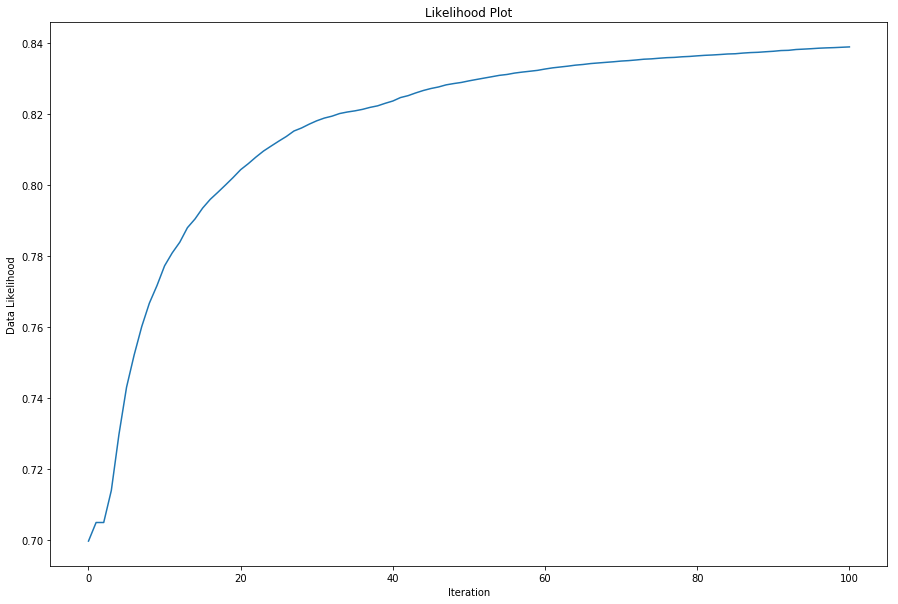

In [254]:
plt.figure(figsize=(15,10))
plt.plot(np.exp(-nn.getErrors())) 
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood')
plt.title('Likelihood Plot')

#### 3.4.2.3. Predictions on Training and Testing Sets

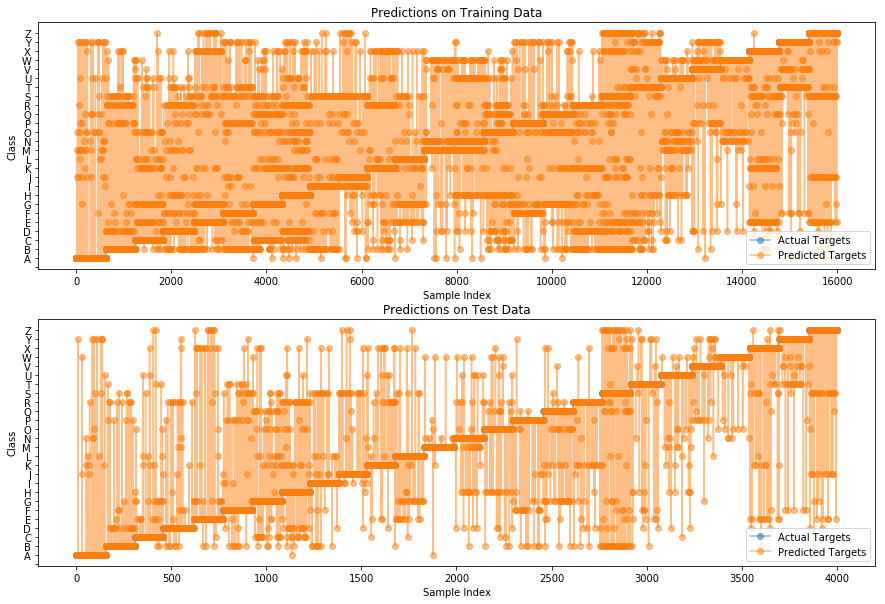

In [255]:
Ytrain_NL_10_10 = nn.predict(Xtrain)  
Ytest_NL_10_10 = nn.predict(Xtest)    

plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
plt.plot(np.hstack((Ttrain, Ytrain_NL_10_10)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.yticks(np.arange(0, 27, step=1), [' ', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                      'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
                                      'U', 'V', 'W', 'X', 'Y', 'Z'])
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

plt.subplot(2,1,2)
plt.plot(np.hstack((Ttest, Ytest_NL_10_10)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.yticks(np.arange(0, 27, step=1), [' ', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                      'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
                                      'U', 'V', 'W', 'X', 'Y', 'Z'])
plt.title('Predictions on Test Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

#### 3.4.2.4. Confusion Matrix

In [256]:
print ("Confusion Matrix for Training Samples")
cm = confusionMatrix(Ttrain, Ytrain_NL_10_10, np.unique(Ttrain).astype(int))

print ("\nConfusion Matrix for Testing Samples")
cm = confusionMatrix(Ttest, Ytest_NL_10_10, np.unique(Ttest).astype(int))

Confusion Matrix for Training Samples
       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26
    ------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 | 88.9  0    0    0    0    0.2  0.2  0    0.2  1.1  0.2  0.5  1.7  0.8  1.3  0.3  1.0  0.2  0.2  0    0.8  0    0    0.2  2.5  0  
 2 |  0   83.4  0    4.1  0.5  0.5  0.5  0.2  0    0    0    0    0    0    0.2  2.6  0    3.6  2.9  0.2  0    0.2  0.5  0.8  0    0  
 3 |  0    1.0 74.5  0.2  6.3  0    6.5  0.3  0    0    3.2  1.9  0.3  0    2.5  0    0    0    0.2  0.8  1.4  0.2  0.3  0.2  0    0.2
 4 |  0    5.1  0   76.9  0.3  2.3  0.2  2.0  0    0.8  0.2  0    1.6  0.5  0    0.9  0.5  5.4  0.9  1.4  0.6  0    0    0.5  0    0  
 5 |  0    2.6  1.0  0   70.2  0   10.3  0.5  0    0    1.1  0    0    0    0.3  0    1.3  0.8  2.4  1.0  0    0    0    5.7  0

#### 3.4.2.5. Overall Percentage Accuracy

In [257]:
print('{:s} {:}'.format('Accuracy of NLR NN-[10, 10] on Training Data :',accuracy(Ytrain_NL_10_10, Ttrain)))
print('{:s} {:}'.format('Accuracy of NLR NN-[10, 10] on Test Data     :',accuracy(Ytest_NL_10_10, Ttest)))

Accuracy of NLR NN-[10, 10] on Training Data : 76.734591823978
Accuracy of NLR NN-[10, 10] on Test Data     : 75.38730634682659


### 3.4.3. Multiple Network Structure

#### 3.4.3.1. Train & Evaluate Multiple Neural Network Structures

                   0          1          2
0                [2]  30.091261  30.434783
1                [5]  63.282910  62.393803
2               [10]  77.565946  76.036982
3               [20]  86.923365  84.832584
4               [25]  90.023753  87.506247
5               [50]  96.087011  91.479260
6             [2, 2]  26.465808  26.361819
7             [5, 5]  59.451181  58.645677
8           [10, 10]  72.077760  70.689655
9           [20, 20]  90.298787  87.556222
10          [25, 25]  93.536692  90.504748
11          [50, 50]  99.931241  93.078461
12         [2, 2, 2]  23.134142  23.238381
13         [5, 5, 5]  46.543318  45.702149
14      [10, 10, 10]  74.709339  73.763118
15      [20, 20, 20]  89.836230  87.281359
16      [25, 25, 25]  94.080510  89.980010
17      [50, 50, 50]  99.393674  94.052974
18      [2, 2, 2, 2]  22.727841  22.713643
19      [5, 5, 5, 5]  47.362170  46.376812
20  [10, 10, 10, 10]  72.371546  71.489255
21  [20, 20, 20, 20]  88.986123  85.932034
22  [25, 25

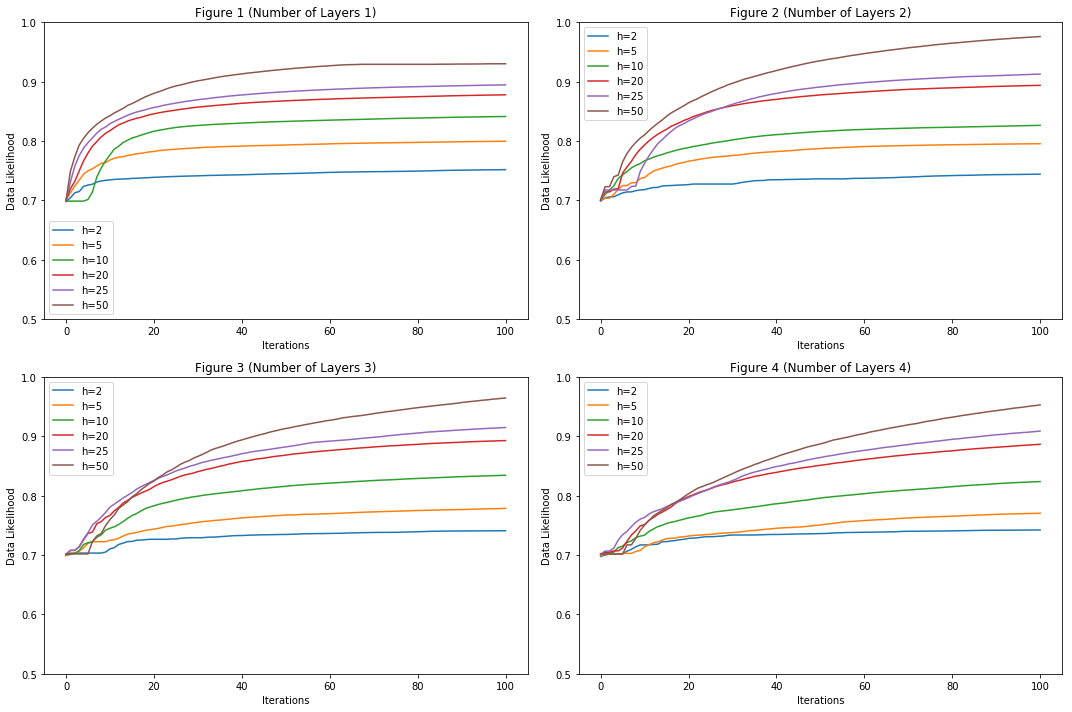

In [258]:
likelihoodList = []
accuracyList = []
dataF = []
np.random.seed(28031994)
plt.figure(figsize=(15,10))
for nHiddenLayers in [1,2,3,4]:
    plt.subplot(2,2,nHiddenLayers)
    for nHiddenUnits in [2, 5, 10, 20, 25, 50]:
        hiddenLayerStructure = [nHiddenUnits]*nHiddenLayers
        nn = NeuralNetworkClassifier(X.shape[1], hiddenLayerStructure, len(np.unique(T)))
        nn.fit(Xtrain, Ttrain, Iterations=100, verbose=False)
        Ytrain = nn.predict(Xtrain)
        Ytest = nn.predict(Xtest)
        plt.plot(np.exp(-nn.getErrors()), label='h='+str(nHiddenUnits))
        plt.ylim(0.5, 1.0) 
        plt.ylabel('Data Likelihood')
        plt.xlabel('Iterations')
        plt.legend(loc='best')
        
        accuracyTrain= np.sum(Ytrain == Ttrain)/ len(Ttrain) * 100
        accuracyTest= np.sum(Ytest == Ttest)/ len(Ttest) * 100
        accuracyList.append([hiddenLayerStructure,accuracyTrain,accuracyTest])
        
        likelihoodList.append(np.exp(-nn.getErrors()))
        
    plt.title('Figure {} (Number of Layers {})'.format(nHiddenLayers, nHiddenLayers))
    
plt.tight_layout()
dataF = pd.DataFrame(accuracyList)
print(dataF)

#### 3.4.3.2. Extracting Best Hidden Layer Structure for Train & Test Sets

In [259]:
bestStructureTrain = []
bestStructureTest = []

npArr = dataF.values                                                
maxIndicesTrain = np.where(npArr[:,1] == max(dataF[1]))[0].tolist() 
bestStructureTrain = dataF[0][maxIndicesTrain[:]].values.tolist()   

maxIndicesTest = np.where(npArr[:,2] == max(dataF[2]))[0].tolist()  
bestStructureTest = dataF[0][maxIndicesTest[:]].values.tolist()     

likelihoodArray = np.asarray(likelihoodList)       
maxLikelihood = (max(np.ravel(likelihoodArray)))   
print('Best Hidden Layer Structure for Training Data: {}'.format(bestStructureTrain))
print('Best Percentage Accuracy for Training Data   : {}'.format(max(dataF[1])))
print(" ")
print('Best Hidden Layer Structure for Testing Data : {}'.format(bestStructureTest))
print('Best Percentage Accuracy for Testing Data    : {}'.format(max(dataF[2])))
print(" ")
print('Maximum Likelihood: {:f}'.format(maxLikelihood))


Best Hidden Layer Structure for Training Data: [[50, 50]]
Best Percentage Accuracy for Training Data   : 99.93124140517564
 
Best Hidden Layer Structure for Testing Data : [[50, 50, 50]]
Best Percentage Accuracy for Testing Data    : 94.05297351324337
 
Maximum Likelihood: 0.976180


#### 3.4.3.3. Confusion Matrix for Best Hidden Layer Structture Identified on Training Samples

In [260]:
np.random.seed(28031994)
for hidden in bestStructureTrain:
    nn = NeuralNetworkClassifier(X.shape[1], hidden, len(np.unique(T)))
    nn.fit(Xtrain, Ttrain, 100)
    print(nn)
    Ytrain = nn.predict(Xtrain)  
    print ("\nConfusion Matrix with Best NN Structure identified on training samples")
    cm = confusionMatrix(Ttrain, Ytrain, np.unique(Ttrain).astype(int))
    print(" ")

NeuralNetwork(16, [50, 50], 26)
   Network was trained for 101 iterations that took 30.65046 seconds. Final error is 0.02930837063312446.

Confusion Matrix with Best NN Structure identified on training samples
       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26
    ------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 |100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
 2 |  0   99.3  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0.7  0    0    0    0  
 3 |  0    0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
 4 |  0    0    0   99.8  0    0    0    0    0    0    0    0    0    0    0.2  0    0   

#### 3.4.3.4. Confusion Matrix for Best Hidden Layer Structure Identified on Test Set

In [261]:
np.random.seed(28031994)
for hidden in bestStructureTest:
    nn = NeuralNetworkClassifier(X.shape[1], hidden, len(np.unique(T)))
    nn.fit(Xtrain, Ttrain, 100)
    print(nn)
    Ytest = nn.predict(Xtest)              
    print ("\nConfusion Matrix with Best NN Structure identified on test samples")
    cm = confusionMatrix(Ttest, Ytest, np.unique(Ttest).astype(int))
    print(" ")

NeuralNetwork(16, [50, 50, 50], 26)
   Network was trained for 101 iterations that took 42.13361 seconds. Final error is 0.02277610812085698.

Confusion Matrix with Best NN Structure identified on test samples
       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26
    ------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 | 92.4  0.6  0    0    0    0    0    0.6  0    0    1.3  0.6  0.6  0    0.6  0    0    0    0    0    0.6  0    1.3  0.6  0.6  0  
 2 |  0   89.5  0    2.0  1.3  0    0.7  0    0    0    0    0    0    0    0    0.7  0.7  2.6  0    0    0    2.0  0    0    0    0.7
 3 |  0    0   98.0  0    0    0    0.7  0    0    0    0    0    0    0    0.7  0    0    0    0    0    0    0.7  0    0    0    0  
 4 |  0    0    0   94.4  0    0.6  0    0.6  0    0    0    0    0.6  0    1.2  0    0   

<a id='Section35'> </a>
### 3.5. Linear Logistic Regression

#### 3.5.1 Train Neural Network (NN-[0])

In [262]:
np.random.seed(28031994)
nn = NeuralNetworkClassifier(X.shape[1], 0, len(np.unique(T)))

#### 3.5.2. Likelihood Plot

scg: Iteration 10 fValue Eval 0.03511660776381925 Scale 1.953125e-09
scg: Iteration 20 fValue Eval 0.032194182979945474 Scale 1.9073486328125e-12
scg: Iteration 30 fValue Eval 0.031764260017094585 Scale 1.862645149230957e-15
scg: Iteration 40 fValue Eval 0.03166920802077559 Scale 1e-15
scg: Iteration 50 fValue Eval 0.03164376817336359 Scale 4e-15
scg: Iteration 60 fValue Eval 0.03164271085359601 Scale 2.62144e-10
scg: Iteration 70 fValue Eval 0.031641885172645275 Scale 0.000274877906944
scg: Iteration 80 fValue Eval 0.03163893443786751 Scale 0.004398046511104
scg: Iteration 90 fValue Eval 0.03163892302799681 Scale 18.014398509481985
scg: Iteration 100 fValue Eval 0.031638923027269186 Scale 18889465.931478582


Text(0.5,1,'Likelihood Plot for 100 Iterations')

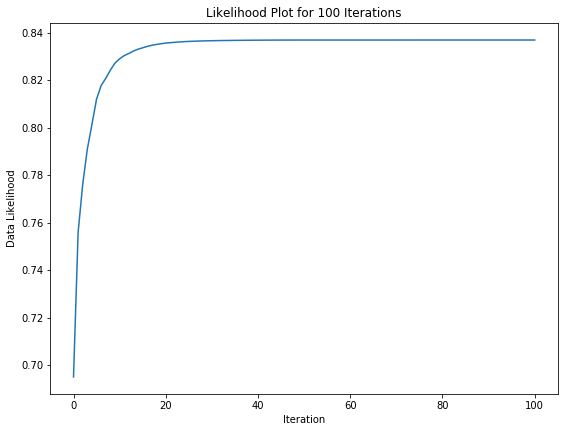

In [263]:
plt.figure(figsize=(20,15))

nn.fit(Xtrain, Ttrain, 100, verbose=True)
plt.subplot(2, 2, 1)
plt.plot(np.exp(-nn.getErrors())) 
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood')
plt.title('Likelihood Plot for 100 Iterations')

#### 3.5.3 Predictions on Train & Test Samples

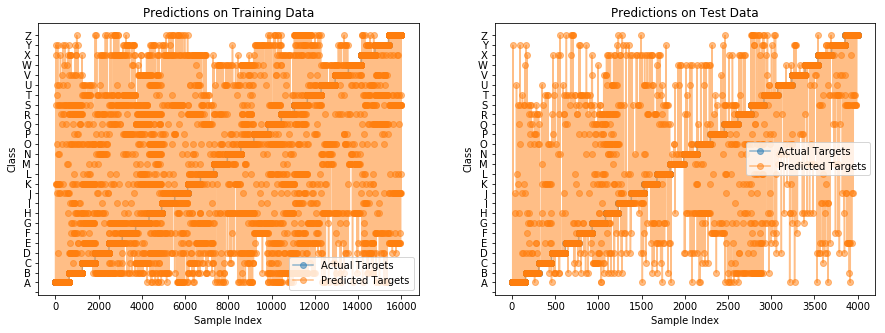

In [264]:
Ytrain_LR = nn.predict(Xtrain)  
Ytest_LR = nn.predict(Xtest)    

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(np.hstack((Ttrain, Ytrain_LR)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.yticks(np.arange(0, 27, step=1), [' ', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                      'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
                                      'U', 'V', 'W', 'X', 'Y', 'Z'])
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

plt.subplot(1, 2 ,2)
plt.plot(np.hstack((Ttest, Ytest_LR)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.yticks(np.arange(0, 27, step=1), [' ', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                      'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
                                      'U', 'V', 'W', 'X', 'Y', 'Z'])
plt.title('Predictions on Test Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='right')

#### 3.5.4. Confusion Matrix for Linear Logistic Regression Models

In [265]:
print ("Confusion Matrix for Training Samples")
cm = confusionMatrix(Ttrain, Ytrain_LR, np.unique(Ttrain).astype(int))

print ("\nConfusion Matrix for Testing Samples")
cm = confusionMatrix(Ttest, Ytest_LR, np.unique(Ttest).astype(int))

Confusion Matrix for Training Samples
       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26
    ------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 | 90.5  0    0    0.2  0    0    0    0.2  0    1.1  1.6  0    0.3  0.3  0.5  0    0.3  0.5  1.9  0.2  0.6  0.3  0.3  0.5  0.8  0  
 2 |  0   76.2  0.3  2.4  0.5  1.1  1.0  1.3  1.6  0.2  0.7  0.2  0    0    1.6  0.5  0.7  4.2  4.9  0    0    1.0  0    1.1  0.3  0.2
 3 |  0    0.2 75.0  0.3  4.2  0.3  4.9  1.2  0    0    6.5  0.7  0.3  0    2.0  0    0.5  0    0.3  1.9  1.5  0    0    0    0    0  
 4 |  0    4.3  0   82.3  0    0.2  0.2  1.4  0.2  0.8  0.8  0    0.2  2.3  1.7  0.6  0.2  1.9  0    1.2  0.2  0    0    1.1  0    0.6
 5 |  0    3.1  1.0  0   78.0  1.1  4.6  0    0.2  0    0.7  0.3  0    0    0    0    1.8  1.0  3.1  1.5  0.2  0    0    2.1  0

#### 3.5.5 Overall Percentage Accuracy

In [266]:
print('{:s} {:}'.format('Accuracy of Linear LR on Training Data :',accuracy(Ytrain_LR, Ttrain)))
print('{:s} {:}'.format('Accuracy of Linear LR on Test Data     :',accuracy(Ytest_LR, Ttest)))

Accuracy of Linear LR on Training Data : 78.18477309663709
Accuracy of Linear LR on Test Data     : 77.23638180909546


<a id='Section36'> </a>
### 3.6. K-Nearest Neighbors Classification

### 3.6.1 K = 1

#### 3.6.1.1. Instantiate and Train KNN Model with K = 1

In [267]:
np.random.seed(28031994)
knn = KNeighborsClassifier(n_neighbors=1) 
print (knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [268]:
#standardizing
Xtrain_mean = Xtrain.mean(axis=0)
Xtrain_std = Xtrain.std(axis=0)
Xtrain_standardized = (Xtrain - Xtrain_mean)/Xtrain_std
a = isnan(Xtrain_standardized)
Xtrain_standardized[a] = 0.000000001

Xtest_standardized = (Xtest - Xtrain_mean)/Xtrain_std
a = isnan(Xtest_standardized)
Xtest_standardized[a] = 0.000000001

knn.fit(Xtrain_standardized, Ttrain.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### 3.6.1.2. Use KNN-1 Model

In [269]:
Ytrain_KNN = knn.predict(Xtrain_standardized)
Ytest_KNN = knn.predict(Xtest_standardized)

#### 3.6.1.3 Plot Predictions on Training and Testing Samples

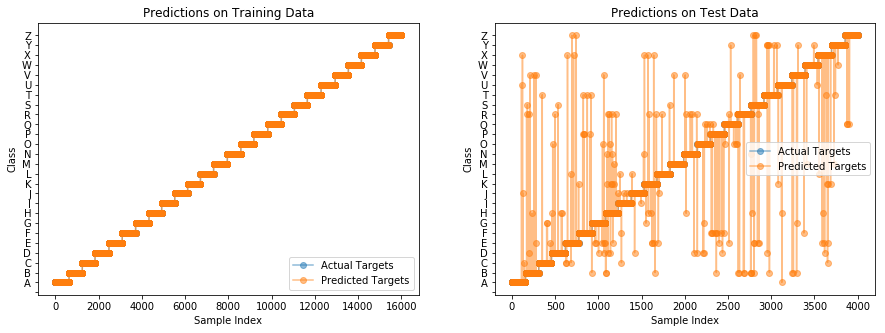

In [270]:
Ytrain_KNN = Ytrain_KNN.reshape(-1,1)
Ytest_KNN = Ytest_KNN.reshape(-1,1)

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(np.hstack((Ttrain, Ytrain_KNN)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.yticks(np.arange(0, 27, step=1), [' ', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                      'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
                                      'U', 'V', 'W', 'X', 'Y', 'Z'])
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

plt.subplot(1, 2 ,2)
plt.plot(np.hstack((Ttest, Ytest_KNN)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.yticks(np.arange(0, 27, step=1), [' ', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                      'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
                                      'U', 'V', 'W', 'X', 'Y', 'Z'])
plt.title('Predictions on Test Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='right')

#### 3.6.1.4. Confusion Matrix

In [271]:
print ("Confusion Matrix for Training Samples")
cm = confusionMatrix(Ttrain, Ytrain_KNN, np.unique(Ttrain).astype(int))

print ("\nConfusion Matrix for Testing Samples")
cm = confusionMatrix(Ttest, Ytest_KNN, np.unique(Ttest).astype(int))

Confusion Matrix for Training Samples
       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26
    ------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 |100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
 2 |  0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
 3 |  0    0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
 4 |  0    0    0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
 5 |  0    0    0    0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0

#### 3.6.1.5. Percentage Accuracy for KNN (K = 1)

In [272]:
print('{:s} {:}'.format('Accuracy of KNN-1 on Training Data :',accuracy(Ytrain_KNN, Ttrain)))
print('{:s} {:}'.format('Accuracy of KNN-1 on Test Data     :',accuracy(Ytest_KNN, Ttest)))

Accuracy of KNN-1 on Training Data : 100.0
Accuracy of KNN-1 on Test Data     : 95.40229885057471


### 3.6.2. KNN = 5

#### 3.6.2.1. Instantiate & Train KNN model with K = 5

In [273]:
np.random.seed(28031994)
knn = KNeighborsClassifier(n_neighbors=5)   
knn.fit(Xtrain_standardized,Ttrain.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### 3.6.2.2. Use KNN-5 Model

In [274]:
Ytrain_KNN5 = knn.predict(Xtrain_standardized)
Ytest_KNN5 = knn.predict(Xtest_standardized)

#### 3.6.2.3. Plot Predictions on Training and Test Data

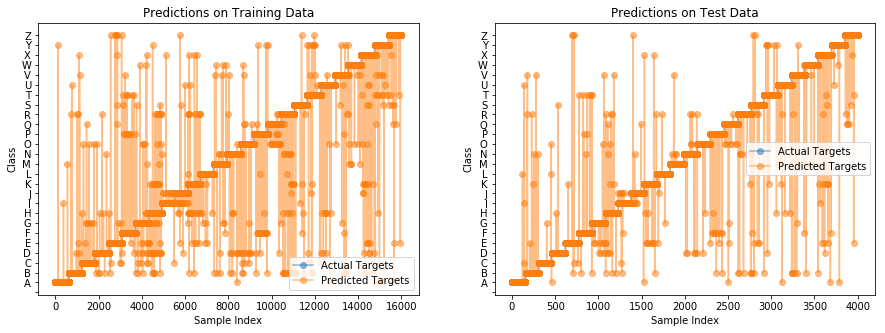

In [275]:
Ytrain_KNN5 = Ytrain_KNN5.reshape(-1,1)
Ytest_KNN5 = Ytest_KNN5.reshape(-1,1)

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(np.hstack((Ttrain, Ytrain_KNN5)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.yticks(np.arange(0, 27, step=1), [' ', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                      'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
                                      'U', 'V', 'W', 'X', 'Y', 'Z'])
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

plt.subplot(1, 2 ,2)
plt.plot(np.hstack((Ttest, Ytest_KNN5)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.yticks(np.arange(0, 27, step=1), [' ', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                      'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
                                      'U', 'V', 'W', 'X', 'Y', 'Z'])
plt.title('Predictions on Test Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='right')

#### 3.6.2.4. Overall Percentage Accuracy

In [276]:
print('{:s} {:}'.format('Accuracy of KNN-5 on Training Data :',accuracy(Ytrain_KNN5, Ttrain)))
print('{:s} {:}'.format('Accuracy of KNN-5 on Test Data     :',accuracy(Ytest_KNN5, Ttest)))

Accuracy of KNN-5 on Training Data : 97.0246280785098
Accuracy of KNN-5 on Test Data     : 94.52773613193403


### 3.6.3. Multiple Values of K

#### 3.6.3.1. Train & Evalue KNN with Multiple values of K

In [277]:
testAccuracy = []
trainAccuracy = []
np.random.seed(28031994)
for k in range (1,21):
    print('{:s} {:d}'.format("KNN with K = ", k))
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(Xtrain_standardized,Ttrain.ravel())
    
    Ytrain_KNNK = knn.predict(Xtrain_standardized)
    Ytest_KNNK = knn.predict(Xtest_standardized)
    print('{:s} {:}'.format('Accuracy of Training Data :',accuracy(Ytrain_KNNK, Ttrain)))
    print('{:s} {:}'.format('Accuracy of Test Data     :',accuracy(Ytest_KNNK, Ttest)))
    print(" ")
    testAccuracy.append(accuracy(Ytest_KNNK, Ttest))
    trainAccuracy.append(accuracy(Ytrain_KNNK, Ttrain))

KNN with K =  1
Accuracy of Training Data : 100.0
Accuracy of Test Data     : 95.40229885057471
 
KNN with K =  2
Accuracy of Training Data : 97.53094136767095
Accuracy of Test Data     : 93.87806096951525
 
KNN with K =  3
Accuracy of Training Data : 97.75596949618702
Accuracy of Test Data     : 94.85257371314343
 
KNN with K =  4
Accuracy of Training Data : 97.26215776972121
Accuracy of Test Data     : 94.60269865067467
 
KNN with K =  5
Accuracy of Training Data : 97.0246280785098
Accuracy of Test Data     : 94.52773613193403
 
KNN with K =  6
Accuracy of Training Data : 96.71833979247407
Accuracy of Test Data     : 94.40279860069965
 
KNN with K =  7
Accuracy of Training Data : 96.36829603700463
Accuracy of Test Data     : 94.15292353823088
 
KNN with K =  8
Accuracy of Training Data : 96.24328041005126
Accuracy of Test Data     : 94.07796101949025
 
KNN with K =  9
Accuracy of Training Data : 95.94949368671084
Accuracy of Test Data     : 93.90304847576212
 
KNN with K =  10
Accura

#### 3.6.3.2. Plot Prediction accuracy on training and testing data

Text(0.5,1,'Train Accuracy Vs K values')

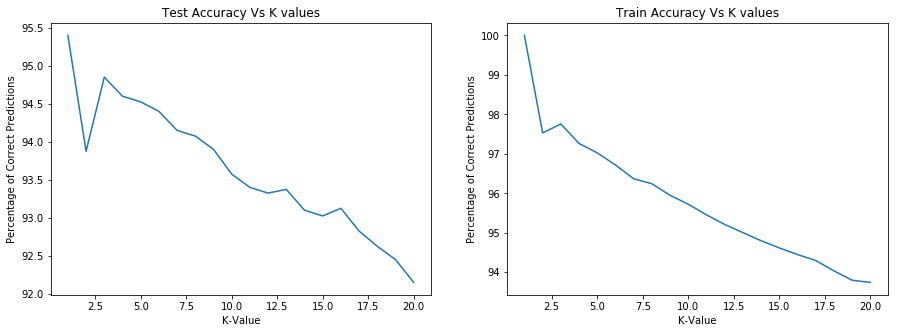

In [278]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(range(1,21), testAccuracy)
plt.xlabel('K-Value')
plt.ylabel('Percentage of Correct Predictions')
plt.title('Test Accuracy Vs K values')

plt.subplot(1,2,2)
plt.plot(range(1,21), trainAccuracy)
plt.xlabel('K-Value')
plt.ylabel('Percentage of Correct Predictions')
plt.title('Train Accuracy Vs K values')

<a id='Section37'></a>
### 3.7. Results Summary

|Algorithms|% Accuracy on Training Data|% Accuracy on Test Data|
|---------|-----|-----|
|QDA|89.97|88.71|
|LDA|70.62|70.31|
|NLLR - [10]|77.68|76.11|
|NLLR - [10, 10]|76.73|75.39|
|NLLR - [50, 50]|99.93|93.08|
|NLLR - [50, 50, 50]|99.39|94.05|
|LLR|78.18|77.24|
|KNN (K=1)|100.0|95.40|
|KNN (K=5)|97.02|94.53|
|KNN (K=10)|95.72|93.58|
|KNN (K=15)|94.62|93.03|
|KNN (K = 20)|93.74|92.15|

<a id=Section4></a>
## 4. Amazon Commerce reviews

<a id='Section41'></a>
### 4.1. Data

The [Amazon Commerce reviews](https://archive.ics.uci.edu/ml/datasets/Amazon+Commerce+reviews+set) data is available in UCI Machine Learning Repository.

#### 4.1.1. Data Loading

In [279]:
df = LoadAmazonData('Amazon_initial_50_30_10000.arff') 

Unique Classes in the given data set: ['Agresti' 'Ashbacher' 'Auken' 'Blankenship' 'Brody' 'Brown' 'Bukowsky'
 'CFH' 'Calvinnme' 'Chachra' 'Chandler' 'Chell' 'Cholette' 'Comdet' 'Corn'
 'Cutey' 'Davisson' 'Dent' 'Engineer' 'Goonan' 'Grove' 'Harp' 'Hayes'
 'Janson' 'Johnson' 'Koenig' 'Kolln' 'Lawyeraau' 'Lee' 'Lovitt'
 'Mahlers2nd' 'Mark' 'McKee' 'Merritt' 'Messick' 'Mitchell' 'Morrison'
 'Neal' 'Nigam' 'Peterson' 'Power' 'Riley' 'Robert' 'Shea' 'Sherwin'
 'Taylor' 'Vernon' 'Vision' 'Walters' 'Wilson']


In [280]:
df.head()

the  and    a   of   to   is    I   in  that   it       ...        ra_  \
0   5.0  3.0  4.0  4.0  1.0  5.0  1.0  3.0   2.0  4.0       ...        0.0   
1  12.0  3.0  6.0  2.0  3.0  4.0  2.0  0.0   1.0  3.0       ...        0.0   
2   3.0  2.0  2.0  4.0  4.0  2.0  2.0  2.0   3.0  1.0       ...        0.0   
3  18.0  4.0  6.0  5.0  4.0  2.0  1.0  0.0   4.0  3.0       ...        0.0   
4  13.0  4.0  7.0  5.0  4.0  5.0  0.0  1.0   0.0  4.0       ...        0.0   

   le_to  bra  uch_a  ave_a  n_in_  ied_  nd_b  rso  classification  
0    0.0  0.0    1.0    0.0    1.0   0.0   0.0  0.0               1  
1    0.0  5.0    0.0    1.0    0.0   0.0   0.0  0.0               1  
2    0.0  6.0    0.0    0.0    0.0   0.0   1.0  0.0               1  
3    0.0  0.0    0.0    0.0    0.0   0.0   0.0  0.0               1  
4    0.0  1.0    0.0    0.0    1.0   1.0   0.0  0.0               1  

[5 rows x 10001 columns]

#### 4.1.2. Data Distribution Plot

Text(0.5,1,'Data Distribution')

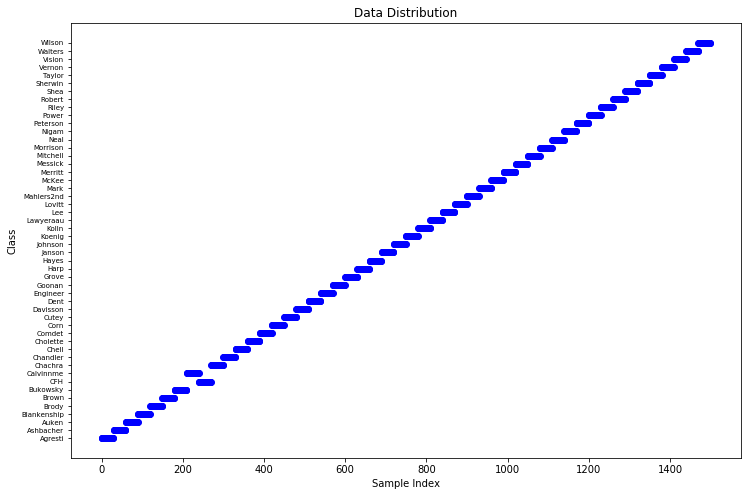

In [281]:
plt.figure(figsize=(12,8))
plt.plot(df.values[0:1500,-1], 'bo')
plt.yticks(np.arange(1, 51, step=1), ['Agresti', 'Ashbacher', 'Auken', 'Blankenship', 'Brody', 'Brown', 'Bukowsky',
                                     'CFH', 'Calvinnme', 'Chachra', 'Chandler', 'Chell', 'Cholette', 'Comdet', 'Corn',
                                     'Cutey', 'Davisson', 'Dent', 'Engineer', 'Goonan', 'Grove', 'Harp', 'Hayes',
                                     'Janson', 'Johnson', 'Koenig', 'Kolln', 'Lawyeraau', 'Lee', 'Lovitt',
                                     'Mahlers2nd', 'Mark', 'McKee', 'Merritt', 'Messick', 'Mitchell', 'Morrison',
                                     'Neal', 'Nigam', 'Peterson', 'Power', 'Riley', 'Robert', 'Shea', 'Sherwin',
                                     'Taylor', 'Vernon', 'Vision', 'Walters', 'Wilson'])
plt.ylabel("Class")
plt.tick_params(axis='y', labelsize=7)
plt.xlabel("Sample Index")
plt.title('Data Distribution')

#### 4.1.3. Dividing data into Input and Target

In [282]:
data= np.array(df.values)
X = data[:,0:10000]      
T = data[:,-1].reshape(-1,1)

In [283]:
#calculating pearson correlation coefficient between each feature and the labels
#to select important features as there are 10,000 total features
correlations = []
for i in range(X.shape[1]):
    correlations.append(np.corrcoef(X[0:len(X), i], T, rowvar = False)[1,0])

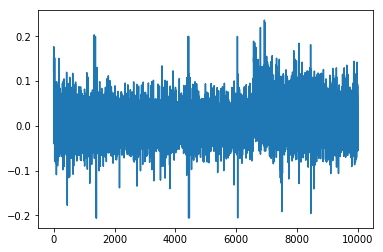

In [284]:
plt.plot(correlations)

In [285]:
correlations= np.array(correlations)
significant = np.where(np.absolute(correlations) > 0.05 )
X = X[:, significant[0]]

#### 4.1.4. Data Partitioning

In [286]:
np.random.seed(28031994)
Xtrain, Ttrain, Xtest, Ttest = partition(X, T, 0.8, classification=True, shuffle=True)

<a id='Section42'> </a>
### 4.2. Quadratic Discriminant Analysis (QDA)

#### 4.2.1. Train QDA model

In [287]:
qda = QDA()
qda.fit(Xtrain, Ttrain)

#### 4.2.2. Predict QDA model

In [288]:
Ytrain_QDA, TrainProbability, _ = qda.predict(Xtrain, allOutputs=True)  
Ytest_QDA, TestProbability,_= qda.predict(Xtest, allOutputs=True)       

#### 4.2.3. Plot results of Training data

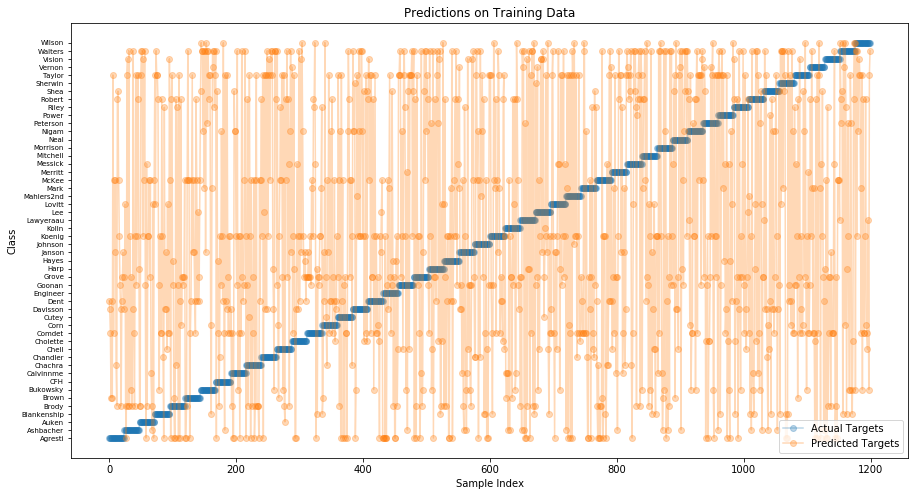

In [289]:
plt.figure(figsize=(15, 8))
plt.plot(np.hstack((Ttrain, Ytrain_QDA)), 'o-', alpha=0.3)

plt.xlabel('Sample Index')
plt.yticks(np.arange(1, 51, step=1), ['Agresti', 'Ashbacher', 'Auken', 'Blankenship', 'Brody', 'Brown', 'Bukowsky',
                                     'CFH', 'Calvinnme', 'Chachra', 'Chandler', 'Chell', 'Cholette', 'Comdet', 'Corn',
                                     'Cutey', 'Davisson', 'Dent', 'Engineer', 'Goonan', 'Grove', 'Harp', 'Hayes',
                                     'Janson', 'Johnson', 'Koenig', 'Kolln', 'Lawyeraau', 'Lee', 'Lovitt',
                                     'Mahlers2nd', 'Mark', 'McKee', 'Merritt', 'Messick', 'Mitchell', 'Morrison',
                                     'Neal', 'Nigam', 'Peterson', 'Power', 'Riley', 'Robert', 'Shea', 'Sherwin',
                                     'Taylor', 'Vernon', 'Vision', 'Walters', 'Wilson'])
plt.ylabel("Class")
plt.tick_params(axis='y', labelsize=7)
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

#### 4.2.4 Plot results of Testing data

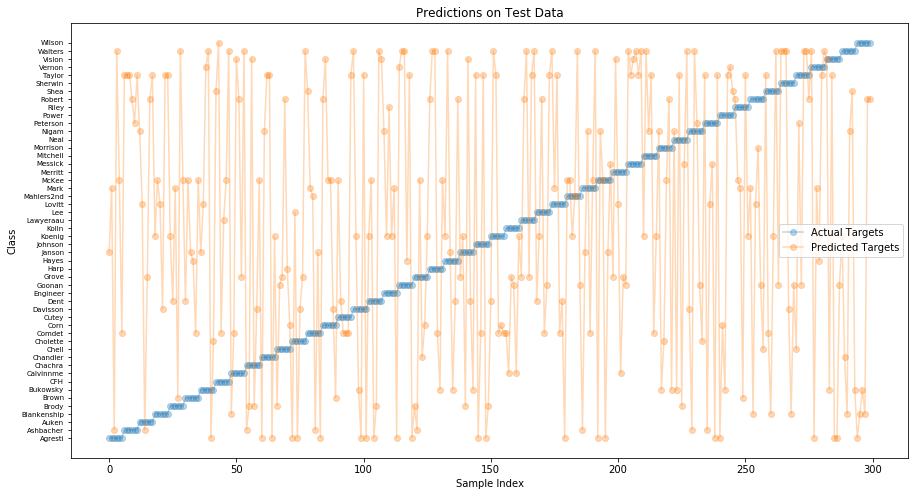

In [290]:
plt.figure(figsize=(15, 8))
plt.plot(np.hstack((Ttest, Ytest_QDA)), 'o-', alpha=0.3)
plt.xlabel('Sample Index')
plt.yticks(np.arange(1, 51, step=1), ['Agresti', 'Ashbacher', 'Auken', 'Blankenship', 'Brody', 'Brown', 'Bukowsky',
                                     'CFH', 'Calvinnme', 'Chachra', 'Chandler', 'Chell', 'Cholette', 'Comdet', 'Corn',
                                     'Cutey', 'Davisson', 'Dent', 'Engineer', 'Goonan', 'Grove', 'Harp', 'Hayes',
                                     'Janson', 'Johnson', 'Koenig', 'Kolln', 'Lawyeraau', 'Lee', 'Lovitt',
                                     'Mahlers2nd', 'Mark', 'McKee', 'Merritt', 'Messick', 'Mitchell', 'Morrison',
                                     'Neal', 'Nigam', 'Peterson', 'Power', 'Riley', 'Robert', 'Shea', 'Sherwin',
                                     'Taylor', 'Vernon', 'Vision', 'Walters', 'Wilson'])
plt.ylabel("Class")
plt.tick_params(axis='y', labelsize=7)
plt.title('Predictions on Test Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='right')

#### 4.2.5. Confusion Matrix for Training Set

In [291]:
cm = confusionMatrix(Ttrain, Ytrain_QDA, np.unique(Ttrain).astype(int))

       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50
    ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 |  0    0    0    0    8.3  8.3  0    0    0    4.2  0    0    0    8.3  0    0    8.3 12.5  0    4.2  8.3  0    0    8.3  0    4.2  0    0    0    0    0    0   12.5  0    0    0    0    0    0    0    0    0    4.2  4.2  0    4.2  0    0    0    0  
 2 |  4.2  0    0    0   20.8  0    4.2  0    0    0    0    0    0    4.2  0    0    8.3  0    0    4.2  4.2  4.2  0    0    0   12.5  0    0    0    4.2  0    0    0    0    0    0    

47 | 12.5  4.2  0    0    0    0    0    0    0    0    0    0    4.2 12.5  0    0    0    4.2  0    4.2  4.2  0    0    0    0    8.3  0    0    0    0    0   12.5  0    0    4.2  0    0    0    0    0    0    0    8.3  4.2  0    8.3  0    0    4.2  4.2
48 | 16.7  0    0    0   12.5  0    0    0    0    0    0    0    0   16.7  0    0    0    0    0    0   12.5  4.2  0    4.2  0    0    0    4.2  0    0    0    0   16.7  0    4.2  0    0    0    0    0    0    4.2  0    0    0    0    0    0    4.2  0  
49 |  0    0    0   12.5  0    0   12.5  0    0    0    0    0    4.2  0    4.2  0    0    0    0    0    0    4.2  0    0    0    4.2  0    0    0    0    0    0    0    0    0    0    0    0    0   12.5  0    4.2  8.3  4.2  0    4.2  4.2  0    0   20.8
50 |  0    0    0    0    0    0   12.5  0    0    0    0    4.2  0   16.7  4.2  0    0    0    0    0    0    0    0    0    0    8.3  0    4.2  0    0    0    4.2  0    0    0    0    0    0    4.2  0    0    0    8.3  0    0   16.7 

#### 4.2.6. Confusion Matrix for Test Set

In [292]:
cm = confusionMatrix(Ttest, Ytest_QDA, np.unique(Ttest).astype(int))

       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50
    ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 |  0   16.7  0    0    0    0    0    0    0    0    0    0    0   16.7  0    0    0    0    0    0    0    0    0   16.7  0    0    0    0    0    0    0   16.7 16.7  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   16.7  0  
 2 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    

35 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   33.3  0   16.7 50.0  0  
36 |  0    0    0    0    0    0    0    0    0    0    0    0    0   16.7  0    0    0    0    0    0    0    0    0    0    0   33.3  0    0    0    0    0    0    0    0    0    0    0    0   16.7  0    0    0    0    0    0   16.7  0    0   16.7  0  
37 |  0    0    0    0    0    0   33.3  0    0    0    0    0   16.7  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   16.7  0    0    0    0    0   16.7  0    0    0   16.7  0    0    0    0    0    0    0  
38 |  0    0    0    0   16.7  0   16.7  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   16.7  0    0    0   16.7  0    0    0    0    0    0   16.7 

#### 4.2.7 Percentage Accuracy On Training and Testing Data

In [293]:
print('{:s} {:}'.format('Accuracy of QDA on Training Data :',accuracy(Ytrain_QDA, Ttrain)))
print('{:s} {:}'.format('Accuracy of QDA on Test Data :',accuracy(Ytest_QDA, Ttest)))

Accuracy of QDA on Training Data : 0.0
Accuracy of QDA on Test Data : 1.0


<a id='Section43'> </a>
### 4.3. Linear Discriminant Analysis (LDA)

#### 4.3.1. Train LDA model

In [294]:
lda = LDA()            
lda.fit(Xtrain, Ttrain)

#### 4.3.2. Predict LDA model

In [295]:
Ytrain_LDA, TrainProbability, _ = lda.predict(Xtrain, allOutputs=True)  
Ytest_LDA, TestProbability,_= lda.predict(Xtest, allOutputs=True)       

#### 4.3.3. Plot results of Training data

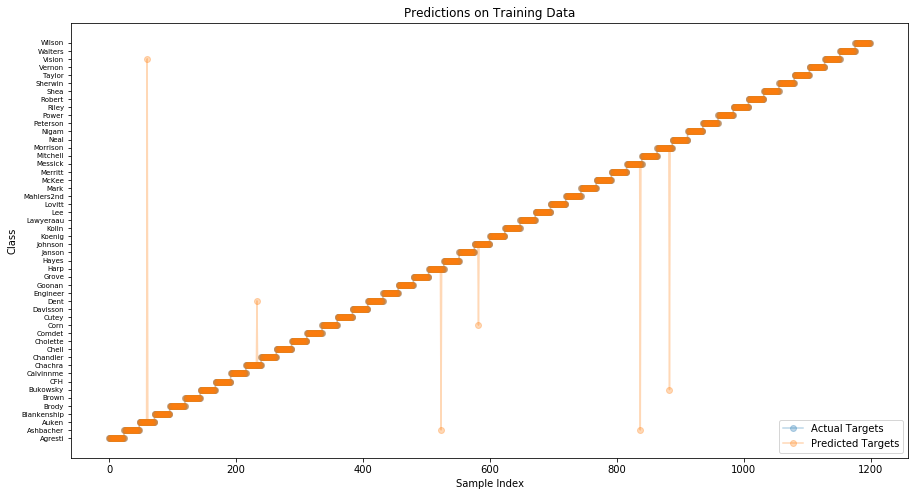

In [296]:
plt.figure(figsize=(15, 8))
plt.plot(np.hstack((Ttrain, Ytrain_LDA)), 'o-', alpha=0.3)
plt.xlabel('Sample Index')
plt.yticks(np.arange(1, 51, step=1), ['Agresti', 'Ashbacher', 'Auken', 'Blankenship', 'Brody', 'Brown', 'Bukowsky',
                                     'CFH', 'Calvinnme', 'Chachra', 'Chandler', 'Chell', 'Cholette', 'Comdet', 'Corn',
                                     'Cutey', 'Davisson', 'Dent', 'Engineer', 'Goonan', 'Grove', 'Harp', 'Hayes',
                                     'Janson', 'Johnson', 'Koenig', 'Kolln', 'Lawyeraau', 'Lee', 'Lovitt',
                                     'Mahlers2nd', 'Mark', 'McKee', 'Merritt', 'Messick', 'Mitchell', 'Morrison',
                                     'Neal', 'Nigam', 'Peterson', 'Power', 'Riley', 'Robert', 'Shea', 'Sherwin',
                                     'Taylor', 'Vernon', 'Vision', 'Walters', 'Wilson'])
plt.ylabel("Class")
plt.tick_params(axis='y', labelsize=7)
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

#### 4.3.4. Plot results of Testing data

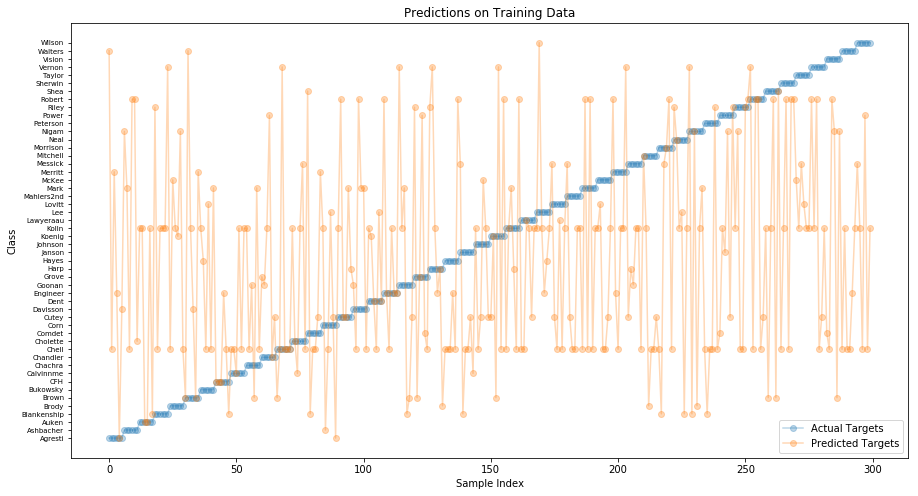

In [297]:
plt.figure(figsize=(15, 8))
plt.plot(np.hstack((Ttest, Ytest_LDA)), 'o-', alpha=0.3)
plt.xlabel('Sample Index')
plt.yticks(np.arange(1, 51, step=1), ['Agresti', 'Ashbacher', 'Auken', 'Blankenship', 'Brody', 'Brown', 'Bukowsky',
                                     'CFH', 'Calvinnme', 'Chachra', 'Chandler', 'Chell', 'Cholette', 'Comdet', 'Corn',
                                     'Cutey', 'Davisson', 'Dent', 'Engineer', 'Goonan', 'Grove', 'Harp', 'Hayes',
                                     'Janson', 'Johnson', 'Koenig', 'Kolln', 'Lawyeraau', 'Lee', 'Lovitt',
                                     'Mahlers2nd', 'Mark', 'McKee', 'Merritt', 'Messick', 'Mitchell', 'Morrison',
                                     'Neal', 'Nigam', 'Peterson', 'Power', 'Riley', 'Robert', 'Shea', 'Sherwin',
                                     'Taylor', 'Vernon', 'Vision', 'Walters', 'Wilson'])
plt.ylabel("Class")
plt.tick_params(axis='y', labelsize=7)
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

#### 4.3.5. Confusion Matrix on Training Set

In [298]:
cm = confusionMatrix(Ttrain, Ytrain_LDA, np.unique(Ttrain).astype(int))

       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50
    ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 |100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
 2 |  0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    

42 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0    0    0    0    0    0  
43 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0    0    0    0    0  
44 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0    0    0    0  
45 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0   

#### 4.3.6. Confusion Matrix on Test Set

In [299]:
cm = confusionMatrix(Ttest, Ytest_LDA, np.unique(Ttest).astype(int))

       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50
    ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 | 16.7  0    0    0    0    0    0    0    0    0    0   16.7  0    0    0    0   16.7  0   16.7  0    0    0    0    0    0    0    0    0    0    0    0    0    0   16.7  0    0    0    0    0    0    0    0    0    0    0    0    0    0   16.7  0  
 2 |  0    0    0    0    0    0    0    0    0    0    0   16.7 16.7  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   16.7  0    0    0    0    

38 |  0    0    0   16.7  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   33.3  0   16.7  0    0    0    0    0    0    0    0   16.7  0    0    0   16.7  0    0    0    0    0    0    0    0  
39 |  0    0    0   16.7 16.7  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   16.7  0    0    0    0   16.7  0    0    0    0    0    0   16.7  0    0    0    0    0    0    0   16.7  0    0    0  
40 |  0    0    0   16.7  0    0    0    0    0    0    0   66.7  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   16.7  0    0    0    0    0    0    0    0  
41 |  0    0    0    0    0    0    0    0    0    0    0    0    0   16.7  0   16.7  0    0    0    0    0    0    0   16.7  0    0   16.7  0    0    0    0    0    0    0    0    0    0    0   16.7  0    0   16.7  0    0    0    0   

#### 4.3.7. Percentage Accuracy on Training and Testing set

In [300]:
print('{:s} {:}'.format('Accuracy of LDA on Training Data :',accuracy(Ytrain_LDA, Ttrain)))
print('{:s} {:}'.format('Accuracy of LDA on Test Data     :',accuracy(Ytest_LDA, Ttest)))

Accuracy of LDA on Training Data : 99.5
Accuracy of LDA on Test Data     : 11.666666666666666


<a id='Section44'> </a>
### 4.4. Non-Linear Logistic Regression

### 4.4.1. Neural Network - [10] 

#### 4.4.1.1. Train Neural Network

In [301]:
np.random.seed(28031994)
nn = NeuralNetworkClassifier(X.shape[1], [10], len(np.unique(T)))
nn.fit(Xtrain, Ttrain, 100, verbose=True)
print(nn)

scg: Iteration 10 fValue Eval 0.03289767385127211 Scale 0.0017947343234875287
scg: Iteration 20 fValue Eval 0.014403850885205087 Scale 0.0007644468727159036
scg: Iteration 30 fValue Eval 0.00851401353126487 Scale 0.01178632913154198
scg: Iteration 40 fValue Eval 0.006423439816667605 Scale 0.0003683227853606869
scg: Iteration 50 fValue Eval 0.004402799281393088 Scale 0.006253791533110261
scg: Iteration 60 fValue Eval 0.003673629175879346 Scale 9.771549270484782e-05
scg: Iteration 70 fValue Eval 0.0030860101131143405 Scale 0.0007411024506189187
scg: Iteration 80 fValue Eval 0.002691008762451198 Scale 8.045588642999032e-05
scg: Iteration 90 fValue Eval 0.002493855521465106 Scale 0.0003218235457199613
scg: Iteration 100 fValue Eval 0.0023233173595906542 Scale 0.0025745883657596904
NeuralNetwork(2136, [10], 50)
   Network was trained for 101 iterations that took 12.72081 seconds. Final error is 0.048200802478700025.


#### 4.4.1.2. Likelihood Plot

Text(0.5,1,'Likelihood Plot')

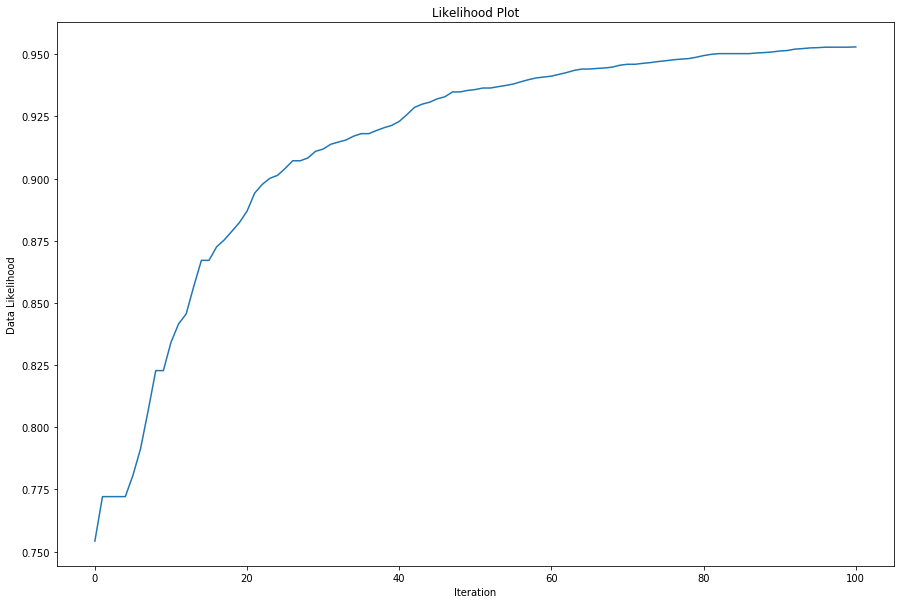

In [302]:
plt.figure(figsize=(15,10))
plt.plot(np.exp(-nn.getErrors()))
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood')
plt.title('Likelihood Plot')

#### 4.4.1.3. Predictions on Training and Testing Data

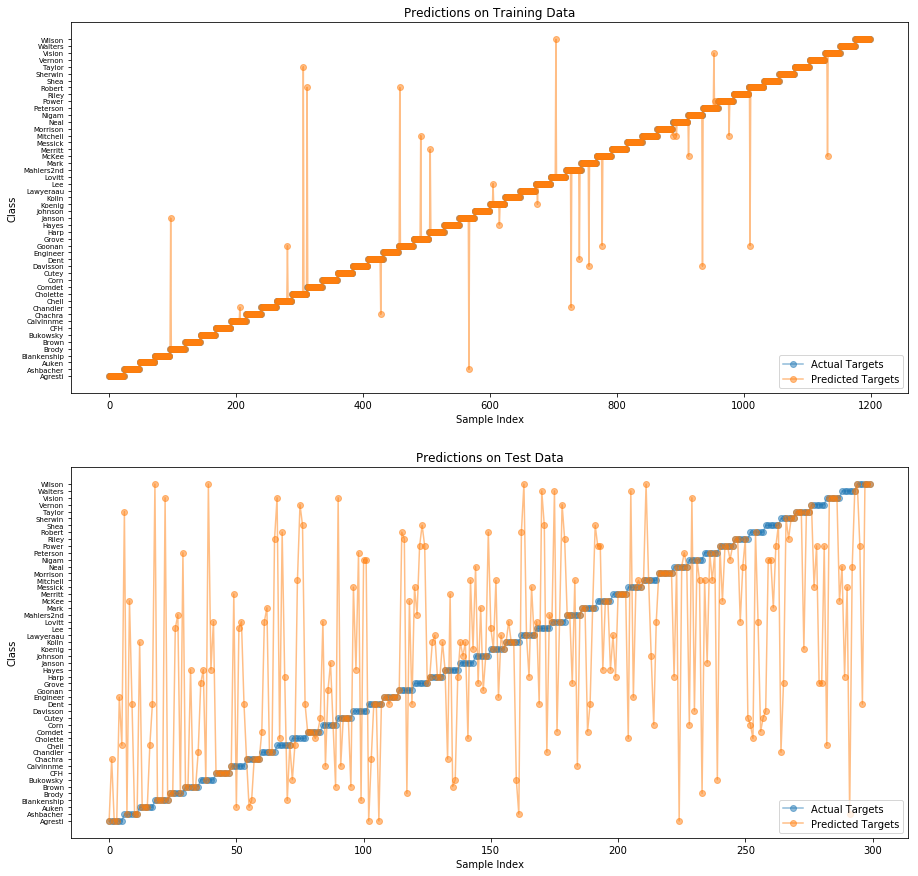

In [303]:
Ytrain_NL_10 = nn.predict(Xtrain) 
Ytest_NL_10 = nn.predict(Xtest)   

plt.figure(figsize=(15, 15))
plt.subplot(2,1,1)
plt.plot(np.hstack((Ttrain, Ytrain_NL_10)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.yticks(np.arange(1, 51, step=1), ['Agresti', 'Ashbacher', 'Auken', 'Blankenship', 'Brody', 'Brown', 'Bukowsky',
                                     'CFH', 'Calvinnme', 'Chachra', 'Chandler', 'Chell', 'Cholette', 'Comdet', 'Corn',
                                     'Cutey', 'Davisson', 'Dent', 'Engineer', 'Goonan', 'Grove', 'Harp', 'Hayes',
                                     'Janson', 'Johnson', 'Koenig', 'Kolln', 'Lawyeraau', 'Lee', 'Lovitt',
                                     'Mahlers2nd', 'Mark', 'McKee', 'Merritt', 'Messick', 'Mitchell', 'Morrison',
                                     'Neal', 'Nigam', 'Peterson', 'Power', 'Riley', 'Robert', 'Shea', 'Sherwin',
                                     'Taylor', 'Vernon', 'Vision', 'Walters', 'Wilson'])
plt.ylabel("Class")
plt.tick_params(axis='y', labelsize=7)
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

plt.subplot(2,1,2)
plt.plot(np.hstack((Ttest, Ytest_NL_10)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.yticks(np.arange(1, 51, step=1), ['Agresti', 'Ashbacher', 'Auken', 'Blankenship', 'Brody', 'Brown', 'Bukowsky',
                                     'CFH', 'Calvinnme', 'Chachra', 'Chandler', 'Chell', 'Cholette', 'Comdet', 'Corn',
                                     'Cutey', 'Davisson', 'Dent', 'Engineer', 'Goonan', 'Grove', 'Harp', 'Hayes',
                                     'Janson', 'Johnson', 'Koenig', 'Kolln', 'Lawyeraau', 'Lee', 'Lovitt',
                                     'Mahlers2nd', 'Mark', 'McKee', 'Merritt', 'Messick', 'Mitchell', 'Morrison',
                                     'Neal', 'Nigam', 'Peterson', 'Power', 'Riley', 'Robert', 'Shea', 'Sherwin',
                                     'Taylor', 'Vernon', 'Vision', 'Walters', 'Wilson'])
plt.ylabel("Class")
plt.tick_params(axis='y', labelsize=7)
plt.title('Predictions on Test Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

#### 4.4.1.4. Confusion Matrix

In [304]:
print ("Confusion Matrix for Training Samples")
cm = confusionMatrix(Ttrain, Ytrain_NL_10, np.unique(Ttrain).astype(int))

print ("\nConfusion Matrix for Testing Samples")
cm = confusionMatrix(Ttest, Ytest_NL_10, np.unique(Ttest).astype(int))

Confusion Matrix for Training Samples
       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50
    ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 |100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
 2 |  0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 

43 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    4.2  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   95.8  0    0    0    0    0    0    0  
44 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0    0    0    0  
45 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0    0    0  
46 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0 

31 |  0    0    0    0    0    0    0    0   16.7  0    0    0    0    0    0    0    0    0    0    0   16.7  0    0    0    0    0    0    0    0    0   50.0  0    0    0    0   16.7  0    0    0    0    0    0    0    0    0    0    0    0    0    0  
32 |  0    0    0    0    0    0    0    0    0    0    0    0    0   16.7  0    0    0   16.7  0    0    0    0    0    0    0    0    0    0    0    0    0   50.0  0    0    0    0    0    0    0    0    0    0    0   16.7  0    0    0    0    0    0  
33 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   33.3  0    0    0    0    0    0    0    0    0   33.3  0    0    0    0    0    0    0   33.3  0    0    0    0    0    0    0    0    0  
34 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   16.7  0    0    0    0    0   16.7  0    0    0    0    0   66.7  0    0    0    0    0    0    0    0    0    0    0    0   

#### 4.4.1.5. Overall Percentage Accuracy

In [305]:
print('{:s} {:}'.format('Accuracy of NLR NN-[10] on Training Data :',accuracy(Ytrain_NL_10, Ttrain)))
print('{:s} {:}'.format('Accuracy of NLR NN-[10] on Test Data     :',accuracy(Ytest_NL_10, Ttest)))

Accuracy of NLR NN-[10] on Training Data : 97.75
Accuracy of NLR NN-[10] on Test Data     : 40.666666666666664


### 4.4.2. NeuralNetwork - [10, 10]

#### 4.4.2.1. Train Neural Network

In [306]:
np.random.seed(28031994)
nn = NeuralNetworkClassifier(X.shape[1], [10, 10], len(np.unique(T)))
nn.fit(Xtrain, Ttrain, 100, verbose=True)
print(nn)

scg: Iteration 10 fValue Eval 0.0451584278424444 Scale 0.0053085718906315076
scg: Iteration 20 fValue Eval 0.037089155574490794 Scale 0.009202558536369417
scg: Iteration 30 fValue Eval 0.03292201925709758 Scale 0.04411734083628807
scg: Iteration 40 fValue Eval 0.03077556670141001 Scale 0.10786971455356842
scg: Iteration 50 fValue Eval 0.02904998813111044 Scale 0.13470505457832155
scg: Iteration 60 fValue Eval 0.027939227484063398 Scale 0.0002630958097232843
scg: Iteration 70 fValue Eval 0.025536395722589828 Scale 0.002104766477786274
scg: Iteration 80 fValue Eval 0.02476897042224836 Scale 0.012045198953087262
scg: Iteration 90 fValue Eval 0.02436609184795145 Scale 0.0898299729821771
scg: Iteration 100 fValue Eval 0.02381710524726609 Scale 0.03883449791850059
NeuralNetwork(2136, [10, 10], 50)
   Network was trained for 101 iterations that took 13.89092 seconds. Final error is 0.15432791467283583.


#### 4.4.2.2. Likelihood Plot

Text(0.5,1,'Lieklihood Plot')

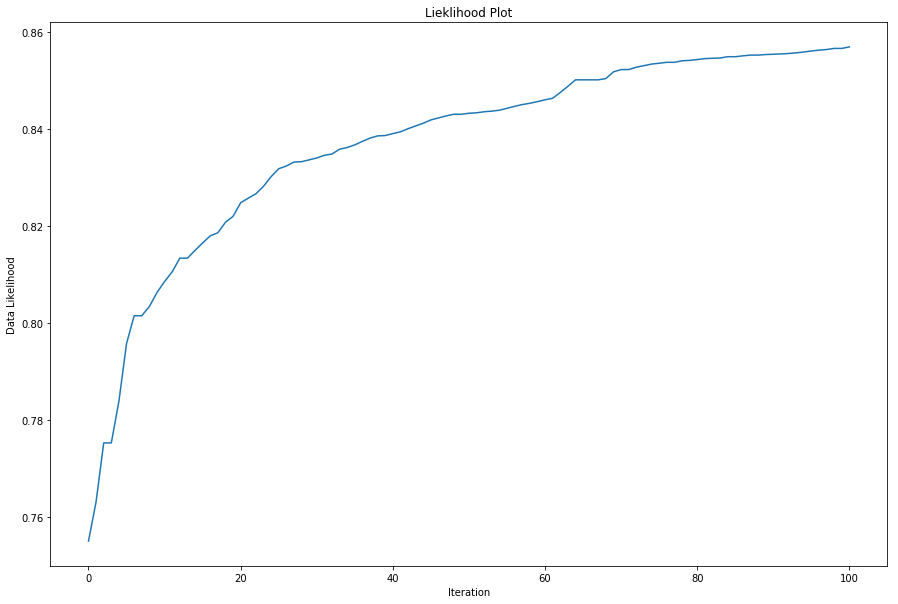

In [307]:
plt.figure(figsize=(15,10))
plt.plot(np.exp(-nn.getErrors()))
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood')
plt.title('Lieklihood Plot')

#### 4.4.2.3. Predictions on Training and Testing Sets

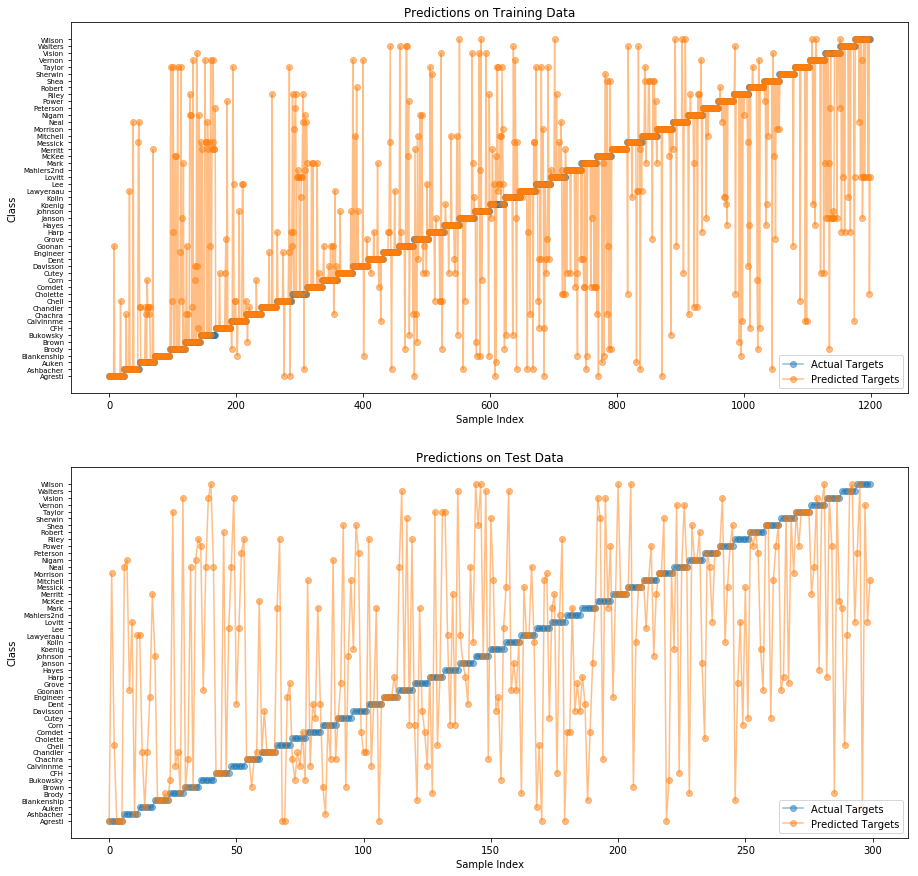

In [308]:
Ytrain_NL_10_10 = nn.predict(Xtrain)          
Ytest_NL_10_10 = nn.predict(Xtest)            

plt.figure(figsize=(15, 15))
plt.subplot(2,1,1)
plt.plot(np.hstack((Ttrain, Ytrain_NL_10_10)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.yticks(np.arange(1, 51, step=1), ['Agresti', 'Ashbacher', 'Auken', 'Blankenship', 'Brody', 'Brown', 'Bukowsky',
                                     'CFH', 'Calvinnme', 'Chachra', 'Chandler', 'Chell', 'Cholette', 'Comdet', 'Corn',
                                     'Cutey', 'Davisson', 'Dent', 'Engineer', 'Goonan', 'Grove', 'Harp', 'Hayes',
                                     'Janson', 'Johnson', 'Koenig', 'Kolln', 'Lawyeraau', 'Lee', 'Lovitt',
                                     'Mahlers2nd', 'Mark', 'McKee', 'Merritt', 'Messick', 'Mitchell', 'Morrison',
                                     'Neal', 'Nigam', 'Peterson', 'Power', 'Riley', 'Robert', 'Shea', 'Sherwin',
                                     'Taylor', 'Vernon', 'Vision', 'Walters', 'Wilson'])
plt.ylabel("Class")
plt.tick_params(axis='y', labelsize=7)
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

plt.subplot(2,1,2)
plt.plot(np.hstack((Ttest, Ytest_NL_10_10)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.yticks(np.arange(1, 51, step=1), ['Agresti', 'Ashbacher', 'Auken', 'Blankenship', 'Brody', 'Brown', 'Bukowsky',
                                     'CFH', 'Calvinnme', 'Chachra', 'Chandler', 'Chell', 'Cholette', 'Comdet', 'Corn',
                                     'Cutey', 'Davisson', 'Dent', 'Engineer', 'Goonan', 'Grove', 'Harp', 'Hayes',
                                     'Janson', 'Johnson', 'Koenig', 'Kolln', 'Lawyeraau', 'Lee', 'Lovitt',
                                     'Mahlers2nd', 'Mark', 'McKee', 'Merritt', 'Messick', 'Mitchell', 'Morrison',
                                     'Neal', 'Nigam', 'Peterson', 'Power', 'Riley', 'Robert', 'Shea', 'Sherwin',
                                     'Taylor', 'Vernon', 'Vision', 'Walters', 'Wilson'])
plt.ylabel("Class")
plt.tick_params(axis='y', labelsize=7)
plt.title('Predictions on Test Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

#### 4.4.2.4. Confusion Matrix

In [309]:
print ("Confusion Matrix for Training Samples")
cm = confusionMatrix(Ttrain, Ytrain_NL_10_10, np.unique(Ttrain).astype(int))

print ("\nConfusion Matrix for Testing Samples")
cm = confusionMatrix(Ttest, Ytest_NL_10_10, np.unique(Ttest).astype(int))

Confusion Matrix for Training Samples
       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50
    ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 | 91.7  0    0    0    0    0    0    0    0    0    0    4.2  0    0    0    0    0    0    0    4.2  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
 2 |  0   79.2  0    0    0    0    0    0    0    4.2  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    4.2  0 

46 |  0    0    0    0    0    0    0    0    8.3  0    0    4.2  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   87.5  0    0    0    0  
47 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    8.3  0    0    0    0    0    0    4.2  0    0    4.2  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   75.0  0    0    8.3
48 |  0    0    0    0    4.2  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   29.2  4.2  0    0    0    0    0    0    8.3  0    0    0    0    0    0    0    8.3  0    0    0    0    0    0    0   45.8  0    0  
49 |  0    0    0    0    0    0    0    0    4.2  0    0    0    0    0    0    0    0    0    0    0    0   12.5  0    0    0    0    4.2  0    0    8.3  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

34 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   16.7  0    0    0    0    0    0    0    0    0    0    0    0    0    0   66.7  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   16.7
35 |  0    0    0    0    0   16.7  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   16.7  0    0    0    0    0    0    0   50.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   16.7
36 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   16.7  0    0    0   16.7  0    0    0    0   16.7  0   33.3  0    0    0    0   16.7  0    0    0    0    0    0    0    0    0  
37 | 16.7  0    0    0    0    0   16.7  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   50.0  0    0    0    0    0    0    0   16.7  0   

#### 4.4.2.5. Overall Percentage Accuracy

In [310]:
print('{:s} {:}'.format('Accuracy of NLR NN-[10, 10] on Training Data :',accuracy(Ytrain_NL_10_10, Ttrain)))
print('{:s} {:}'.format('Accuracy of NLR NN-[10, 10] on Test Data     :',accuracy(Ytest_NL_10_10, Ttest)))

Accuracy of NLR NN-[10, 10] on Training Data : 67.75
Accuracy of NLR NN-[10, 10] on Test Data     : 27.0


### 4.4.3. Multiple Network Structure

#### 4.4.3.1. Train & Evaluate Multiple Neural Network Structures

                   0           1          2
0                [2]   13.083333   5.666667
1                [5]   51.833333  22.666667
2               [10]   88.250000  39.666667
3               [20]  100.000000  52.333333
4               [25]  100.000000  53.666667
5               [50]  100.000000  69.000000
6             [2, 2]    8.250000   5.000000
7             [5, 5]   26.000000  12.666667
8           [10, 10]   87.083333  30.000000
9           [20, 20]   77.666667  27.666667
10          [25, 25]   96.500000  42.666667
11          [50, 50]  100.000000  58.333333
12         [2, 2, 2]    7.416667   3.666667
13         [5, 5, 5]   15.833333   9.666667
14      [10, 10, 10]   70.250000  26.333333
15      [20, 20, 20]   96.250000  34.333333
16      [25, 25, 25]   89.083333  29.666667
17      [50, 50, 50]  100.000000  49.000000
18      [2, 2, 2, 2]    6.833333   4.333333
19      [5, 5, 5, 5]   17.583333  11.666667
20  [10, 10, 10, 10]   78.416667  21.333333
21  [20, 20, 20, 20]   93.833333

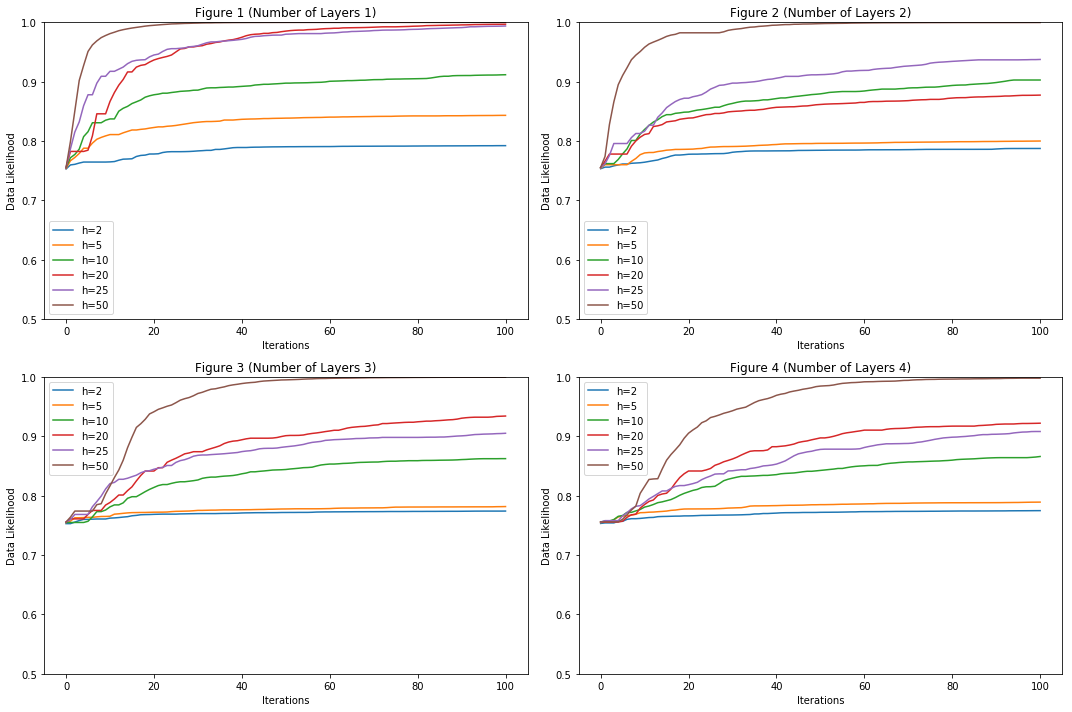

In [311]:
likelihoodList = []
accuracyList = []
dataF = []
np.random.seed(28031994)
plt.figure(figsize=(15,10))
for nHiddenLayers in [1,2,3,4]:
    plt.subplot(2,2,nHiddenLayers)
    for nHiddenUnits in [2, 5, 10, 20, 25, 50]:
        hiddenLayerStructure = [nHiddenUnits]*nHiddenLayers
        nn = NeuralNetworkClassifier(X.shape[1], hiddenLayerStructure, len(np.unique(T)))
        nn.fit(Xtrain, Ttrain, Iterations=100, verbose=False)
        Ytrain = nn.predict(Xtrain)
        Ytest = nn.predict(Xtest)
        plt.plot(np.exp(-nn.getErrors()), label='h='+str(nHiddenUnits))
        plt.ylim(0.5, 1.0)
        plt.ylabel('Data Likelihood')
        plt.xlabel('Iterations')
        plt.legend(loc='best')
        
        accuracyTrain= np.sum(Ytrain == Ttrain)/ len(Ttrain) * 100
        accuracyTest= np.sum(Ytest == Ttest)/ len(Ttest) * 100
        accuracyList.append([hiddenLayerStructure,accuracyTrain,accuracyTest])
        
        likelihoodList.append(np.exp(-nn.getErrors()))
        
    plt.title('Figure {} (Number of Layers {})'.format(nHiddenLayers, nHiddenLayers))
    
plt.tight_layout()
dataF = pd.DataFrame(accuracyList)
print(dataF)

#### 4.4.3.2. Extracting Best Hidden Layer Structure for Train & Test Sets

In [312]:
bestStructureTrain = []
bestStructureTest = []

npArr = dataF.values                                               
maxIndicesTrain = np.where(npArr[:,1] == max(dataF[1]))[0].tolist()
bestStructureTrain = dataF[0][maxIndicesTrain[:]].values.tolist()  

maxIndicesTest = np.where(npArr[:,2] == max(dataF[2]))[0].tolist() 
bestStructureTest = dataF[0][maxIndicesTest[:]].values.tolist()    

likelihoodArray = np.asarray(likelihoodList)       
maxLikelihood = (max(np.ravel(likelihoodArray)))   
print('Best Hidden Layer Structure for Training Data: {}'.format(bestStructureTrain))
print('Best Percentage Accuracy for Training Data   : {}'.format(max(dataF[1])))
print(" ")
print('Best Hidden Layer Structure for Testing Data : {}'.format(bestStructureTest))
print('Best Percentage Accuracy for Testing Data    : {}'.format(max(dataF[2])))
print(" ")
print('Maximum Likelihood: {:f}'.format(maxLikelihood))


Best Hidden Layer Structure for Training Data: [[20], [25], [50], [50, 50], [50, 50, 50], [50, 50, 50, 50]]
Best Percentage Accuracy for Training Data   : 100.0
 
Best Hidden Layer Structure for Testing Data : [[50]]
Best Percentage Accuracy for Testing Data    : 69.0
 
Maximum Likelihood: 1.000000


#### 4.4.3.3. Confusion Matrix for Best Hidden Layer Structture Identified on Training Samples

In [313]:
np.random.seed(28031994)
for hidden in bestStructureTrain:
    nn = NeuralNetworkClassifier(X.shape[1], hidden, len(np.unique(T)))
    nn.fit(Xtrain, Ttrain, 100)
    print(nn)
    Ytrain = nn.predict(Xtrain)                        # Use the above trainied model on Testing Data
    print ("\nConfusion Matrix with Best NN Structure identified on training samples")
    cm = confusionMatrix(Ttrain, Ytrain, np.unique(Ttrain).astype(int))
    print(" ")

NeuralNetwork(2136, [20], 50)
   Network was trained for 101 iterations that took 13.60486 seconds. Final error is 0.01615386771950857.

Confusion Matrix with Best NN Structure identified on training samples
       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50
    ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 |100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 

18 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
19 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
20 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
21 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

NeuralNetwork(2136, [50], 50)
   Network was trained for 101 iterations that took 18.97744 seconds. Final error is 8.309319370754197e-08.

Confusion Matrix with Best NN Structure identified on training samples
       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50
    ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 |100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    

34 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
35 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
36 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0  
37 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0    0    0    0    0    0    0   

NeuralNetwork(2136, [50, 50, 50], 50)
   Network was trained for 101 iterations that took 15.71476 seconds. Final error is 0.001634622644243185.

Confusion Matrix with Best NN Structure identified on training samples
       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50
    ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 |100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  

11 |  0    0    0    0    0    0    0    0    0    0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
12 |  0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
13 |  0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
14 |  0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

47 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0  
48 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0  
49 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0  
50 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

#### 4.4.3.4. Confusion Matrix for Best Hidden Layer Structure Identified on Test Set

In [314]:
np.random.seed(28031994)
for hidden in bestStructureTest:
    nn = NeuralNetworkClassifier(X.shape[1], hidden, len(np.unique(T)))
    nn.fit(Xtrain, Ttrain, 100)
    print(nn)
    Ytest = nn.predict(Xtest)   
    print ("\nConfusion Matrix with Best NN Structure identified on test samples")
    cm = confusionMatrix(Ttest, Ytest, np.unique(Ttest).astype(int))
    print(" ")

NeuralNetwork(2136, [50], 50)
   Network was trained for 101 iterations that took 18.40448 seconds. Final error is 8.885425726990125e-08.

Confusion Matrix with Best NN Structure identified on test samples
       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50
    ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 |100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

40 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0    0    0    0    0    0    0    0  
41 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   16.7  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   83.3  0    0    0    0    0    0    0    0    0  
42 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   83.3  0    0    0    0    0    0    0   16.7
43 |  0    0    0    0    0    0    0    0    0    0    0    0    0   16.7  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   16.7  0    0    0    0    0    0    0    0   16.7  0   16.7  0    0   16.7 

<a id='Section45'> </a>
### 4.5. Linear Logistic Regression

#### 4.5.1 Train Neural Network (NN-[0])

In [315]:
np.random.seed(28031994)
nn = NeuralNetworkClassifier(X.shape[1], 0, len(np.unique(T)))

#### 4.5.2. Likelihood Plot

scg: Iteration 10 fValue Eval 0.0035973859751084834 Scale 0.001024
scg: Iteration 20 fValue Eval 5.032342261820405e-05 Scale 1e-06
scg: Iteration 30 fValue Eval 1.7661499615023693e-06 Scale 9.765625e-10
scg: Iteration 40 fValue Eval 9.707616675111976e-08 Scale 7.62939453125e-12
scg: Iteration 50 fValue Eval 4.951039358340019e-09 Scale 5.960464477539062e-14
scg: Iteration 60 fValue Eval 2.813171176544865e-09 Scale 4.8828125e-10
scg: Iteration 70 fValue Eval 1.9083215594841948e-09 Scale 0.000128
scg: Iteration 80 fValue Eval 1.908321013772465e-09 Scale 134.217728
scg: Iteration 90 fValue Eval 1.908321013772465e-09 Scale 140737488.355328
scg: Iteration 100 fValue Eval 1.908321013772465e-09 Scale 147573952589676.4


Text(0.5,1,'Likelihood Plot for 100 Iterations')

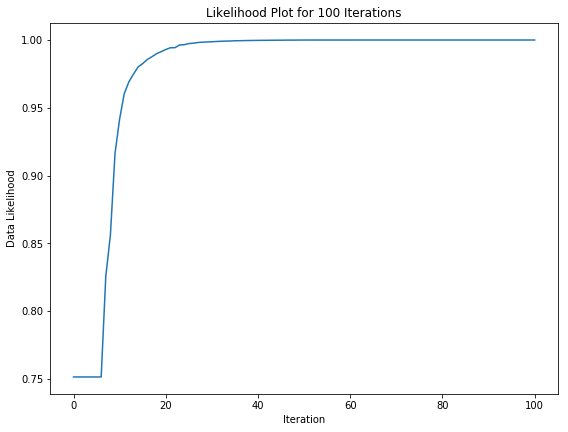

In [316]:
plt.figure(figsize=(20,15))

nn.fit(Xtrain, Ttrain, 100, verbose=True)
plt.subplot(2, 2, 1)
plt.plot(np.exp(-nn.getErrors())) 
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood')
plt.title('Likelihood Plot for 100 Iterations')

#### 4.5.3 Predictions on Train & Test Samples:

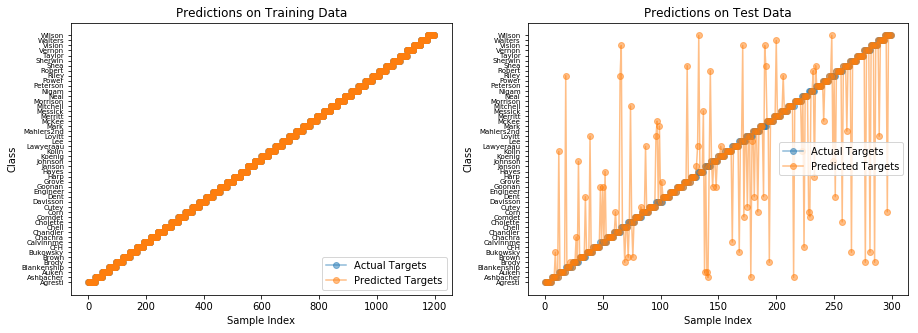

In [317]:
Ytrain_LR = nn.predict(Xtrain)       
Ytest_LR = nn.predict(Xtest)         

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(np.hstack((Ttrain, Ytrain_LR)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.yticks(np.arange(1, 51, step=1), ['Agresti', 'Ashbacher', 'Auken', 'Blankenship', 'Brody', 'Brown', 'Bukowsky',
                                     'CFH', 'Calvinnme', 'Chachra', 'Chandler', 'Chell', 'Cholette', 'Comdet', 'Corn',
                                     'Cutey', 'Davisson', 'Dent', 'Engineer', 'Goonan', 'Grove', 'Harp', 'Hayes',
                                     'Janson', 'Johnson', 'Koenig', 'Kolln', 'Lawyeraau', 'Lee', 'Lovitt',
                                     'Mahlers2nd', 'Mark', 'McKee', 'Merritt', 'Messick', 'Mitchell', 'Morrison',
                                     'Neal', 'Nigam', 'Peterson', 'Power', 'Riley', 'Robert', 'Shea', 'Sherwin',
                                     'Taylor', 'Vernon', 'Vision', 'Walters', 'Wilson'])
plt.ylabel("Class")
plt.tick_params(axis='y', labelsize=7)
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

plt.subplot(1, 2 ,2)
plt.plot(np.hstack((Ttest, Ytest_LR)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.yticks(np.arange(1, 51, step=1), ['Agresti', 'Ashbacher', 'Auken', 'Blankenship', 'Brody', 'Brown', 'Bukowsky',
                                     'CFH', 'Calvinnme', 'Chachra', 'Chandler', 'Chell', 'Cholette', 'Comdet', 'Corn',
                                     'Cutey', 'Davisson', 'Dent', 'Engineer', 'Goonan', 'Grove', 'Harp', 'Hayes',
                                     'Janson', 'Johnson', 'Koenig', 'Kolln', 'Lawyeraau', 'Lee', 'Lovitt',
                                     'Mahlers2nd', 'Mark', 'McKee', 'Merritt', 'Messick', 'Mitchell', 'Morrison',
                                     'Neal', 'Nigam', 'Peterson', 'Power', 'Riley', 'Robert', 'Shea', 'Sherwin',
                                     'Taylor', 'Vernon', 'Vision', 'Walters', 'Wilson'])
plt.ylabel("Class")
plt.tick_params(axis='y', labelsize=7)
plt.title('Predictions on Test Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='right')

#### 4.5.4. Confusion Matrix for Linear Logistic Regression Models

In [318]:
print ("Confusion Matrix for Training Samples")
cm = confusionMatrix(Ttrain, Ytrain_LR, np.unique(Ttrain).astype(int))

print ("\nConfusion Matrix for Testing Samples")
cm = confusionMatrix(Ttest, Ytest_LR, np.unique(Ttest).astype(int))

Confusion Matrix for Training Samples
       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50
    ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 |100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
 2 |  0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 

40 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0    0    0    0    0    0    0    0  
41 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0    0    0    0    0    0    0  
42 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0    0    0    0    0    0  
43 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0   

27 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
28 |  0    0    0    0    0    0    0    0   16.7  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   83.3  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
29 |  0    0    0    0    0    0   16.7  0    0    0    0    0    0   16.7  0    0    0    0    0    0    0    0    0    0    0    0    0    0   50.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   16.7  0    0  
30 |  0   16.7  0    0    0    0    0    0    0    0    0    0    0    0    0   16.7  0    0    0    0    0    0    0    0    0    0    0    0   16.7 50.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

#### 4.5.5 Overall Percentage Accuracy:

In [319]:
print('{:s} {:}'.format('Accuracy of Linear LR on Training Data :',accuracy(Ytrain_LR, Ttrain)))
print('{:s} {:}'.format('Accuracy of Linear LR on Test Data     :',accuracy(Ytest_LR, Ttest)))

Accuracy of Linear LR on Training Data : 100.0
Accuracy of Linear LR on Test Data     : 76.33333333333333


<a id='Section46'> </a>
### 4.6. K-Nearest Neighbors Classification

### 4.6.1 K = 1

#### 4.6.1.1. Instantiate and Train KNN Model with K = 1

In [320]:
np.random.seed(28031994)
knn = KNeighborsClassifier(n_neighbors=1)
print (knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [321]:
#standardizing
Xtrain_mean = Xtrain.mean(axis=0)
Xtrain_std = Xtrain.std(axis=0)
Xtrain_standardized = (Xtrain - Xtrain_mean)/Xtrain_std
a = isnan(Xtrain_standardized)
Xtrain_standardized[a] = 0.000000001

Xtest_standardized = (Xtest - Xtrain_mean)/Xtrain_std
a = isnan(Xtest_standardized)
Xtest_standardized[a] = 0.000000001

knn.fit(Xtrain_standardized, Ttrain.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### 4.6.1.2. Use KNN-1 Model

In [322]:
Ytrain_KNN = knn.predict(Xtrain_standardized)
Ytest_KNN = knn.predict(Xtest_standardized)

#### 4.6.1.3 Plot Predictions on Training and Testing Samples

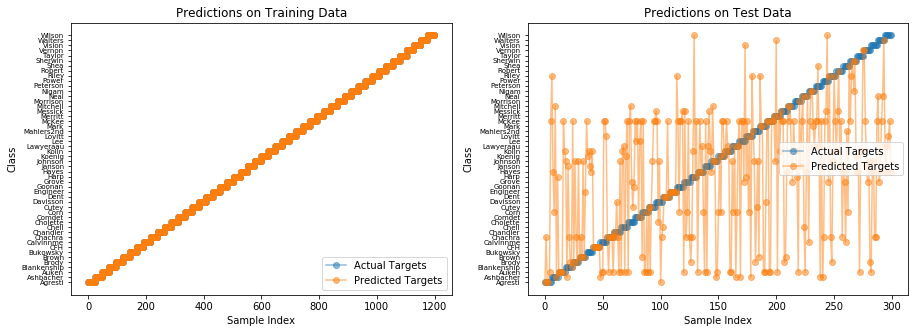

In [323]:
Ytrain_KNN = Ytrain_KNN.reshape(-1,1)
Ytest_KNN = Ytest_KNN.reshape(-1,1)

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(np.hstack((Ttrain, Ytrain_KNN)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.yticks(np.arange(1, 51, step=1), ['Agresti', 'Ashbacher', 'Auken', 'Blankenship', 'Brody', 'Brown', 'Bukowsky',
                                     'CFH', 'Calvinnme', 'Chachra', 'Chandler', 'Chell', 'Cholette', 'Comdet', 'Corn',
                                     'Cutey', 'Davisson', 'Dent', 'Engineer', 'Goonan', 'Grove', 'Harp', 'Hayes',
                                     'Janson', 'Johnson', 'Koenig', 'Kolln', 'Lawyeraau', 'Lee', 'Lovitt',
                                     'Mahlers2nd', 'Mark', 'McKee', 'Merritt', 'Messick', 'Mitchell', 'Morrison',
                                     'Neal', 'Nigam', 'Peterson', 'Power', 'Riley', 'Robert', 'Shea', 'Sherwin',
                                     'Taylor', 'Vernon', 'Vision', 'Walters', 'Wilson'])
plt.ylabel("Class")
plt.tick_params(axis='y', labelsize=7)
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

plt.subplot(1, 2 ,2)
plt.plot(np.hstack((Ttest, Ytest_KNN)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.yticks(np.arange(1, 51, step=1), ['Agresti', 'Ashbacher', 'Auken', 'Blankenship', 'Brody', 'Brown', 'Bukowsky',
                                     'CFH', 'Calvinnme', 'Chachra', 'Chandler', 'Chell', 'Cholette', 'Comdet', 'Corn',
                                     'Cutey', 'Davisson', 'Dent', 'Engineer', 'Goonan', 'Grove', 'Harp', 'Hayes',
                                     'Janson', 'Johnson', 'Koenig', 'Kolln', 'Lawyeraau', 'Lee', 'Lovitt',
                                     'Mahlers2nd', 'Mark', 'McKee', 'Merritt', 'Messick', 'Mitchell', 'Morrison',
                                     'Neal', 'Nigam', 'Peterson', 'Power', 'Riley', 'Robert', 'Shea', 'Sherwin',
                                     'Taylor', 'Vernon', 'Vision', 'Walters', 'Wilson'])
plt.ylabel("Class")
plt.tick_params(axis='y', labelsize=7)
plt.title('Predictions on Test Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='right')

#### 4.6.1.4. Confusion Matrix

In [324]:
print ("Confusion Matrix for Training Samples")
cm = confusionMatrix(Ttrain, Ytrain_KNN, np.unique(Ttrain).astype(int))

print ("\nConfusion Matrix for Testing Samples")
cm = confusionMatrix(Ttest, Ytest_KNN, np.unique(Ttest).astype(int))

Confusion Matrix for Training Samples
       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50
    ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 |100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
 2 |  0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 

45 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0    0    0  
46 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0    0  
47 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  100.0  0    0    0  
48 |  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

41 |  0   16.7  0    0    0    0    0    0    0   16.7  0    0    0    0    0    0    0    0    0    0   16.7  0    0    0    0    0    0    0    0    0    0    0   16.7  0   16.7  0    0    0    0    0    0    0    0    0    0    0    0    0    0   16.7
42 |  0    0    0    0   16.7  0    0    0    0   16.7  0    0    0    0    0    0    0    0    0    0    0    0    0    0   16.7  0    0    0    0    0    0    0   16.7  0    0    0    0    0    0    0    0   33.3  0    0    0    0    0    0    0    0  
43 |  0    0    0    0    0    0    0    0    0   16.7  0    0    0    0    0    0    0    0    0    0    0    0    0   16.7  0    0   16.7  0    0    0    0    0   16.7  0   16.7  0    0    0    0    0    0    0   16.7  0    0    0    0    0    0    0  
44 |  0    0    0    0    0    0    0    0   16.7  0    0    0    0    0   16.7  0    0    0    0    0   16.7  0   16.7  0    0    0    0    0    0    0   16.7  0    0    0    0    0    0    0    0    0    0    0    0   16.7  0    0   

#### 4.6.1.5. Percentage Accuracy for KNN (K = 1)

In [325]:
print('{:s} {:}'.format('Accuracy of KNN-1 on Training Data :',accuracy(Ytrain_KNN, Ttrain)))
print('{:s} {:}'.format('Accuracy of KNN-1 on Test Data     :',accuracy(Ytest_KNN, Ttest)))

Accuracy of KNN-1 on Training Data : 100.0
Accuracy of KNN-1 on Test Data     : 25.333333333333336


### 4.6.2. KNN = 5

#### 4.6.2.1. Instantiate & Train KNN model with K = 5

In [326]:
np.random.seed(28031994)
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(Xtrain_standardized,Ttrain.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### 4.6.2.2. Use KNN-5 Model

In [327]:
Ytrain_KNN5 = knn.predict(Xtrain_standardized)
Ytest_KNN5 = knn.predict(Xtest_standardized)

#### 4.6.2.3. Plot Predictions on Training and Test Data

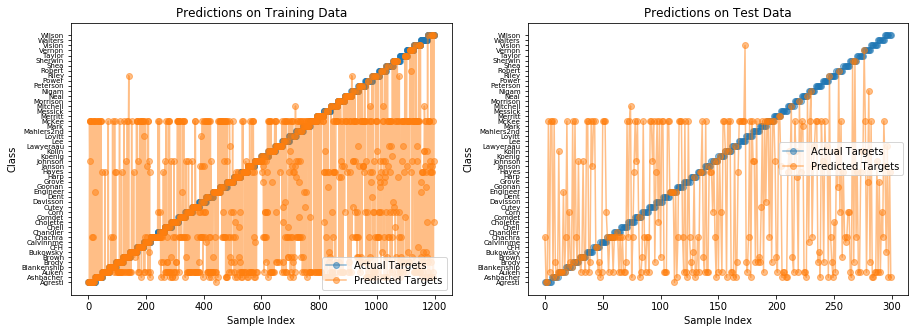

In [328]:
Ytrain_KNN5 = Ytrain_KNN5.reshape(-1,1)
Ytest_KNN5 = Ytest_KNN5.reshape(-1,1)

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(np.hstack((Ttrain, Ytrain_KNN5)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.yticks(np.arange(1, 51, step=1), ['Agresti', 'Ashbacher', 'Auken', 'Blankenship', 'Brody', 'Brown', 'Bukowsky',
                                     'CFH', 'Calvinnme', 'Chachra', 'Chandler', 'Chell', 'Cholette', 'Comdet', 'Corn',
                                     'Cutey', 'Davisson', 'Dent', 'Engineer', 'Goonan', 'Grove', 'Harp', 'Hayes',
                                     'Janson', 'Johnson', 'Koenig', 'Kolln', 'Lawyeraau', 'Lee', 'Lovitt',
                                     'Mahlers2nd', 'Mark', 'McKee', 'Merritt', 'Messick', 'Mitchell', 'Morrison',
                                     'Neal', 'Nigam', 'Peterson', 'Power', 'Riley', 'Robert', 'Shea', 'Sherwin',
                                     'Taylor', 'Vernon', 'Vision', 'Walters', 'Wilson'])
plt.ylabel("Class")
plt.tick_params(axis='y', labelsize=7)
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

plt.subplot(1, 2 ,2)
plt.plot(np.hstack((Ttest, Ytest_KNN5)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.yticks(np.arange(1, 51, step=1), ['Agresti', 'Ashbacher', 'Auken', 'Blankenship', 'Brody', 'Brown', 'Bukowsky',
                                     'CFH', 'Calvinnme', 'Chachra', 'Chandler', 'Chell', 'Cholette', 'Comdet', 'Corn',
                                     'Cutey', 'Davisson', 'Dent', 'Engineer', 'Goonan', 'Grove', 'Harp', 'Hayes',
                                     'Janson', 'Johnson', 'Koenig', 'Kolln', 'Lawyeraau', 'Lee', 'Lovitt',
                                     'Mahlers2nd', 'Mark', 'McKee', 'Merritt', 'Messick', 'Mitchell', 'Morrison',
                                     'Neal', 'Nigam', 'Peterson', 'Power', 'Riley', 'Robert', 'Shea', 'Sherwin',
                                     'Taylor', 'Vernon', 'Vision', 'Walters', 'Wilson'])
plt.ylabel("Class")
plt.tick_params(axis='y', labelsize=7)
plt.title('Predictions on Test Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='right')

#### 4.6.2.4. Overall Percentage Accuracy

In [329]:
print('{:s} {:}'.format('Accuracy of KNN-5 on Training Data :',accuracy(Ytrain_KNN5, Ttrain)))
print('{:s} {:}'.format('Accuracy of KNN-5 on Test Data     :',accuracy(Ytest_KNN5, Ttest)))

Accuracy of KNN-5 on Training Data : 39.25
Accuracy of KNN-5 on Test Data     : 17.666666666666668


### 4.6.3. Multiple Values of K

#### 4.6.3.1. Train & Evalue KNN with Multiple values of K

In [330]:
testAccuracy = []
trainAccuracy = []
np.random.seed(28031994)
for k in range (1,21):
    print('{:s} {:d}'.format("KNN with K = ", k))
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(Xtrain_standardized,Ttrain.ravel())
    
    Ytrain_KNNK = knn.predict(Xtrain_standardized)
    Ytest_KNNK = knn.predict(Xtest_standardized)
    print('{:s} {:}'.format('Accuracy of Training Data :',accuracy(Ytrain_KNNK, Ttrain)))
    print('{:s} {:}'.format('Accuracy of Test Data     :',accuracy(Ytest_KNNK, Ttest)))
    print(" ")
    testAccuracy.append(accuracy(Ytest_KNNK, Ttest))
    trainAccuracy.append(accuracy(Ytrain_KNNK, Ttrain))

KNN with K =  1
Accuracy of Training Data : 100.0
Accuracy of Test Data     : 25.333333333333336
 
KNN with K =  2
Accuracy of Training Data : 53.5
Accuracy of Test Data     : 20.0
 
KNN with K =  3
Accuracy of Training Data : 45.08333333333333
Accuracy of Test Data     : 18.333333333333332
 
KNN with K =  4
Accuracy of Training Data : 41.833333333333336
Accuracy of Test Data     : 18.333333333333332
 
KNN with K =  5
Accuracy of Training Data : 39.25
Accuracy of Test Data     : 17.666666666666668
 
KNN with K =  6
Accuracy of Training Data : 37.916666666666664
Accuracy of Test Data     : 17.0
 
KNN with K =  7
Accuracy of Training Data : 36.333333333333336
Accuracy of Test Data     : 18.0
 
KNN with K =  8
Accuracy of Training Data : 34.5
Accuracy of Test Data     : 17.0
 
KNN with K =  9
Accuracy of Training Data : 32.83333333333333
Accuracy of Test Data     : 17.0
 
KNN with K =  10
Accuracy of Training Data : 30.833333333333336
Accuracy of Test Data     : 17.0
 
KNN with K =  11
Ac

#### 4.6.3.2. Plot Prediction accuracy on training and testing data

Text(0.5,1,'Train Accuracy Vs K values')

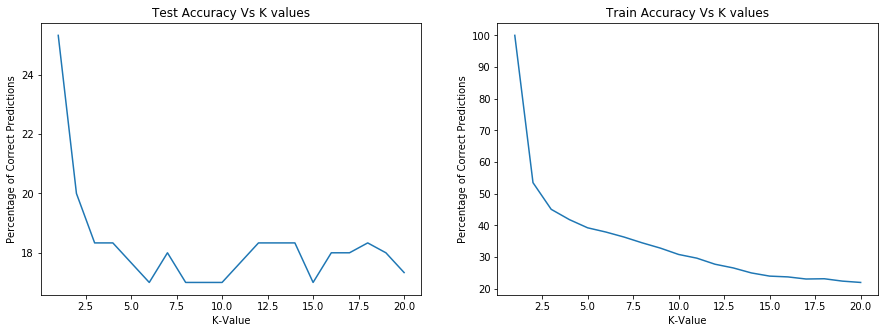

In [331]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(range(1,21), testAccuracy)
plt.xlabel('K-Value')
plt.ylabel('Percentage of Correct Predictions')
plt.title('Test Accuracy Vs K values')

plt.subplot(1,2,2)
plt.plot(range(1,21), trainAccuracy)
plt.xlabel('K-Value')
plt.ylabel('Percentage of Correct Predictions')
plt.title('Train Accuracy Vs K values')

<a id='Section47'></a>
### 4.7. Results Summary

|Algorithms|% Accuracy on Training Data|% Accuracy on Test Data|
|---------|-----|-----|
|QDA|0.00|1.00|
|LDA|99.50|11.67|
|NLLR - [10]|97.75|40.67|
|NLLR - [10, 10]|67.75|27.00|
|NLLR - [20]|100.00|52.33|
|NLLR - [25]|100.00|53.67|
|NLLR - [50]|100.00|69.00|
|NLLR - [50, 50]|100.00|58.33|
|NLLR - [50, 50, 50]|100.00|49.00|
|NLLR - [50, 50, 50, 50]|100.00|44.67|
|LLR|100.00|76.33|
|KNN (K=1)|100.00|25.33|
|KNN (K=5)|39.25|17.67|
|KNN (K=10)|30.83|17.00|
|KNN (K=15)|24.00|17.00|
|KNN (K = 20)|22.00|17.33|